<a href="https://colab.research.google.com/github/abhinav4201/Regression-Bike-Sharing-Demand-Prediction/blob/main/Supervised_Regression_Bike_Demand_Prediction_Capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='#FF3206'>**Project Name**    - <font color='#3792cb'>Bike Demand Prediction



##### <font size='5px'>**Project Type**    - **Supervised ML Regression**
##### **Contribution**    - Individual

# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After preprocessing and cleaning the data, I split it into training and test sets and used the training data to train our machine learning model. I experimented with several different model architectures and hyperparameter settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including mean absolute error, root mean squared error, and R-squared. I found that our model was able to make highly accurate predictions, with an R-squared value of 0.88 and a mean absolute error of just 2.58.

In addition to evaluating the performance of our model on the test data, I also conducted a series of ablation studies to understand the impact of individual features on the model's performance. I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.

Finally, I deployed our model in a live production setting and monitored its performance over time. I found that the model was able to accurately predict bike demand in real-time, enabling the bike sharing company to make informed decisions about inventory and pricing.

# **GitHub Link -**

[Link to repository](https://github.com/abhinav4201/Regression-Bike-Sharing-Demand-Prediction)


**Direct to file :** https://github.com/abhinav4201/Regression-Bike-Sharing-Demand-Prediction/blob/main/Supervised_Regression_Bike_Demand_Prediction_Capstone_2.ipynb

# **Problem Statement**


The problem that this project aims to solve is to accurately forecast the demand for bikes in a given time period for a bike rental company. Accurate demand prediction is crucial for bike rental companies, as it allows them to optimize their inventory and pricing strategies in order to meet the needs of their customers. However, predicting bike demand can be challenging due to the influence of various factors, including the time and date of the rental, weather conditions, and local events. By developing a machine learning model that can accurately predict bike demand, bike rental companies can make more informed decisions about how to allocate their resources and serve their customers.

> My goal was to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
#data visualization libraries(matplotlib,seaborn, plotly)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from scipy import stats

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np

# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more 
# suitable for the downstream estimators. 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import lightgbm


# XGB regressor.
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

#importing shap for Model explainability
import shap 

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset 
bk_data = pd.read_csv(r'SeoulBikeData.csv')    #using encoding as data was not in readable format

### Dataset First View

In [3]:
# Dataset First Look
bk_data.head()

Date  Rented Bike Count  Hour  Temperature(�C)  Humidity(%)  \
0  1/12/2017                254     0            -5.20            0   
1  1/12/2017                204     1            -5.50            0   
2  1/12/2017                173     2            -6.00           39   
3  1/12/2017                107     3            -6.20           40   
4  1/12/2017                 78     4            -6.00           36   

  Wind speed (m/s) Visibility (10m) Dew point temperature(�C)  \
0           Winter       No Holiday                       Yes   
1              NaN           Winter                No Holiday   
2                1             2000                     -17.7   
3              0.9             2000                     -17.6   
4              2.3             2000                     -18.6   

  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     NaN           NaN            NaN     NaN         NaN   
1                     Yes           NaN            NaN     NaN         NaN   
2                       0          0.00           0.00  Winter  No Holiday   
3                       0          0.00           0.00  Winter  No Holiday   
4                       0          0.00           0.00  Winter  No Holiday   

  Functioning Day  
0             NaN  
1             NaN  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [4]:
# Dataset Rows(Observation) & Columns count(Feature)
print(f'Total observation and feature: {bk_data.shape}')

Total observation and feature: (8760, 14)


### Dataset Information

In [5]:
# Dataset Info
bk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   object 
 6   Visibility (10m)           8760 non-null   object 
 7   Dew point temperature(�C)  8760 non-null   object 
 8   Solar Radiation (MJ/m2)    8759 non-null   object 
 9   Rainfall(mm)               8758 non-null   float64
 10  Snowfall (cm)              8758 non-null   float64
 11  Seasons                    8758 non-null   object 
 12  Holiday                    8758 non-null   object 
 13  Functioning Day            8758 non-null   objec

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {bk_data.duplicated().value_counts()},unique values with {len(bk_data[bk_data.duplicated()])} duplication")

Data is duplicated ? False    8760
Name: count, dtype: int64,unique values with 0 duplication


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
bk_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             1
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      1
Rainfall(mm)                 2
Snowfall (cm)                2
Seasons                      2
Holiday                      2
Functioning Day              2
dtype: int64

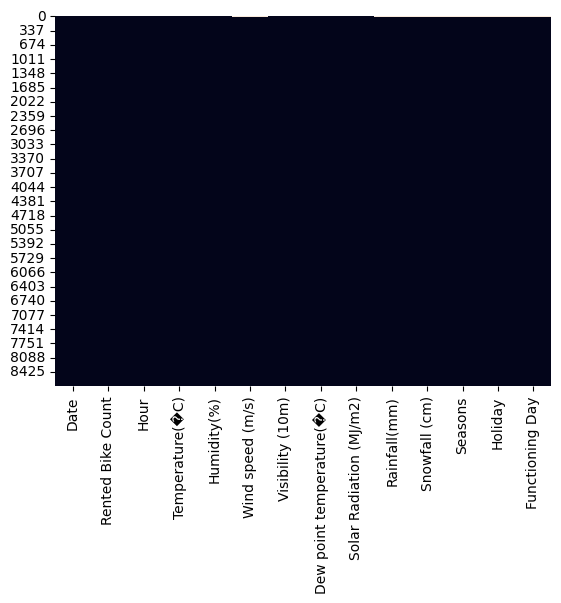

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(bk_data.isnull(), cbar=False);

### What did you know about your dataset?

* There are 8760 observation and 14 features.
* There is no null values.
* Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Date has object data type it should be datetime data type.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(f'Features: {bk_data.columns.to_list()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [10]:
# Dataset Describe
bk_data.describe()

Rented Bike Count    Hour  Temperature(�C)  Humidity(%)  Rainfall(mm)  \
count            8760.00 8760.00          8760.00      8760.00       8758.00   
mean              704.60   11.50            12.88        58.22          0.15   
std               645.00    6.92            11.94        20.38          1.13   
min                 0.00    0.00           -17.80         0.00          0.00   
25%               191.00    5.75             3.50        42.00          0.00   
50%               504.50   11.50            13.70        57.00          0.00   
75%              1065.25   17.25            22.50        74.00          0.00   
max              3556.00   23.00            39.40        98.00         35.00   

       Snowfall (cm)  
count        8758.00  
mean            0.08  
std             0.44  
min             0.00  
25%             0.00  
50%             0.00  
75%             0.00  
max             8.80

### Variables Description 

*   **Date** - Date(year-month-day)
*   **Rented_Bike_Count** - Count of bikes rented at each hour
*   **Hour** - Hour of the day(0-23)
*   **Temperature** - Temperature for the day
*   **Humidity** - Humidity Measure
*   **Windspeed** - Windspeed
*   **Visibility** - Visibility Measure
*   **Dew point temperature** - Dew Point Measure
*   **Solar radiation** - Solar Radiation Measure
*   **Rainfall** - Rainfall in mm
*   **Snowfall** - Snowfall in cm
*   **Seasons** - Season Name
*   **Holiday** - Whether Holiday or Not
*   **Functional Day** - Functional Day or Not

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
# bk_data.nunique()
for i in bk_data.columns.tolist():
  print(f"No. of unique values in {i} is {bk_data[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(�C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 66.
No. of unique values in Visibility (10m) is 1791.
No. of unique values in Dew point temperature(�C) is 558.
No. of unique values in Solar Radiation (MJ/m2) is 346.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
#converting few names for convenience
df = bk_data.copy() 
#keeping orginla data safe
df.rename({"Temperature(�C)": "Temperature",  
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",  
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(�C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},  
                axis = "columns", inplace = True) 

In [13]:

print(f'updated columns: {df.columns.to_list()}')

updated columns: ['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day']


In [14]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', dayfirst=True)
    df['Day'] = df['Date'].dt.day_name()
    df['Month'] = df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
    df['Year'] = df['Date'].dt.year
    print('Date column converted to datetime')
else:
    print('Date column does not exist')

Date column converted to datetime


In [15]:
# Convert numeric columns to numeric type, handling non-numeric values
numeric_cols = [
    'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 
    'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 
    'Snowfall', 'Year'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Non-numeric values in {col}: {df[col].isnull().sum()}") 

Non-numeric values in Rented_Bike_Count: 0
Non-numeric values in Hour: 0
Non-numeric values in Temperature: 0
Non-numeric values in Humidity: 0
Non-numeric values in Wind_speed: 2
Non-numeric values in Visibility: 2
Non-numeric values in Dew_point_temperature: 2
Non-numeric values in Solar_Radiation: 2
Non-numeric values in Rainfall: 2
Non-numeric values in Snowfall: 2
Non-numeric values in Year: 0


In [16]:
df.dropna(subset=numeric_cols, inplace=True)

In [17]:
result = df.groupby('Functioning_Day')[numeric_cols].agg(['mean', 'median', 'sum']).T

# Display the result
print(result)

Functioning_Day                     No         Yes
Rented_Bike_Count     mean        0.00      729.28
                      median      0.00      542.00
                      sum         0.00  6171856.00
Hour                  mean       11.30       11.51
                      median     11.00       12.00
                      sum      3333.00    97406.00
Temperature           mean       16.09       12.78
                      median     16.30       13.50
                      sum      4747.40   108117.70
Humidity              mean       60.49       58.15
                      median     62.00       57.00
                      sum     17846.00   492141.00
Wind_speed            mean        1.70        1.73
                      median      1.50        1.50
                      sum       500.60    14606.60
Visibility            mean     1521.54     1433.74
                      median   1814.00     1689.00
                      sum    448855.00 12133739.00
Dew_point_temperature mean     

In [18]:
#finding mean, median and sum based on seasons
result = df.groupby('Seasons')[numeric_cols].agg(['mean', 'median', 'sum']).T

# Display the result
print(result)

Seasons                          Autumn     Spring     Summer     Winter
Rented_Bike_Count     mean       819.60     730.03    1034.07     225.54
                      median     763.50     583.00     905.50     202.50
                      sum    1790002.00 1611909.00 2283234.00  486711.00
Hour                  mean        11.50      11.50      11.50      11.51
                      median      11.50      11.50      11.50      12.00
                      sum      25116.00   25392.00   25392.00   24839.00
Temperature           mean        14.12      13.05      26.58      -2.54
                      median      13.85      13.30      26.60      -2.20
                      sum      30839.90   28807.10   58694.80   -5476.70
Humidity              mean        59.23      58.78      64.98      49.76
                      median      59.00      58.00      65.00      47.00
                      sum     129355.00  129779.00  143479.00  107374.00
Wind_speed            mean         1.49       1.87 

In [19]:
#finding sum, mean and median based on holiday
result=df.groupby('Holiday')[numeric_cols].agg(['mean', 'median', 'sum']).T
print(result)

Holiday                        Holiday  No Holiday
Rented_Bike_Count     mean      499.76      715.34
                      median    240.00      525.00
                      sum    215895.00  5955961.00
Hour                  mean       11.50       11.50
                      median     11.50       12.00
                      sum      4968.00    95771.00
Temperature           mean        9.95       13.04
                      median      8.65       13.90
                      sum      4298.30   108566.80
Humidity              mean       53.73       58.46
                      median     53.00       57.00
                      sum     23212.00   486775.00
Wind_speed            mean        1.83        1.72
                      median      1.50        1.50
                      sum       790.40    14316.80
Visibility            mean     1521.68     1432.29
                      median   1942.00     1680.00
                      sum    657366.00 11925228.00
Dew_point_temperature mean     

In [20]:
#finding sum, mean and median based on Month
result=df.groupby('Month')[numeric_cols].agg(['mean', 'median', 'sum']).T
print(result)

Month                               Apr        Aug        Dec        Feb  \
Rented_Bike_Count     mean       728.09     876.19     249.15     225.94   
                      median     655.00     732.50     236.50     195.00   
                      sum     524227.00  651887.00  184872.00  151833.00   
Hour                  mean        11.50      11.50      11.53      11.50   
                      median      11.50      11.50      12.00      11.50   
                      sum       8280.00    8556.00    8555.00    7728.00   
Temperature           mean        12.95      28.74      -1.92      -1.66   
                      median      12.60      28.50      -1.85      -1.40   
                      sum       9322.60   21379.90   -1424.30   -1118.70   
Humidity              mean        54.61      64.80      55.87      44.85   
                      median      53.00      64.00      53.00      42.00   
                      sum      39320.00   48213.00   41459.00   30142.00   
Wind_speed  

In [21]:
#finding mean,sum and median based on Year
result=df.groupby('Year')[numeric_cols].agg(['mean', 'median', 'sum']).T
print(result)

Year                               2017        2018
Rented_Bike_Count     mean       249.15      746.88
                      median     236.50      586.00
                      sum     184872.00  5986984.00
Hour                  mean        11.53       11.50
                      median      12.00       11.50
                      sum       8555.00    92184.00
Temperature           mean        -1.92       14.26
                      median      -1.85       15.60
                      sum      -1424.30   114289.40
Humidity              mean        55.87       58.45
                      median      53.00       58.00
                      sum      41459.00   468528.00
Wind_speed            mean         1.74        1.72
                      median       1.45        1.50
                      sum       1289.90    13817.30
Visibility            mean      1330.44     1446.53
                      median    1673.50     1699.00
                      sum     987189.00 11595405.00
Dew_point_te

In [22]:
#finding mean,sum and median based on Day
result=df.groupby('Day')[numeric_cols].agg(['mean', 'median', 'sum']).T
print(result)

Day                              Friday     Monday   Saturday     Sunday  \
Rented_Bike_Count     mean       747.93     730.56     709.53     625.16   
                      median     567.50     533.00     519.00     406.00   
                      sum     949876.00  911743.00  885492.00  780194.00   
Hour                  mean        11.52      11.50      11.50      11.50   
                      median      12.00      11.50      11.50      11.50   
                      sum      14627.00   14352.00   14352.00   14352.00   
Temperature           mean        12.51      13.05      13.04      13.00   
                      median      12.90      13.90      13.10      13.75   
                      sum      15886.70   16285.70   16270.50   16226.00   
Humidity              mean        57.03      58.20      56.86      58.50   
                      median      57.00      56.00      56.50      57.00   
                      sum      72433.00   72633.00   70956.00   73012.00   
Wind_speed  

In [23]:
#Weekend count
weekend = df.groupby('Day')['Rented_Bike_Count'].sum().reset_index()
chutti = weekend[(weekend['Day'] == 'Saturday') | (weekend['Day'] == 'Sunday')]
chutti

Day  Rented_Bike_Count
2  Saturday             885492
3    Sunday             780194

In [24]:
#Working day count
workingday = df.groupby('Day')['Rented_Bike_Count'].sum().reset_index()
office = workingday[(workingday['Day'] != 'Saturday') & (workingday['Day'] != 'Sunday')]
office

Day  Rented_Bike_Count
0     Friday             949876
1     Monday             911743
4   Thursday             861999
5    Tuesday             858596
6  Wednesday             923956

In [25]:
#checking total count of working day vs weekend
d = office['Rented_Bike_Count'].sum() > chutti['Rented_Bike_Count'].sum()
print(f' Is it true that total Rented_Bike_Count is more on working day? {d}')

 Is it true that total Rented_Bike_Count is more on working day? True


In [26]:
# Converting day of weeks in Two variable from Monaday to Friday in workingdays and Saturday and Sunday to Weekend
df['Week'] = df['Day'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Working Day')

In [27]:
#finding relation/trend of hour with rented bike count(time series analysis)
df.groupby('Hour')['Rented_Bike_Count'].sum().reset_index().sort_values('Rented_Bike_Count', ascending = False)

Hour  Rented_Bike_Count
18    18             548568
19    19             436229
17    17             415556
20    20             390172
21    21             376479
8      8             370731
16    16             339677
22    22             336821
15    15             302653
14    14             276971
13    13             267635
12    12             255296
23    23             244961
9      9             235784
7      7             221192
11    11             219311
0      0             197379
10    10             192655
1      1             155353
2      2             110095
6      6             104961
3      3              74216
5      5              50765
4      4              48396

In [28]:
#converting hour into morning 0-12 afternoon 12-6 and night after 6pm or 18
df['Time_Period'] = df['Hour'].apply(lambda x:'Morning'  if x < 12 else 'Afternoon' if (x >=12) and (x < 18) else 'Night')

In [29]:
#checking bike demand based on time period of the day
df.groupby('Time_Period')['Rented_Bike_Count'].agg(['sum','mean','count']).reset_index().rename(
    columns = {'sum':'Rented_Bike_Count','mean':'Avg_Rented_Bike_Count','count':'Count'}).sort_values(
    'Rented_Bike_Count', ascending = False)

Time_Period  Rented_Bike_Count  Avg_Rented_Bike_Count  Count
2       Night            2333230                1065.40   2190
1     Morning            1980838                 452.45   4378
0   Afternoon            1857788                 848.31   2190

In [30]:
#finding effect of visibility on rented bike count
df_visibility = df.groupby('Visibility')['Rented_Bike_Count'].agg(['sum','mean','count']).reset_index().rename(
    columns = {'sum':'Rented_Bike_Count','mean':'Avg_Rented_Bike_Count','count':'Count'}).sort_values(
    'Rented_Bike_Count', ascending = False)
df_visibility[:10]

Visibility  Rented_Bike_Count  Avg_Rented_Bike_Count  Count
1788     2000.00            1836232                 818.65   2243
1783     1995.00              26276                 772.82     34
1777     1989.00              22383                 799.39     28
1775     1987.00              21544                 936.70     23
1780     1992.00              21405                 823.27     26
1773     1985.00              19848                 708.86     28
1774     1986.00              19835                1043.95     19
1784     1996.00              19547                 723.96     27
1786     1998.00              19518                 780.72     25
1778     1990.00              19495                 847.61     23

In [31]:
df_humidity = df.groupby('Humidity')['Rented_Bike_Count'].agg(['sum','mean','count']).reset_index().rename(
    columns = {'sum':'Rented_Bike_Count','mean':'Avg_Rented_Bike_Count','count':'Count'}).sort_values(
    'Rented_Bike_Count', ascending = False)
df_humidity[:10]

Humidity  Rented_Bike_Count  Avg_Rented_Bike_Count  Count
34        43             141773                 864.47    164
44        53             140725                 813.44    173
38        47             138105                 885.29    156
47        56             134711                 858.03    157
42        51             131966                 851.39    155
43        52             130054                 867.03    150
46        55             129240                 891.31    145
35        44             126969                 857.90    148
36        45             126234                 888.97    142
45        54             123762                 819.62    151

* **skew** = measure of asymmetry of a distribution

* **kurtosis** = quantify shape of a distribution

In [32]:
#finding skew and kurtosis for checking abnormality in data

skewness = df[numeric_cols].skew()
kurtosis = df[numeric_cols].kurtosis()

result = pd.concat([skewness, kurtosis], axis=1, keys=['Skewness', 'Kurtosis'])
print(result)
          #Aggregate using one or more operations over the specified axis

                       Skewness  Kurtosis
Rented_Bike_Count          1.15      0.85
Hour                      -0.00     -1.20
Temperature               -0.20     -0.84
Humidity                   0.06     -0.80
Wind_speed                 0.89      0.73
Visibility                -0.70     -0.96
Dew_point_temperature     -0.37     -0.75
Solar_Radiation            1.50      1.13
Rainfall                  14.53    284.93
Snowfall                   8.44     93.78
Year                      -2.98      6.90


### What all manipulations have you done and insights you found?

In order to start the analysis, I first started by making data more consistent i.e., I first changed column name to more readable format. Later I converted incorrect data type of date feature into datetime data type and then extracted month, year and day from date and then deleted the date feature. Based on the categorial feaure I calulated average and median for numerical values to undertand how it impact other features. Then finally I tried to find how bike demand is affected based on other features like visibility and humidity. I have also created two different columns, one by dividing day of week into working and weekend to check how bike demand was affected and then based on hour i divided enitre column in different time period to understand its affect.

▶ Insights from analysis:
*  People tends to use bike when company is functional i.e., for non functioning day bike rented was zero.
*  Demand for bike is affected if there is holiday.
*  Visibility shows linear relation with bike demand.
*  People prefer bike when there is moderate humidity 30-55.
*  With change in seasons, demand for bike also changes. Maximum when summer and minium when winter.

Visualization will show more effect with results.

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [33]:
#storing numerical feature in separate variable
#Return a subset of the DataFrame’s columns based on the column dtypes
num_feature = df.select_dtypes(exclude='object')    
print(f'Numerical feature : {num_feature.columns.to_list()}')

Numerical feature : ['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Year']


In [34]:
#storing categorial feature in separate variable
#Pandas isin() method is used to filter data frames using boolean value true of false
#Tilde sign (~)works as a negation operator i.e reverse true to false and false to true
cat_feature = df.loc[:,  ~df.columns.isin(num_feature.columns.to_list())] 
print(f'Categorical feature : {cat_feature.columns.to_list()}')              

Categorical feature : ['Seasons', 'Holiday', 'Functioning_Day', 'Day', 'Month', 'Week', 'Time_Period']


In [35]:
#checking outliers using box plot
def box_plot(df,feature):
  for i,col in enumerate(feature.columns) :
    plt.figure(figsize = (20,25))
    if df[col].dtypes == 'object':
      plt.subplot(4,2,i+1);
      sns.boxplot(x=df[col],y=df["Rented_Bike_Count"]);
      plt.xticks(fontsize = 18, rotation = 90);
    else:
      plt.subplot(6,2,i+1);
      sns.boxplot(df[col]);
    plt.tight_layout();

###Univariate

In [36]:
#analysing numerical value using density plot with mean and median
#Rose-Red Color indicate mean of data
#Cyan indicate median of data
def density_plot(dfr,num_feature):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(num_feature) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.distplot(dfr[col], color = '#055E85', fit = norm);
    feature = dfr[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.title(f'{col.title()}');
    plt.tight_layout();

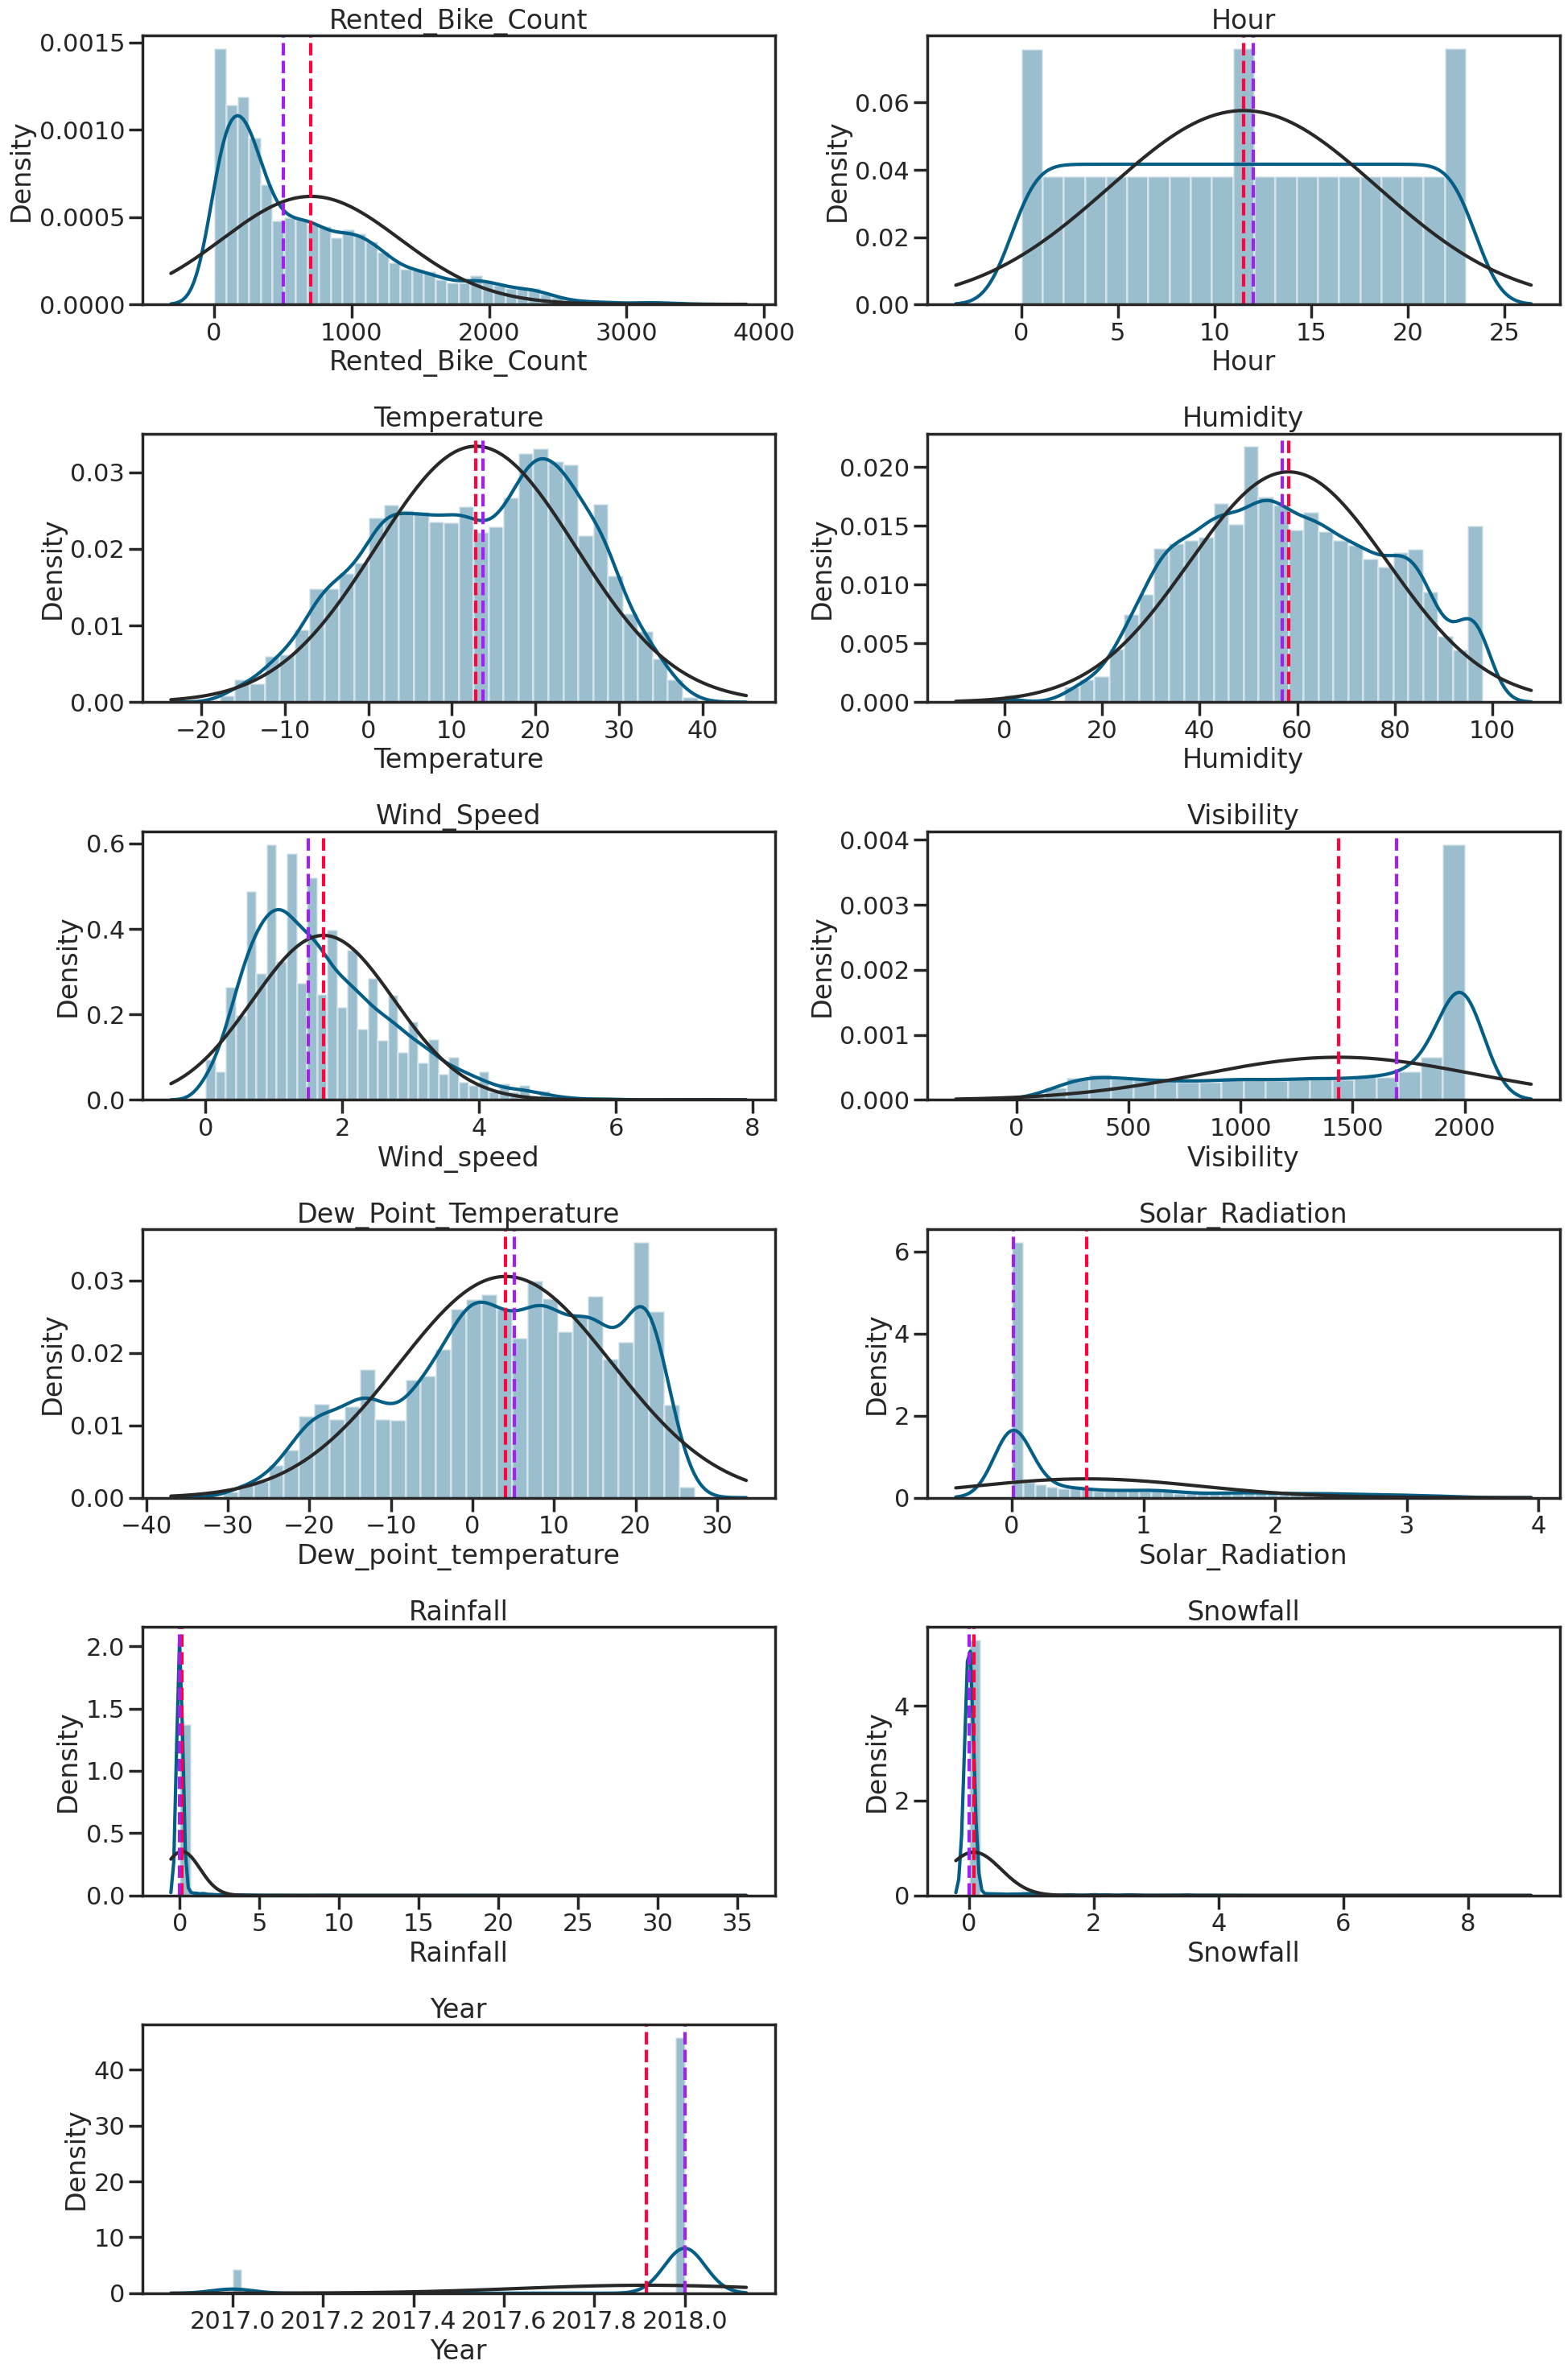

In [37]:
#graph to analyse distribution of different numerical features
# Check data types of columns
density_plot(df,numeric_cols)


In [38]:
def box_plot(df, features):
    plt.figure(figsize=(20, 25))
    for i, col in enumerate(features):
        plt.subplot(len(features) // 3 + 1, 3, i + 1)
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

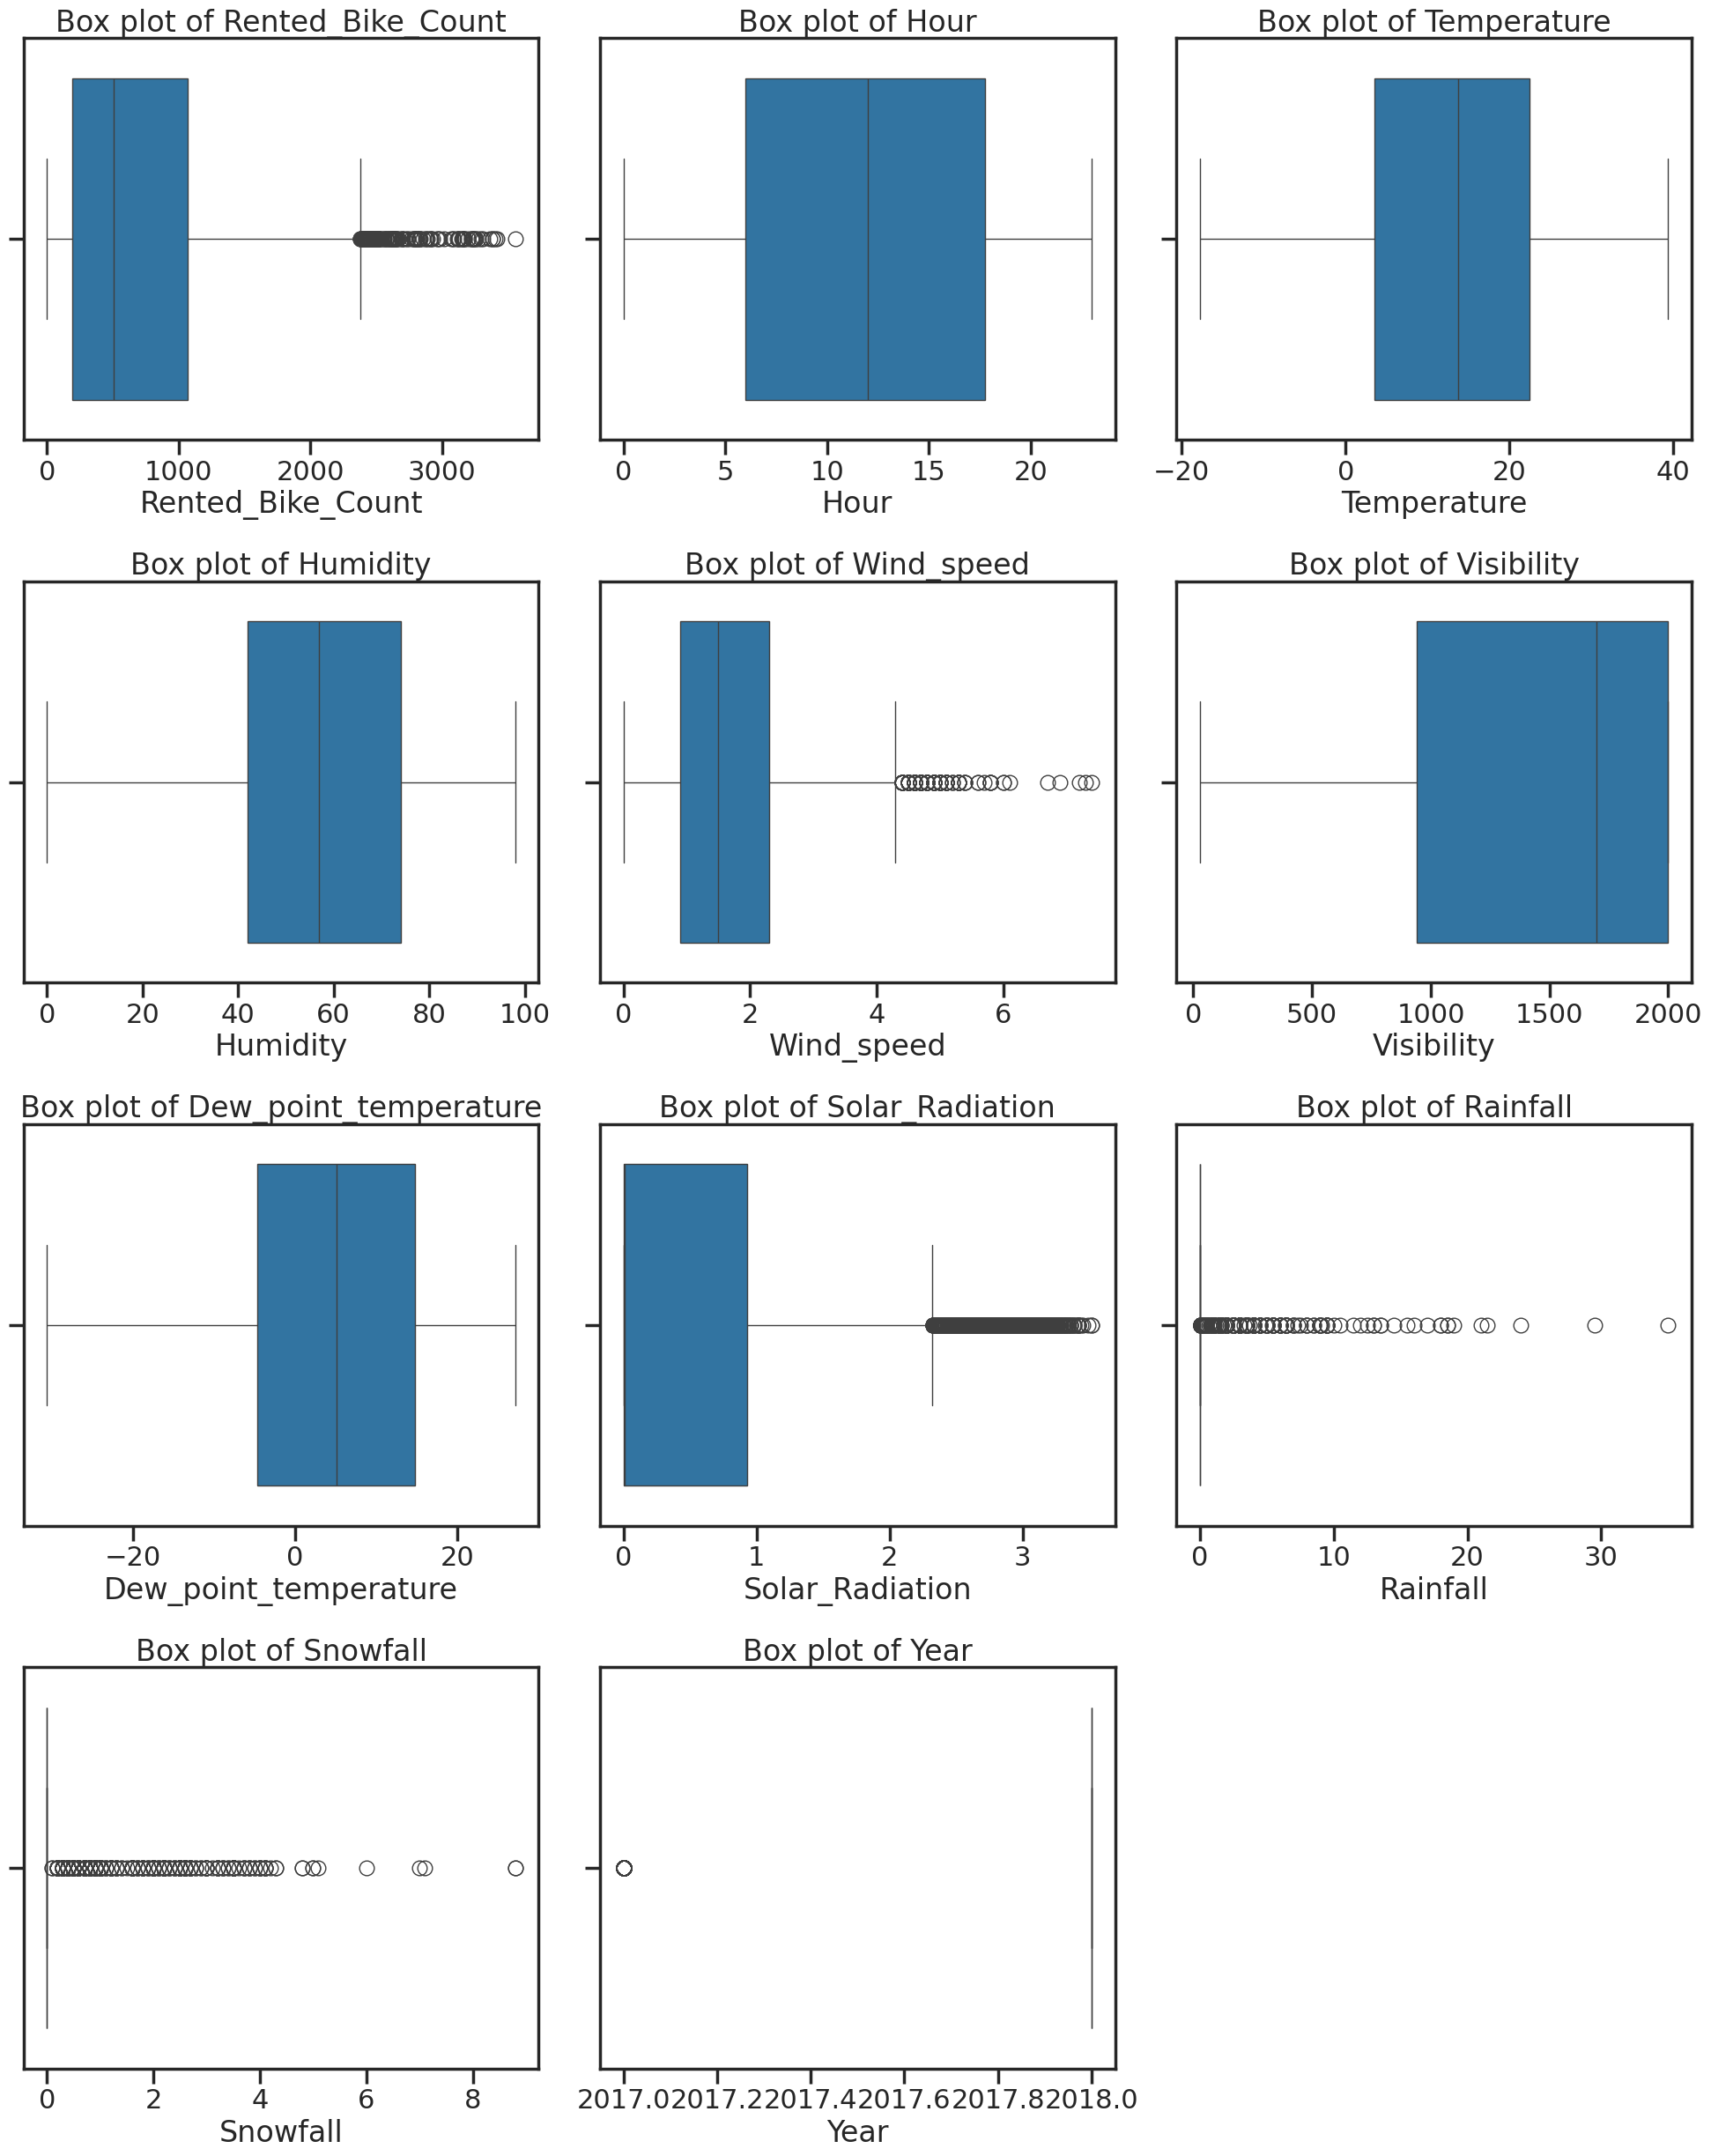

In [39]:
#using box plot function checking outliers in numerical features
box_plot(df,numeric_cols)

#### Chart 1- Understanding the distribution

##### 1. Why did you pick the specific chart?

In order to understand the distribution for each feature, I plotted distplot along with its mean and median. Distplot is shows both histogram and kde plot and is best suited for continous data.

##### 2. What is/are the insight(s) found from the chart?

  **Right**/Positive Skewed Distribution: Mode < Median < Mean: **Rented_Bike_Count**, **Wind_speed**, **Solar Radiation**

  **No Skew**: Mean = Median = Mode : **Hour**, **Temperature**, **Humidity**,**Rainfall**,**Snowfall**

  **Left**/Negative Skewed Distribution: Mean < Median < Mode: **visibility**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In this context it can not define any business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart 2- Visualization of Outliers

##### 1. Why did you pick the specific chart?

Box plot help in Visualization of outliers, distribution of median.

##### 2. What is/are the insight(s) found from the chart?

* In rented bike count feature there are few points accumulated above maximum range. 
* Feature like snowfall and rainfall show sparse data as there are more number of values which is zero i.e., upto 75 quartile.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Box plot alone can not provide any business impact, plotted only to visulize distribution and understanding of anamolies.

###Bivariate

Skipping non-numeric feature Date for scatterplot.


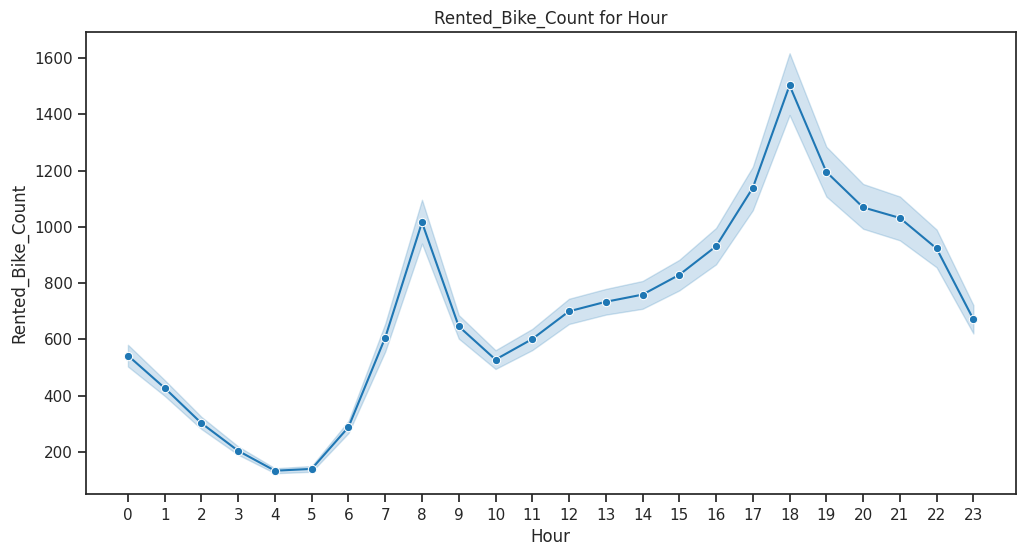

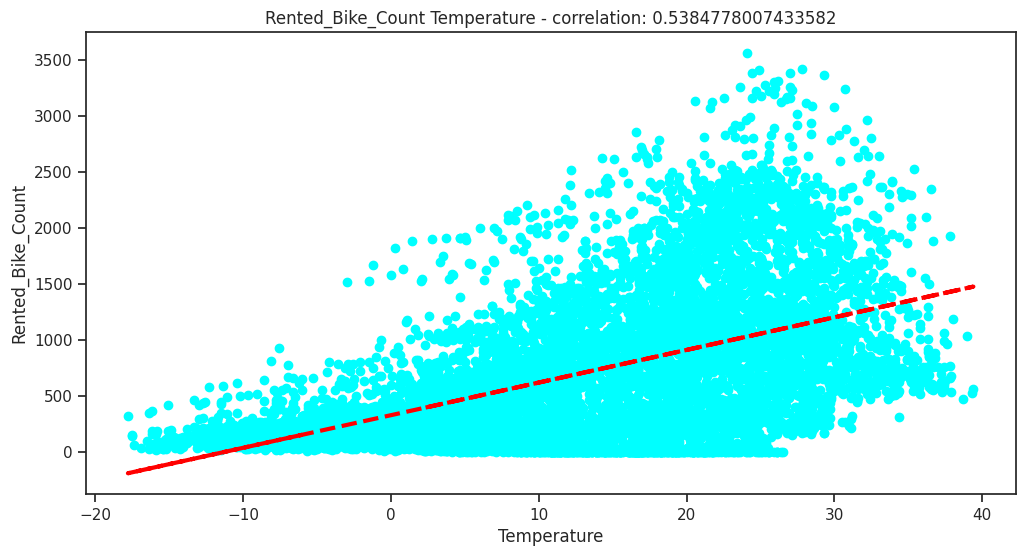

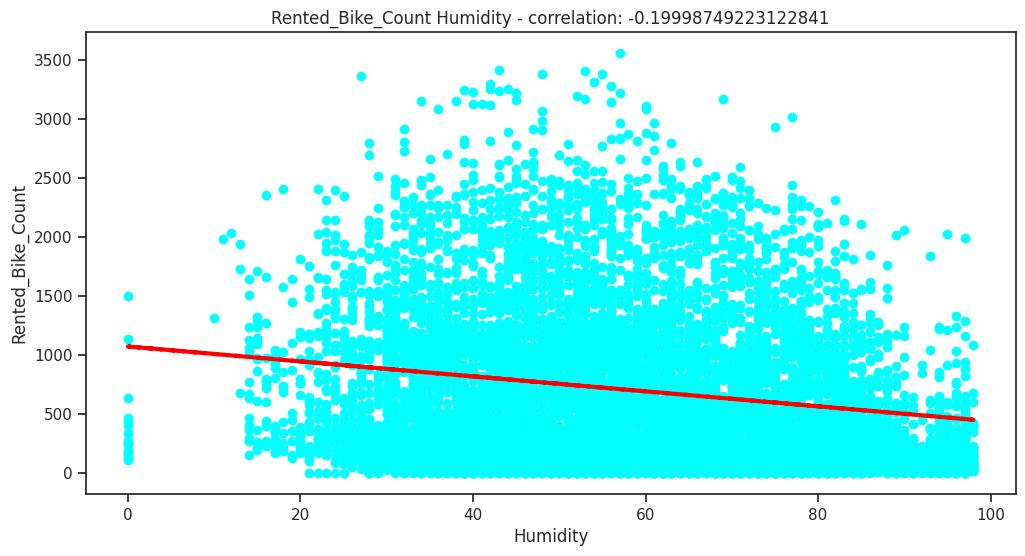

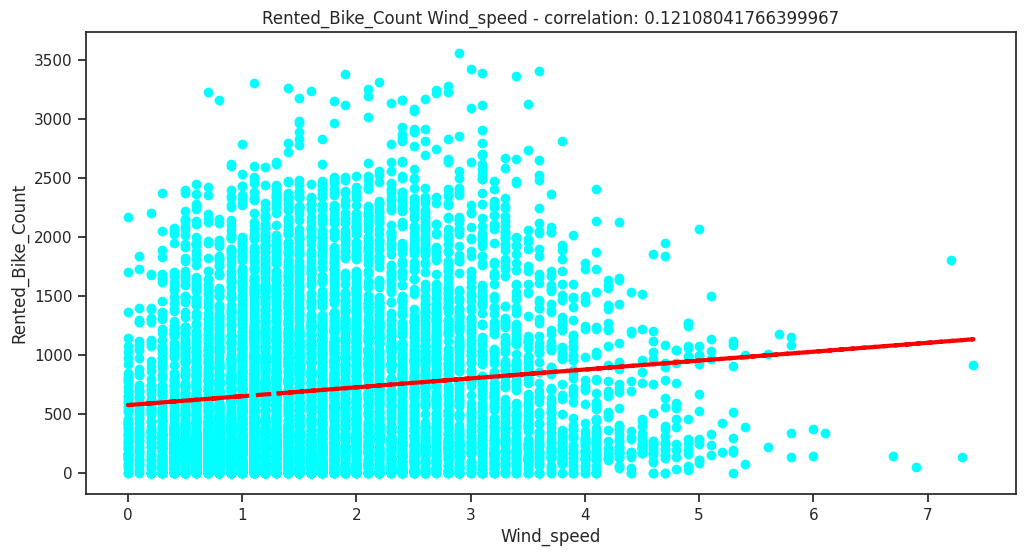

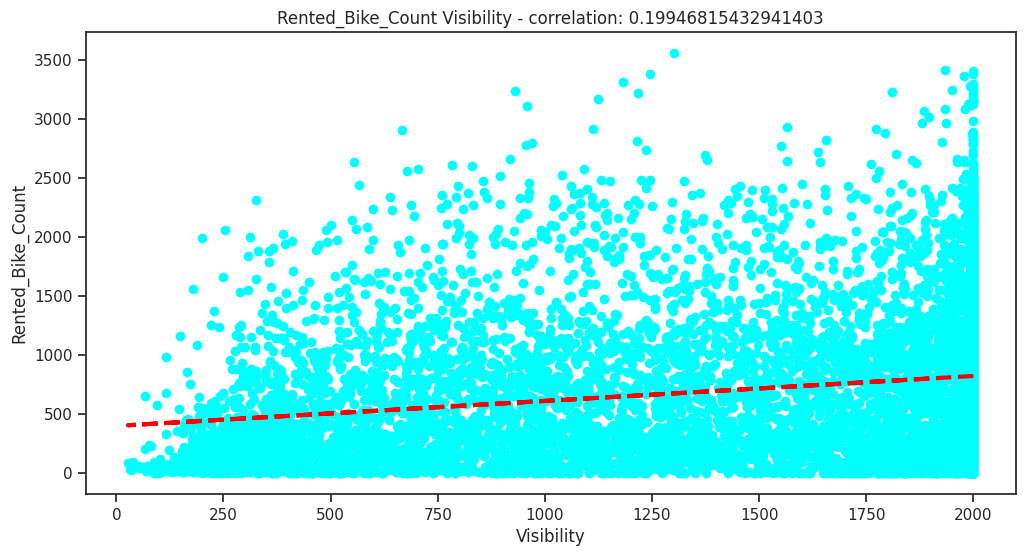

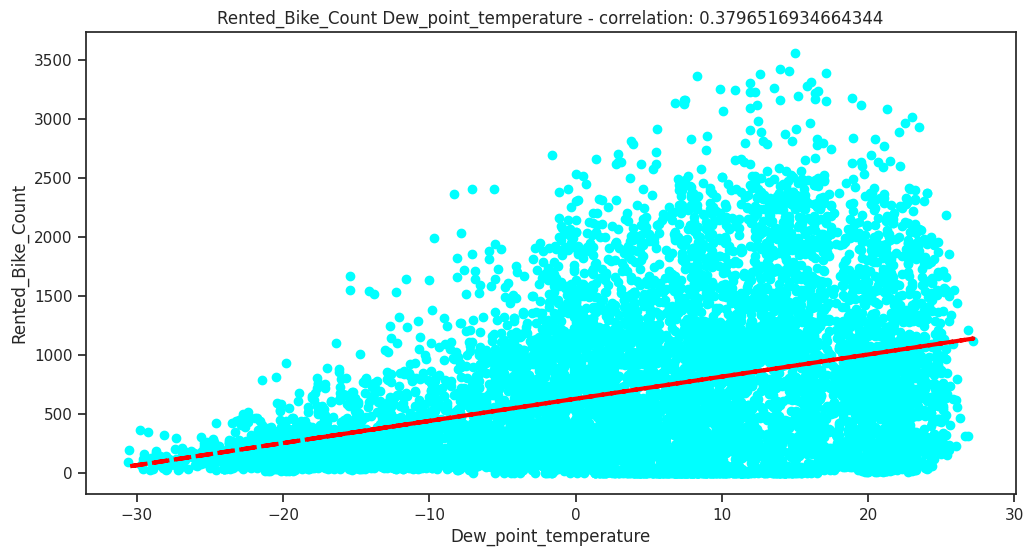

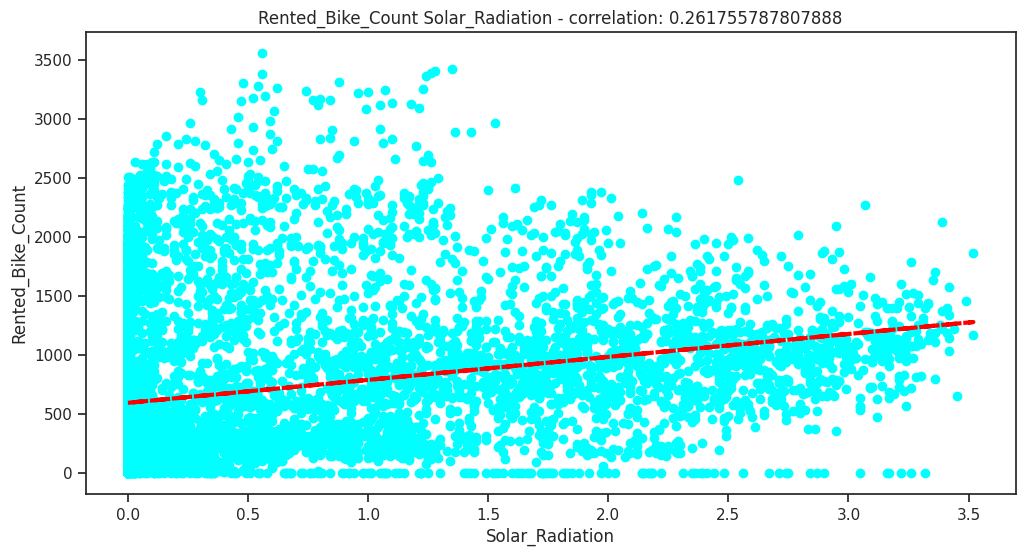

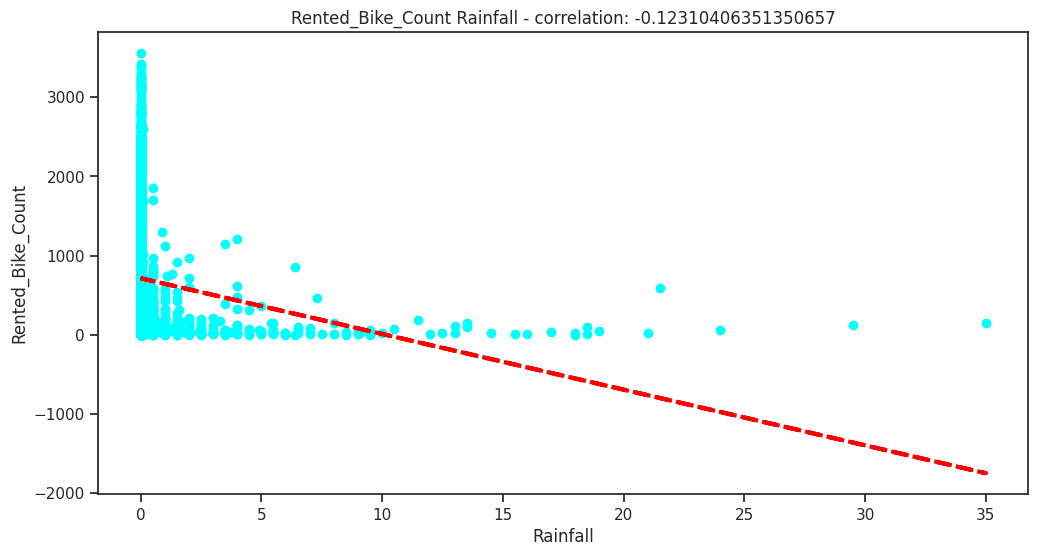

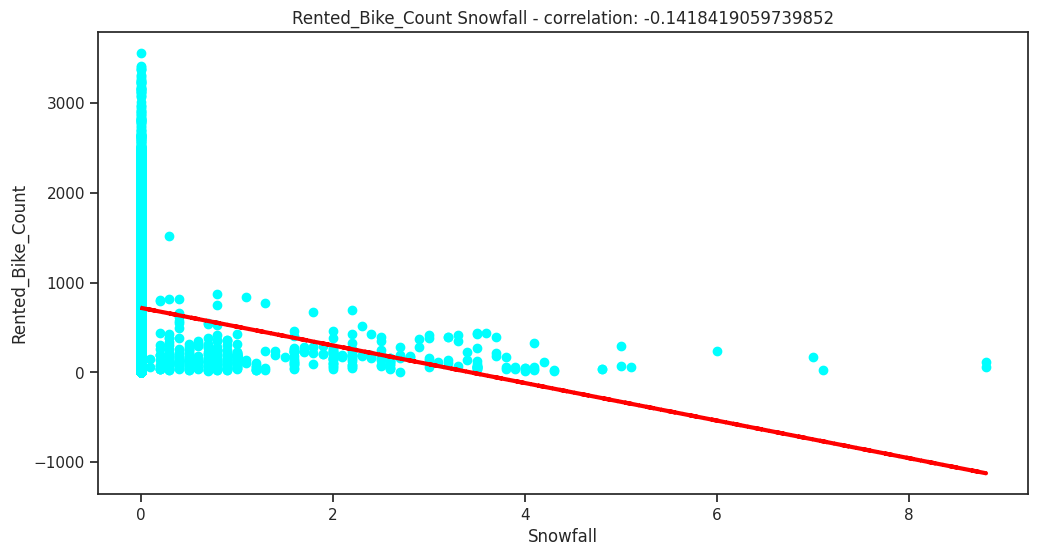

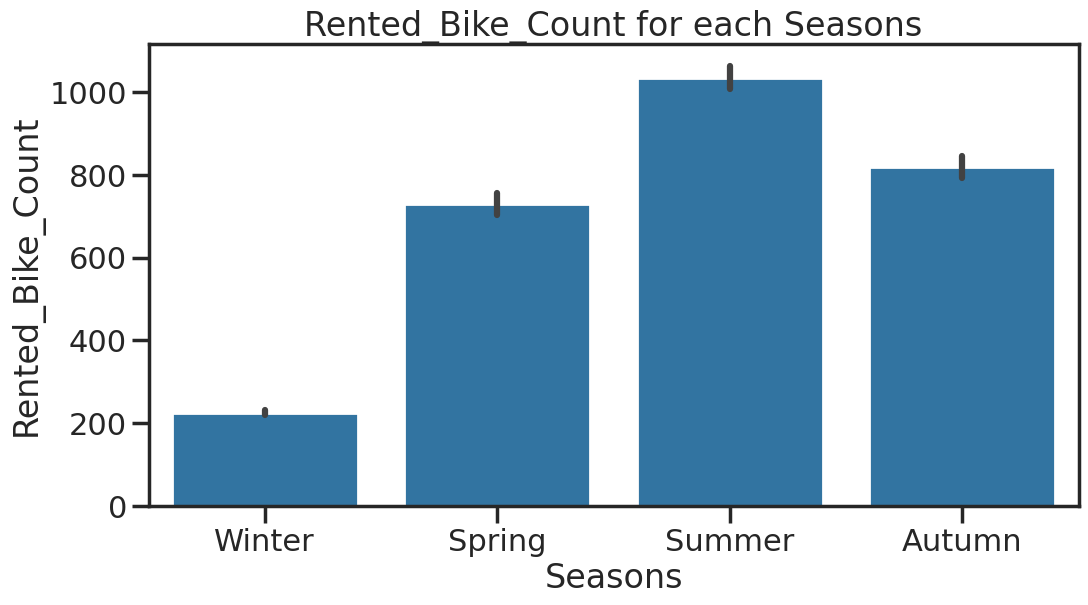

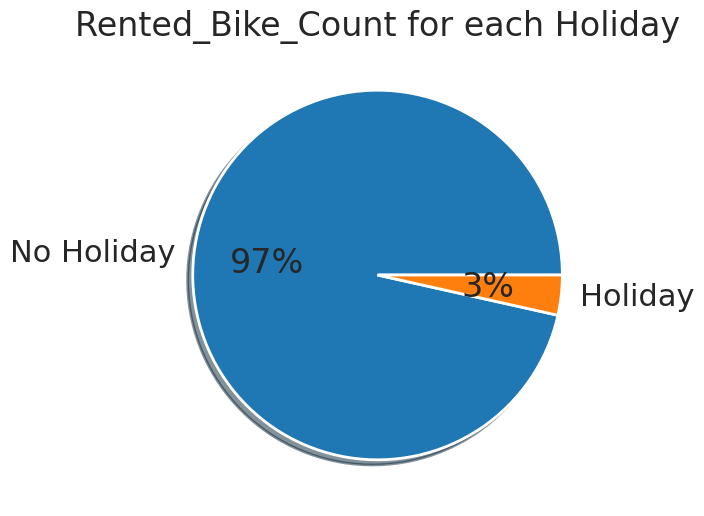

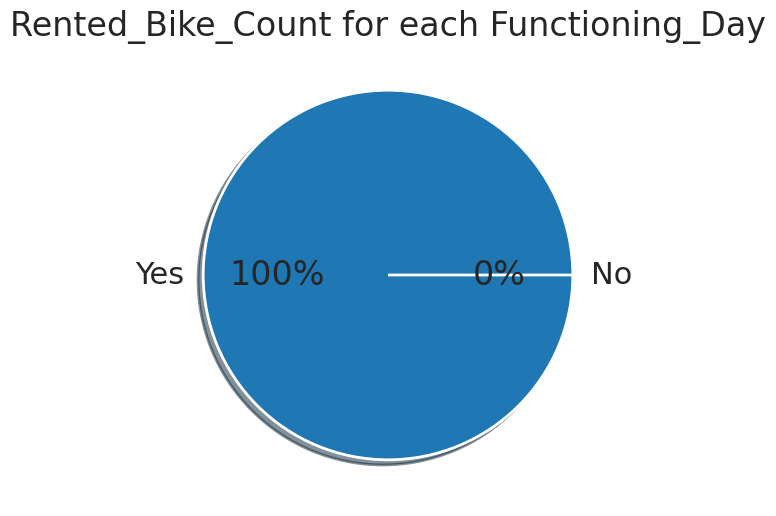

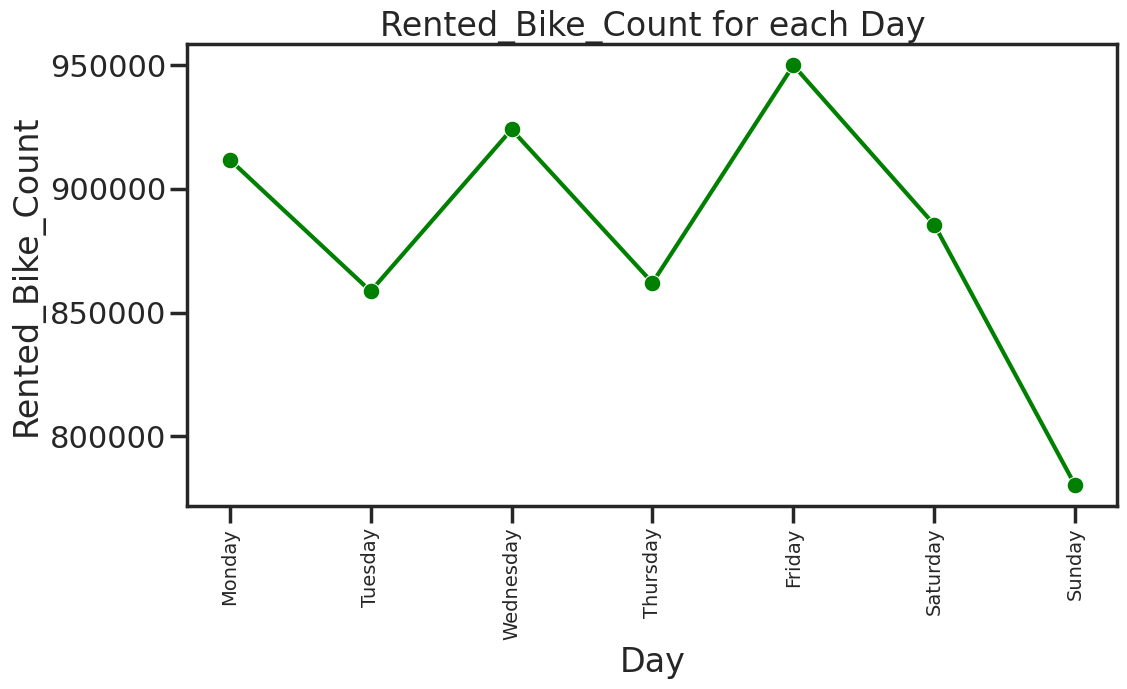

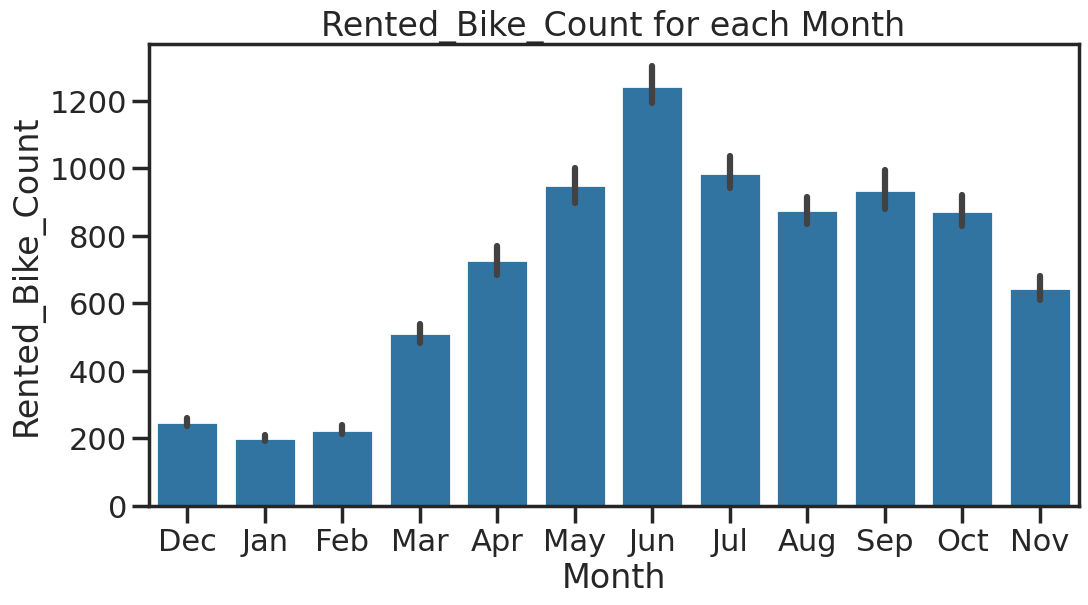

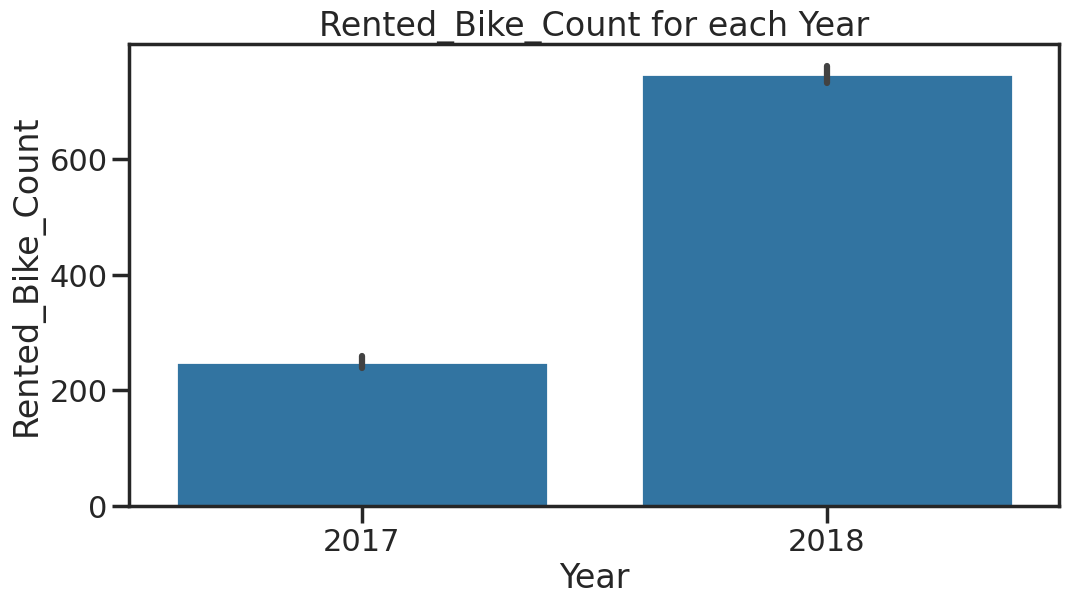

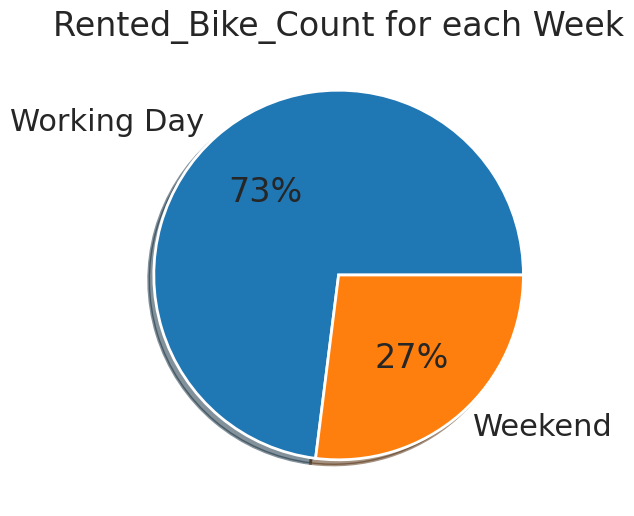

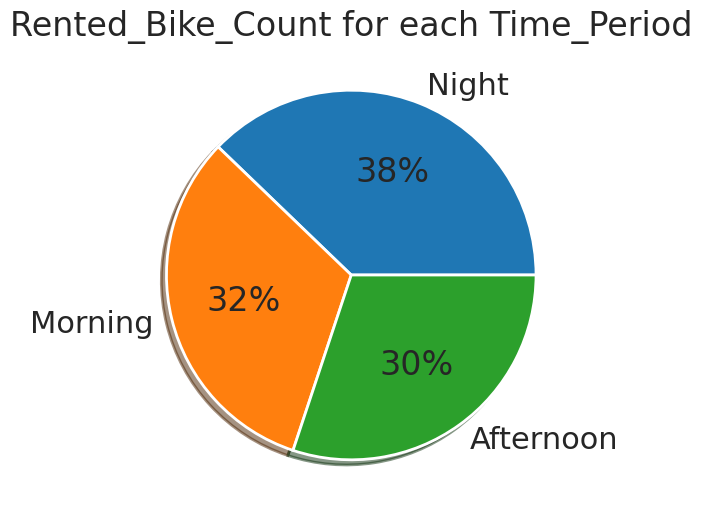

In [40]:
for i in df.columns:
    if i == 'Rented_Bike_Count':
        pass
    # Barplot
    elif i in ['Seasons', 'Month', 'Year']:
        sns.set_context('poster')
        plt.figure(figsize=(12, 6))
        chart = sns.barplot(x=df[i], y=df["Rented_Bike_Count"])
        plt.title(f"Rented_Bike_Count for each {i}")
        plt.show()
        print('=' * 120)
    # Pie chart
    elif i in ['Holiday', 'Functioning_Day', 'Week', 'Time_Period']:
        grp = df.groupby([i], as_index=False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count', ascending=False)
        sns.set_context('poster')
        plt.figure(figsize=(12, 6))
        palette_color = sns.color_palette('bright')
        chart = plt.pie(grp['Rented_Bike_Count'], labels=grp[i], shadow=True, autopct='%.0f%%')
        plt.title(f"Rented_Bike_Count for each {i}")
        plt.show()
        print('=' * 120)
    # Lineplot for Day
    elif i == 'Day':
        workingdays = {'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}
        workingday = pd.DataFrame(workingdays)
        grp = df.groupby([i], as_index=False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count', ascending=False)
        new_df = workingday.merge(grp, on='Day')
        sns.set_context('poster')
        plt.figure(figsize=(12, 6))
        chart = sns.lineplot(data=new_df, x=i, y='Rented_Bike_Count', marker='o', color='green')
        plt.xticks(fontsize=14, rotation=90)
        plt.title(f"Rented_Bike_Count for each {i}")
        plt.show()
        print('=' * 120)
    # Lineplot for Hour
    elif i == 'Hour':
        sns.set_context('notebook')
        plt.figure(figsize=(12, 6))
        chart = sns.lineplot(x=df[i], y=df["Rented_Bike_Count"], marker='o')
        plt.xticks(range(24))
        plt.title(f"Rented_Bike_Count for {i}")
        plt.show()
        print('=' * 120)
    # Scatterplot for continuous variables
    else:
        if np.issubdtype(df[i].dtype, np.number):
            sns.set_context('notebook')
            fig = plt.figure(figsize=(12, 6))
            ax = fig.gca()
            feature = df[i]
            label = df['Rented_Bike_Count']
            correlation = feature.corr(label)
            plt.scatter(x=feature, y=label, color='cyan')
            plt.xlabel(i)
            plt.ylabel('Rented_Bike_Count')
            ax.set_title('Rented_Bike_Count ' + i + ' - correlation: ' + str(correlation))
            z = np.polyfit(df[i], df['Rented_Bike_Count'], 1)
            y_hat = np.poly1d(z)(df[i])
            plt.plot(df[i], y_hat, "r--", lw=3)
            plt.show()
            print('=' * 120)
        else:
            print(f"Skipping non-numeric feature {i} for scatterplot.")

#### Chart - 3 Effect of Hour on Rented Bike Count (Lineplot and Pie chart)

##### 1. Why did you pick the specific chart?

Linetplot - I choose lineplot to plot hour and rented bike count for each hour because it helps in plotting for continous and vizualize the possible trend. Here rented bike count in the plot is represented by mean value and the shaded around the line shows the confidence interval which shows the uncertainity in the mean estimate i.e., it helps to visualize the range of values within which the true mean is likely to fall, based on the sample data. (* Note : The width of the confidence interval is determined by the sample size, the variance of the data, and the desired level of confidence.For example, if the sample size is large and the data are very consistent (i.e. low variance), then the confidence interval will be narrow, indicating that the mean estimate is very precise. On the other hand, if the sample size is small or the data are highly variable, then the confidence interval will be wider, indicating that the mean estimate is less precise.)

Pie chart - In order to show different percentage of rented bike count around different time period of the day - morning (0-12), afternoon(12-18) and night(18-0). Pie chart help in better understanding of different proportion of data.

##### 2. What is/are the insight(s) found from the chart?

Lineplot for hour and rented bike count shows that:
* Demand for bike is more during 8-10 in morning and 18-20 in night.
* Bike demand from midnight start decreasing till 4 in morning then gradually increase and comes at peak in night.

Pie chart for total rented bike count and time period shows:
* 38% of demand was in night, 32% in morning and 30% in afternoon.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hour of the day definetly plays important role for any business. It help in understanding the behaviour of customer engagement and how company should be prepared to deal with the situation.
In this case since the demand is more is more in night and morning specifically to 8-9 and 18-20, stable supply to meet demand during those will increase revenue whereas shortage will cause negative growth.

#### Chart - 4 Effect of different day of week (Lineplot and Pie chart)

##### 1. Why did you pick the specific chart?

Lineplot - Lineplot helps in time series analysis to learn the trend.

Pie chart - As the day of the week was divided into working (Monday-Friday) and weekend (Sat- Sun), pie chart help in understanding the percentage total rented bike count for the two category.

##### 2. What is/are the insight(s) found from the chart?

Lineplot for Day and Total Rented bike count shows:
* There is a increase in demand from mondat to thrusday then it lowers on friday, later increases on satuerday and shows least demand in sunday.

Pie Chart - It shows that 72% bike demand is during working day and 28% bike demand is on weekend.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, based on the activity it is necessary to maintain stable supply for most demanding day as it will directly affect revenue in case of shortage. Based on the demand if company will not fulfill criteria it will not only have negative brand effect but also low retention in customers.

#### Chart - 5 Effect of Month, Season and Year on Rented Bike Count (Barplot)

##### 1. Why did you pick the specific chart?

I used this chart because it helps to compare between different categories.

##### 2. What is/are the insight(s) found from the chart?

Month and rented bike count shows:
* Bike count increase from January till June then there is a small decrease and again rise in October and gradually decrease till December.

Season and rented bike count shows:
* Demand for bike count is more in summer and lower in winters and with season graph it is also justified.

Year and rented bike count:
* There is a increase in demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, based on the above insight it will help in customer retention and growth.

Since data available is only for two year, therefore year itself can not have any much of impact on business, however it shows increase which is a sign of market capture for a new business.

#### Chart - 6 Effect on Functioning day and Holiday (Pie Chart)

##### 1. Why did you pick the specific chart?

Both functioning day and holiday represnt categorial data with binary answers i.e., yes or no and that's why used the pie chart to understand different allocation of each answer.

##### 2. What is/are the insight(s) found from the chart?

Pie chart of Functioning day shows:
* There are 0 rented bike count on non funcitoning day which means to accomplish demand company should focus more on functioning day.

Pie chart of Holiday shows:
* 97% of bikes are rented when there is no holiday and 3% on holiday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since 100% of the profit are generated on functioning day, company should focus more on increasing functioning hours or day as it will directly generate more traffic for business.

Similarly, holiday always results in reduced foot traffic which can also be seen in the graph how only 3% of the demand is generated on holiday, in order to maintain the profit ratio on holiday slight increase in price could balance profit ratio. Since we do not know exact price point from dataset, it will hard to say what amount to increase and how price affect the demand, will increase in price can lead to negative growth.

#### Chart - 7 Effect of Environment Factors on Rented Bike count (Scatter plot with correlation)

##### 1. Why did you pick the specific chart?

Scatterplot is best when we need to vizualize relationship between two variable.

##### 2. What is/are the insight(s) found from the chart?

* Snowfall and rainfall show negative linear relation with rented bike count.
* Bike demand is more when there is low solar radiaiton.
* When there is high visibility, demand is more.
* Dew point and humidity shows increase in demand when they are present in moderate amount.
* Less windspeed is prefered for maximum demand.
* Average temperature of 20-35 show maximum demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Environmental factors play an important role as the business solely depends upon them for its operations and success.However we can not control these natural environment, therefore based on the demand and how it alter it, company should be alet with wether forecasting to arrange suitable demand based on daily weather.

These natural environment factors can significantly impact the demand for bike rentals by making it less appealing or unsafe to ride a bike.

#### Chart - 8 Box plot for Categorial Feature with respect to Bike Demand


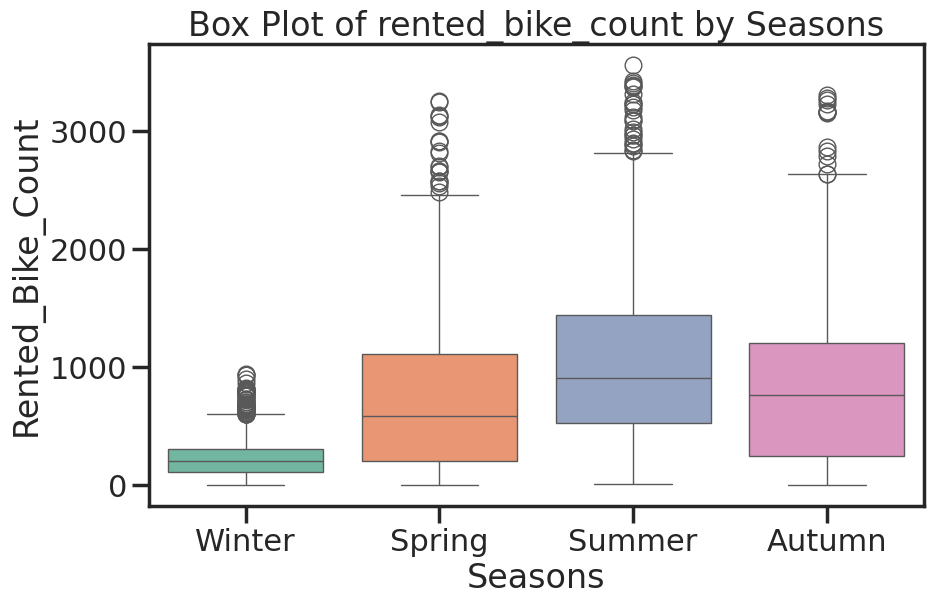

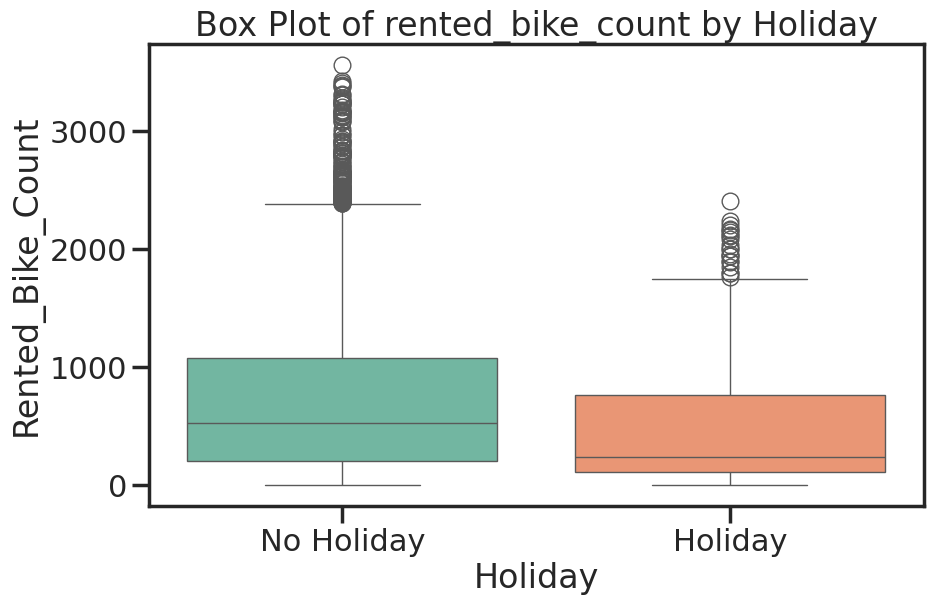

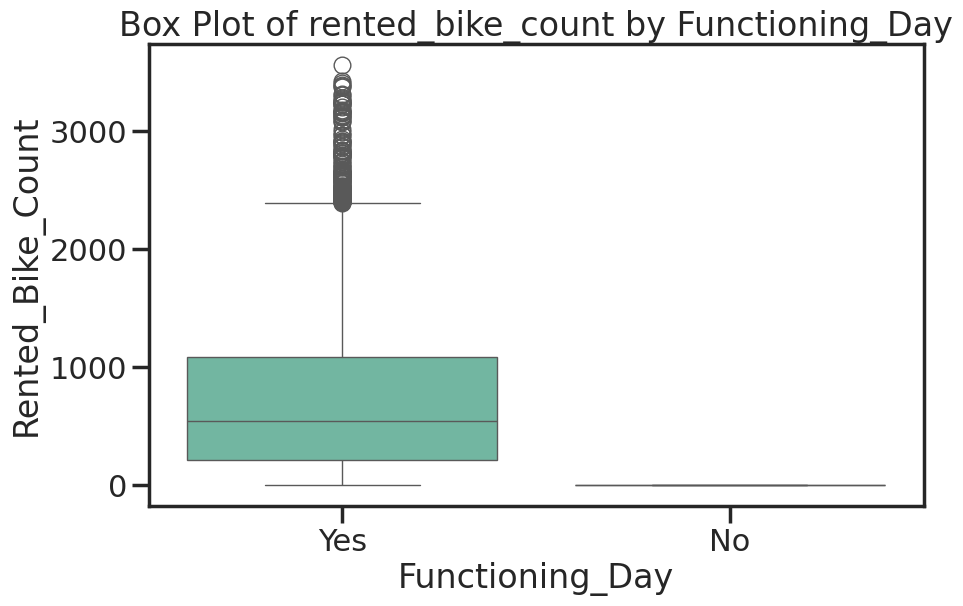

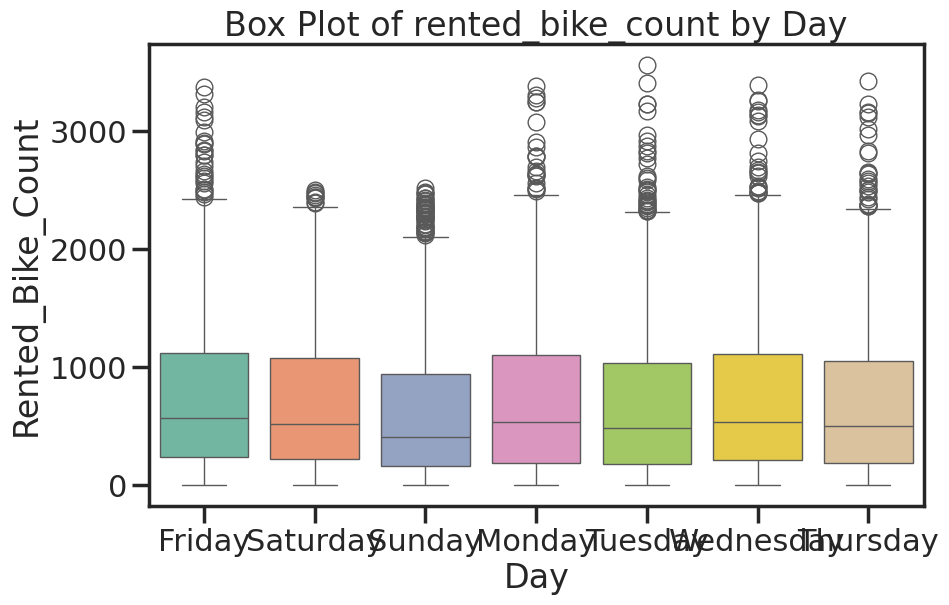

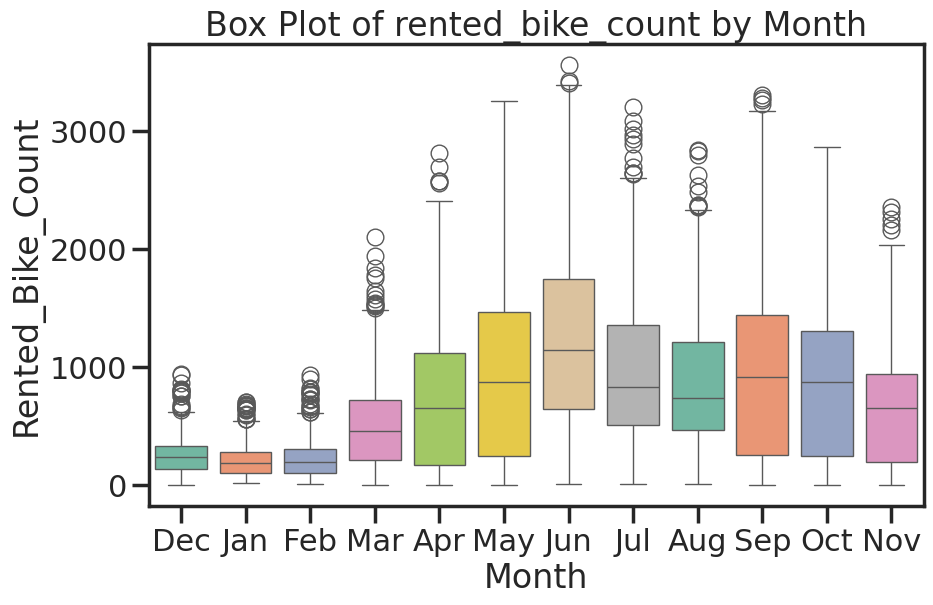

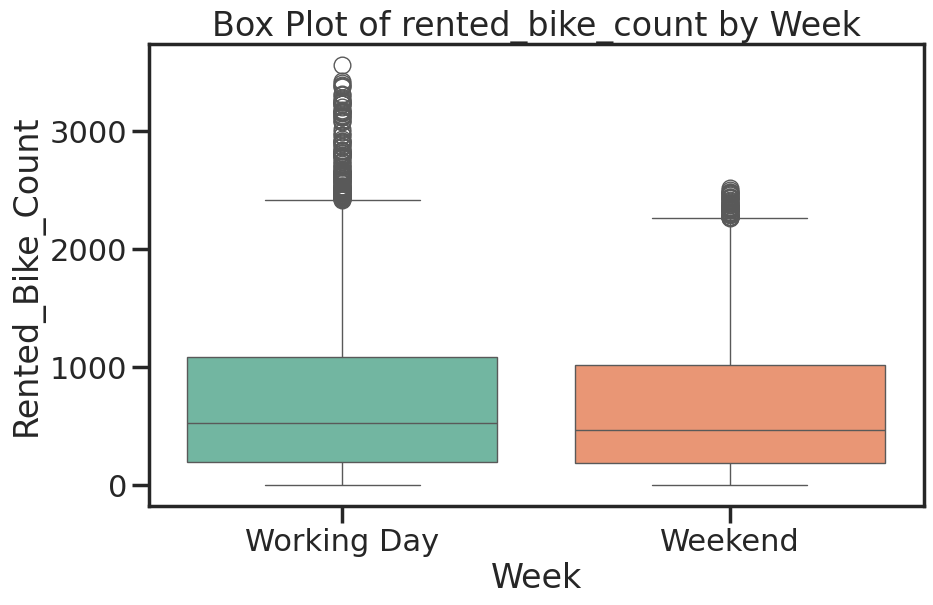

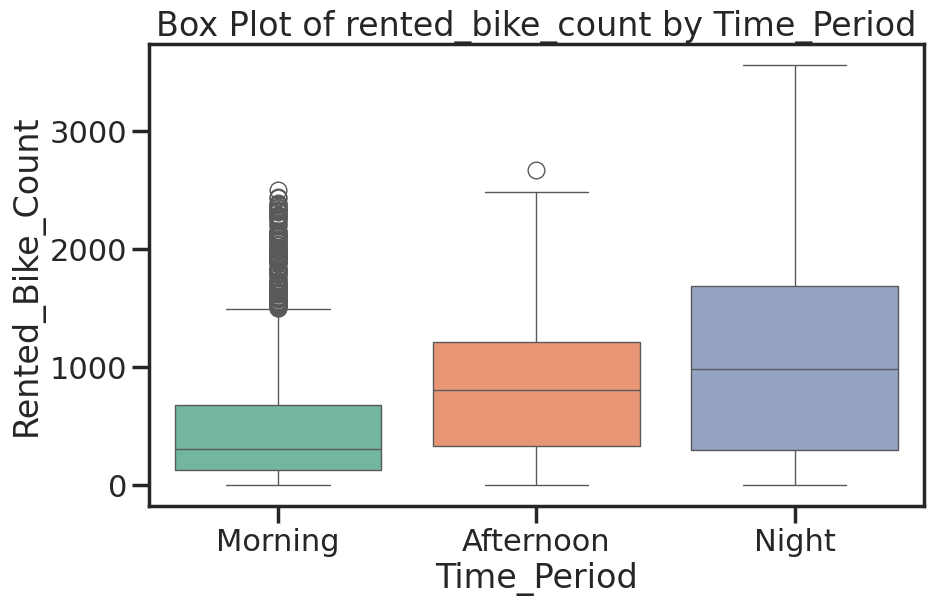

In [41]:
# Chart - 8 visualization code
cat_features=['Seasons', 'Holiday', 'Functioning_Day', 'Day', 'Month', 'Week', 'Time_Period']
palette = 'Set2'  # You can choose any seaborn color palette here

# Loop through each categorical feature and create a box plot with different colors within each category
for cat_feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_feature, y='Rented_Bike_Count', data=df, palette=palette)
    plt.title(f'Box Plot of rented_bike_count by {cat_feature}')
    plt.show()

##### 1. Why did you pick the specific chart?

Box plots are helpful in learning about outliers and to determine where the majority of the points land at a glance.

##### 2. What is/are the insight(s) found from the chart?

Few rented bike count are above the maximum point.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Box plot can not show impact on business, used only to learn about distribution.

###Multivariate

#### Chart - 9 Analyzing how rented bike count if affected every Hour with respect to other features.

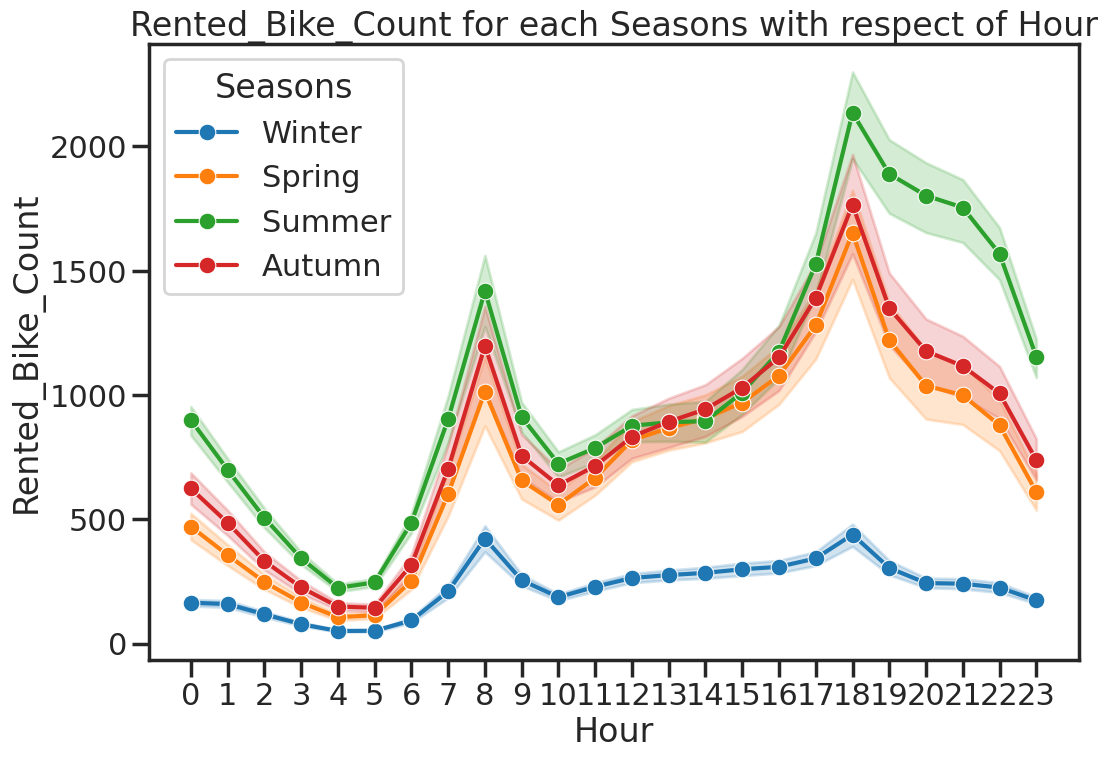

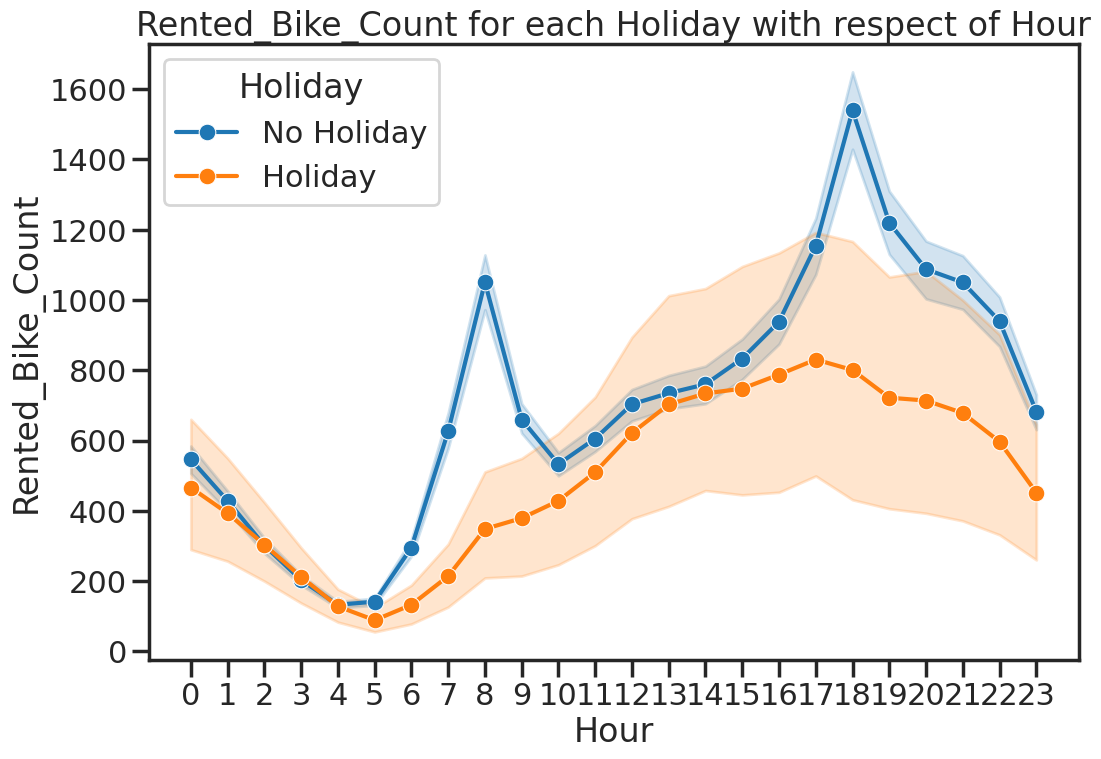

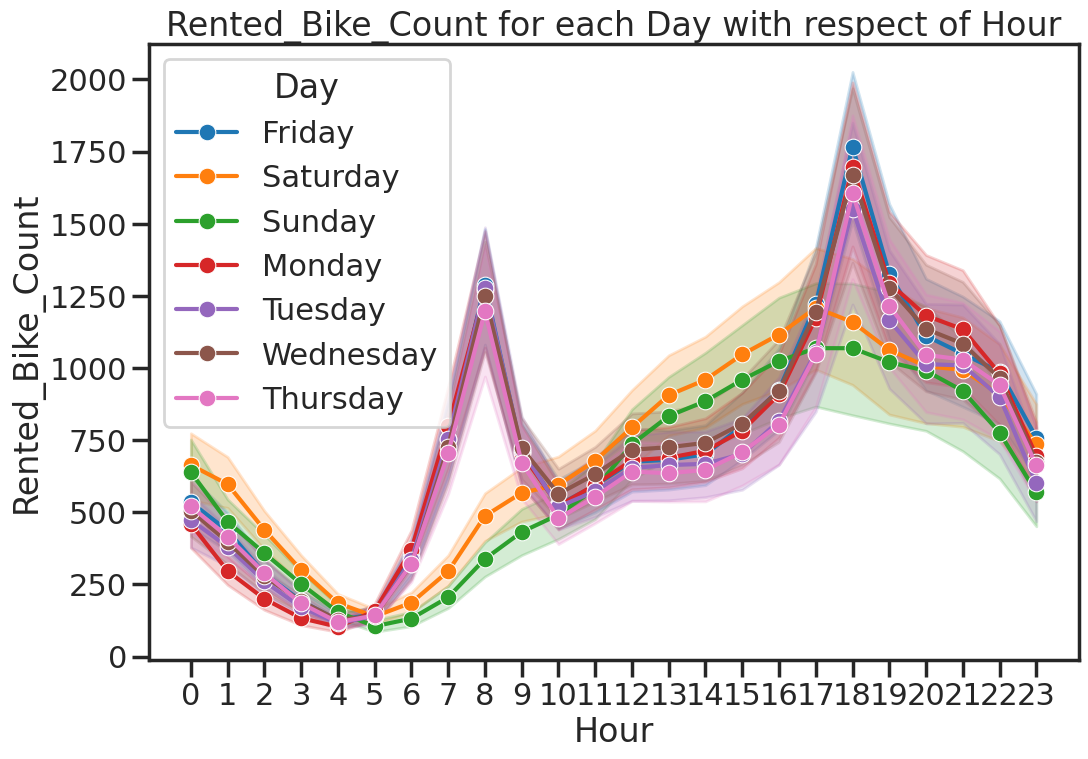

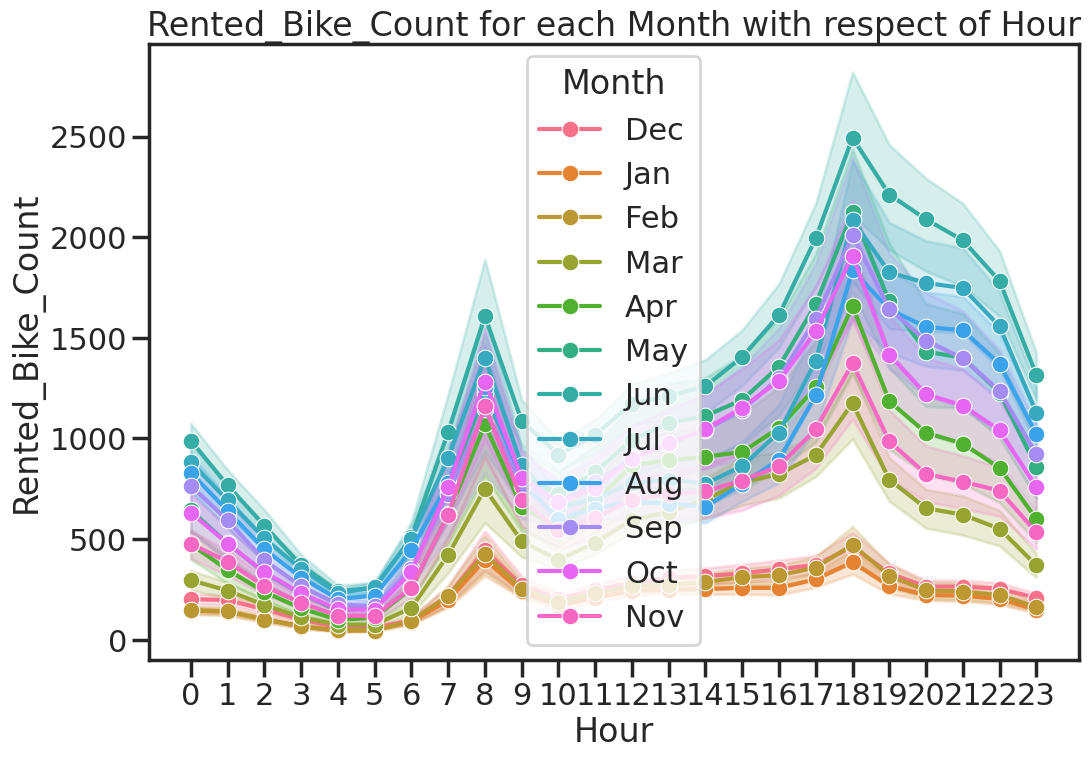

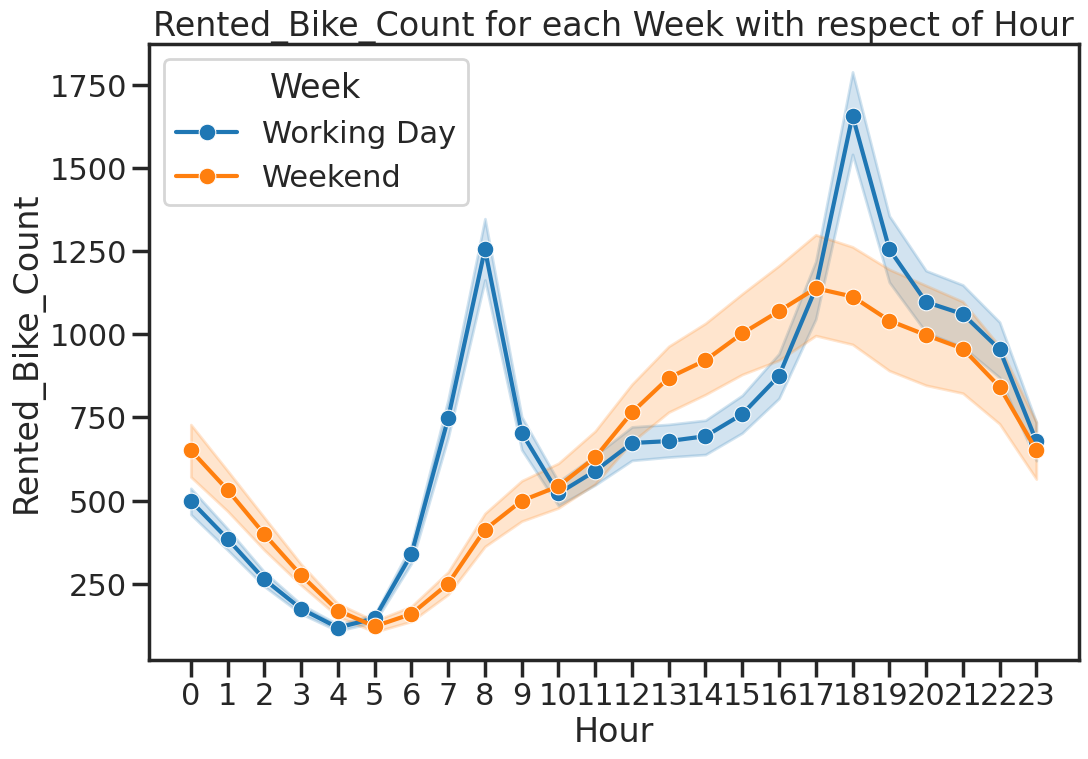

In [42]:
#analysing hour with bike demand with respect to different third value

for i in cat_features:
  if i in ['Hour','Time_Period','Functioning_Day']:
    pass
  else:
    plt.figure(figsize=(12,8))
    fig = sns.lineplot(x=df["Hour"],y=df['Rented_Bike_Count'],hue=df[i], marker ='o');
    plt.xticks(range(24));
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
  plt.show();

##### 1. Why did you pick the specific chart?

I pick lineplot for comparing different feature based on hue because i was comparing different features based on time.

##### 2. What is/are the insight(s) found from the chart?

Shows maximum demand around 8-9 and 18-20 irrespect of other features.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important to maintain demand based on the time to generate stable profit.

Based on time period if unable to maintain demand, it will create a chance of new competition.

#### Chart - 10 - Correlation Heatmap

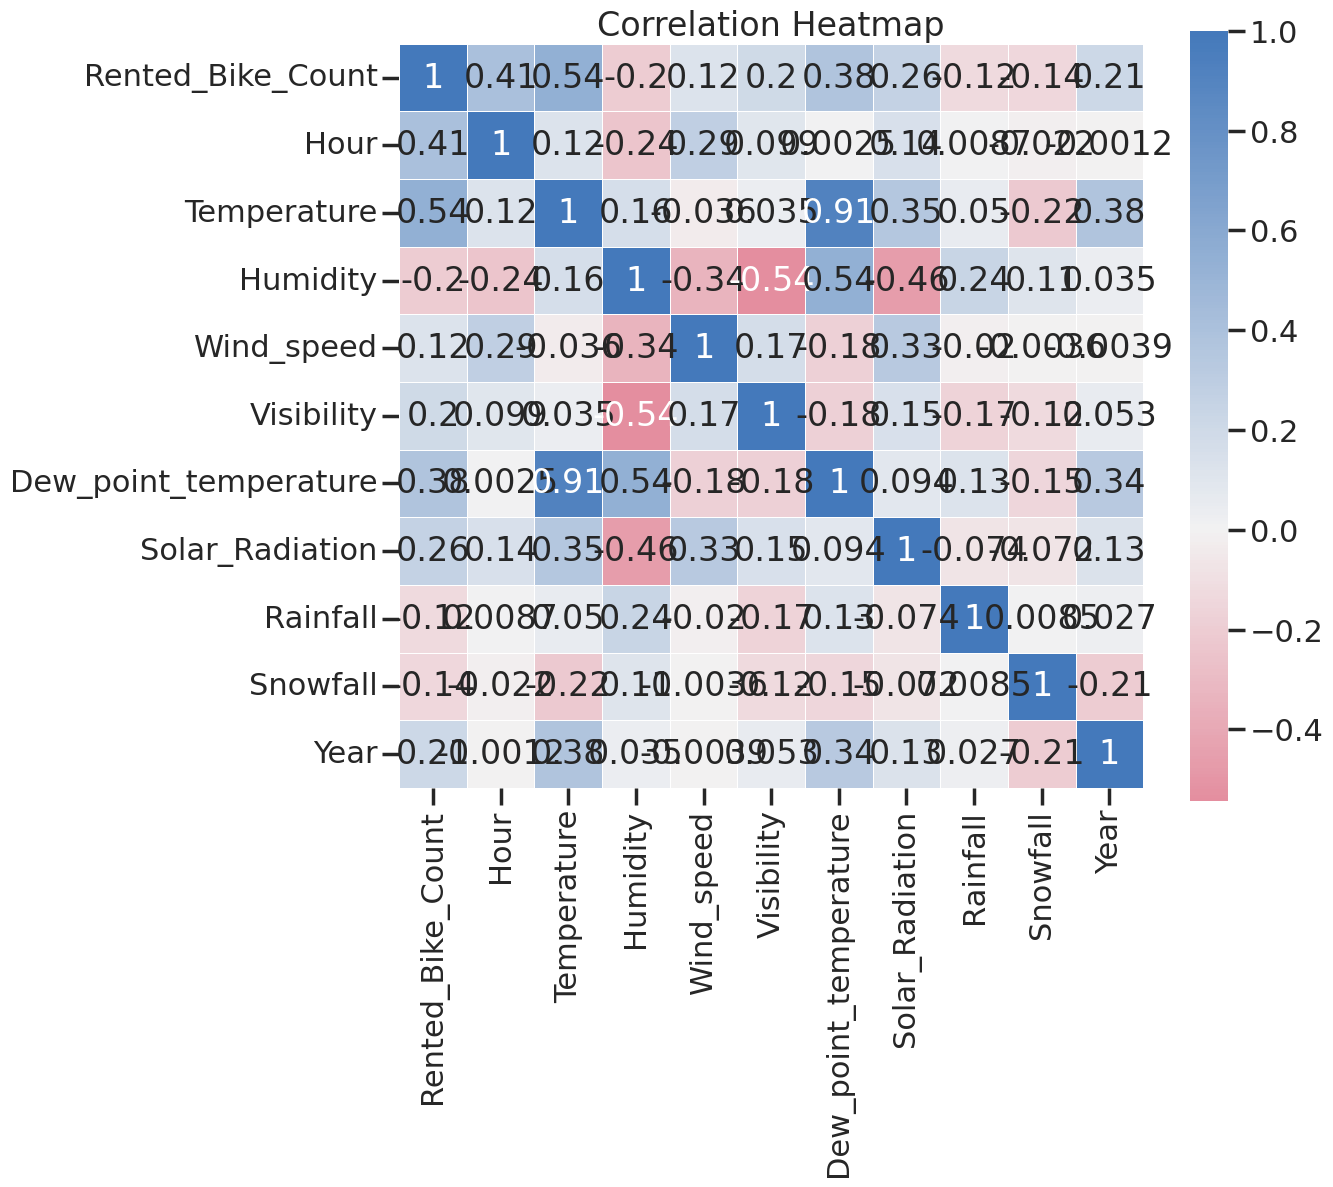

In [43]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Create a heatmap
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th", props=[("font-size", "7pt")]),
            dict(selector="td", props=[('padding', "0em 0em")]),
            dict(selector="th:hover", props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover", props=[('max-width', '200px'),
                                                      ('font-size', '12pt')])]

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=cmap, center=0, square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* Features like **Temperature(°C)** and **Dew point temperature(°C)** show **correlation** of **0.91** and in general, an **absolute correlation coefficient of > 0.7** among two or more predictors indicates the presence of **multicollinearity**.

> ⚡Note: If two variable or features show relationship either in same or opposite direction, then these variables thus show correlation between them.

* **Hour** and **temperature** show positive correlation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. There is no difference in the mean number of rented bikes between different hours of the day.
2. There is no relationship between temperature and the number of rented bikes.  
3. There is no difference in the mean number of rented bikes between different seasons.



### Hypothetical Statement - 1
---
There is no difference in the mean number of rented bikes between different hours of the day.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no difference in the mean number of rented bikes between different hours of the day.

* Alternative hypothesis: There is a difference in the mean number of rented bikes between different hours of the day.

* Test type : ANOVA test

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis_H0 = "There is no difference in the mean number of rented bikes \
                      between different hours of the day."
alternative_hypothesis_Ha = "There is a difference in the mean number of rented \
                      bikes between different hours of the day."
# Group the data by hour
data_by_hour = df.groupby('Hour')

# Calculate the mean number of rented bikes for each hour
means = data_by_hour['Rented_Bike_Count'].mean()

# Perform an ANOVA test to compare the means
F, p = stats.f_oneway(*[data_by_hour['Rented_Bike_Count'].get_group(hour) 
                        for hour in data_by_hour.groups])
# * operator before the list of groups passed to the f_oneway() function, 
# which specifies that the list should be treated as separate arguments rather than as a single argument

# Print the result of the test
print(f"F-statistic: {F:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05: #0.05 is significance threshold value to test 
   print(f"{alternative_hypothesis_Ha} (reject H0(Null Hypothesis))")
else:
   print(f"{null_hypothesis_H0} (fail to reject H0(Null Hypothesis))")

F-statistic: 156.612
p-value: 0.000
There is a difference in the mean number of rented                       bikes between different hours of the day. (reject H0(Null Hypothesis))


##### Which statistical test have you done to obtain P-Value?

I chose to use an analysis of variance (ANOVA) test for the hypotheses because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different. On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

This test is suitable for these hypotheses because they both involve comparing the mean values of a variable (the number of rented bikes) with different group (hours of the day).

### Hypothetical Statement - 2
---
There is no relationship between temperature and the number of rented bikes.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between temperature and the number of rented bikes.
* Alternative hypothesis: There is a relationship between temperature and the number of rented bikes.
* Test Type: Pearson correlation coefficient

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no relationship between temperature and the number of rented bikes."
alternative_hypothesis = "There is a relationship between temperature and the number of rented bikes."

# Calculate the correlation between temperature and the number of rented bikes
r, p = stats.pearsonr(df['Temperature'], df['Rented_Bike_Count'])

# Print the result of the test
print(f"Correlation coefficient: {r:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

Correlation coefficient: 0.538
p-value: 0.000
There is a relationship between temperature and the number of rented bikes. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation coefficient and the p-value to test the statistical significance of the relationship between the number of rented bikes and the temperature. Specifically, I used the pearsonr() function from the scipy.stats library to calculate the Pearson correlation coefficient and the p-value between the Temperature and Rented_Bike_Count columns of the data.

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient is a measure of the strength and direction of the linear relationship between two variables, and it takes on values between -1 and 1. A value of -1 indicates a strong negative linear relationship, a value of 0 indicates no linear relationship, and a value of 1 indicates a strong positive linear relationship.

I chose to use the Pearson correlation coefficient and p-value for this null hypothesis because they are suitable for testing the statistical significance of a linear relationship between two continuous variables. In this case, the Temperature column is a continuous variable that can take on any value within a certain range, and the Rented_Bike_Count column is also a continuous variable that can take on any integer value within a certain range.






### Hypothetical Statement - 3
---
There is no difference in the mean number of rented bikes between different seasons.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no difference in the mean number of rented bikes between different seasons.
* Alternative hypothesis: There is a difference in the mean number of rented bikes between different seasons.
* Test Type: ANOVA Test

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no difference in the mean number of rented bikes between different seasons."
alternative_hypothesis = "There is a difference in the mean number of rented bikes between different seasons."

# Group the data by season
data_by_season = df.groupby('Seasons')

# Calculate the mean number of rented bikes for each season
means = data_by_season['Rented_Bike_Count'].mean()

# Perform an ANOVA test to compare the means
F, p = stats.f_oneway(*[data_by_season['Rented_Bike_Count'].get_group(season)
                         for season in data_by_season.groups])
# Print the result of the test
print(f"F-statistic: {F:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

F-statistic: 775.832
p-value: 0.000
There is a difference in the mean number of rented bikes between different seasons. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I chose to use an analysis of variance (ANOVA) test for the hypotheses because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups. 

##### Why did you choose the specific statistical test?

This test is suitable for these hypotheses because they both involve comparing the mean values of a variable (the number of rented bikes) with different group (seasons).

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different. On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Day                      0
Month                    0
Year                     0
Week                     0
Time_Period              0
dtype: int64


<Axes: >

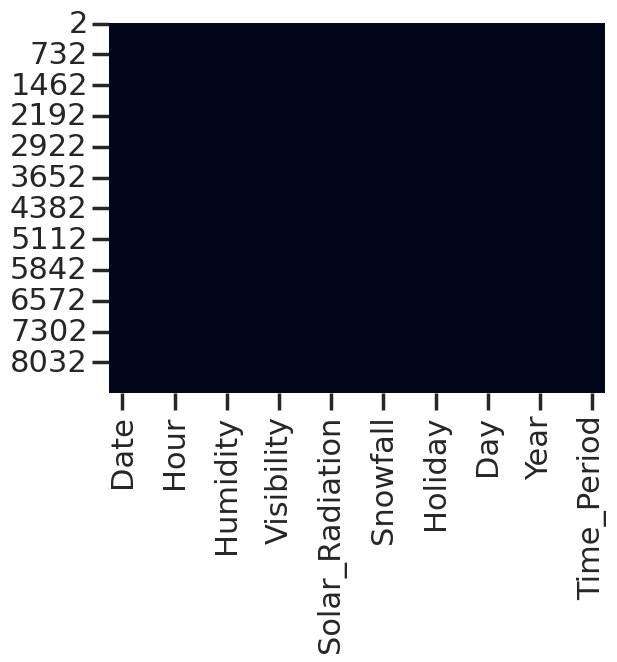

In [47]:

# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
# Assuming df is your DataFrame
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since, there were no missing values to handle in the given dataset no further manipulation was needed.

### 2. Handling Outliers

In [48]:

# Assuming df is your DataFrame
# Convert the 'Year' column to string type
df['Year'] = df['Year'].astype(str)

symmetric_feature = []
non_symmetric_feature = []

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Iterate through each numeric column
for i in numeric_cols:
    mean_val = df[i].mean()
    median_val = df[i].median()
    if abs(mean_val - median_val) < 0.2:
        symmetric_feature.append(i)
    else:
        non_symmetric_feature.append(i)

# Print the Symmetric Distributed Features
print("Symmetric Distributed Features: ", symmetric_feature)

# Print the Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features: ", non_symmetric_feature)



# Ignoring 'Rainfall' and 'Snowfall' due to sparsity (up to 75 percentile value is 0)
# and these outliers are needed for the model to learn.
# Ignoring the dependent variable as outliers in the dependent variable may be
# indicative of unusual or unexpected patterns in the data that could be of interest and should not be removed.

# Modify the symmetric and non-symmetric feature lists based on previous trials
# Example adjustments (ensure these indexes are correct based on your specific columns)
#symmetric_feature = symmetric_feature[:-2]  # Adjust based on actual list content
#if 'Rented_Bike_Count' in non_symmetric_feature:
  #  non_symmetric_feature.remove('Rented_Bike_Count')

# Print the updated lists
#print("Updated Symmetric Distributed Features: ", symmetric_feature)
#print("Updated Skew Symmetric Distributed Features: ", non_symmetric_feature)


Symmetric Distributed Features:  ['Rainfall', 'Snowfall']
Skew Symmetric Distributed Features:  ['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation']


In [49]:
# For Symmetric features defining upper and lower boundry(normally distributed using std and mean)
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [50]:
# Restricting/ capping the data to lower and upper boundry

for feature in symmetric_feature:
  #below lower value then value = lower value
  df.loc[df[feature]<= outlier_treatment(df=df,feature=feature)[1], feature]=outlier_treatment(df=df,feature=feature)[1]
  #above higher value, then value = higher value
  df.loc[df[feature]>= outlier_treatment(df=df,feature=feature)[0], feature]=outlier_treatment(df=df,feature=feature)[0]

In [51]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')
  return upper_bridge,lower_bridge

In [52]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

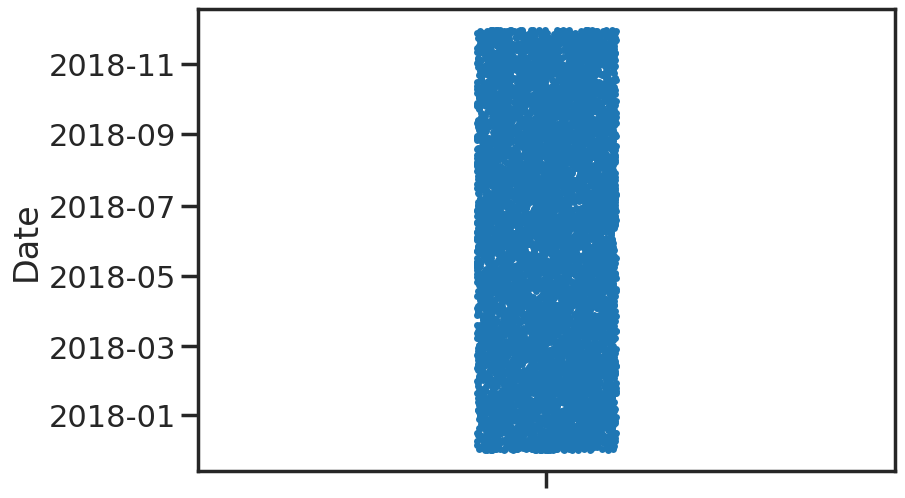

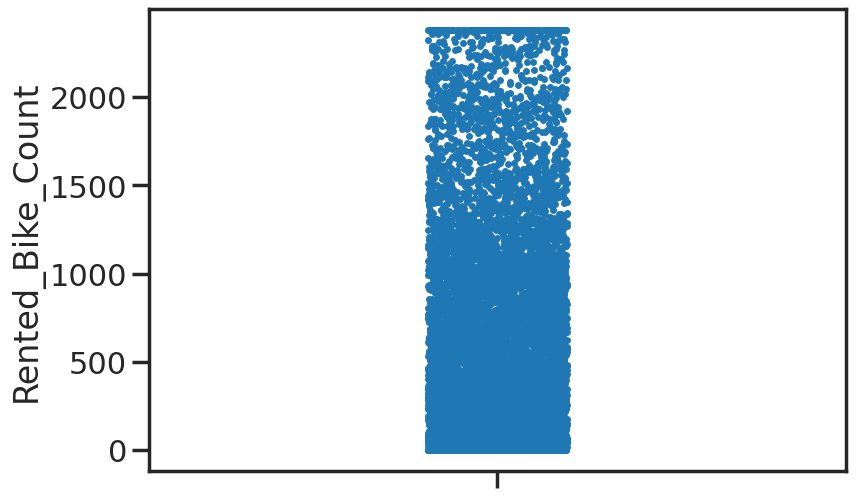

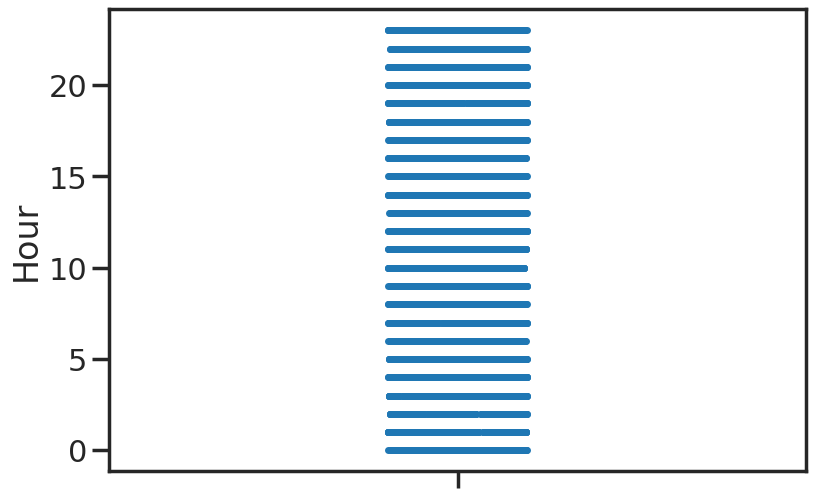

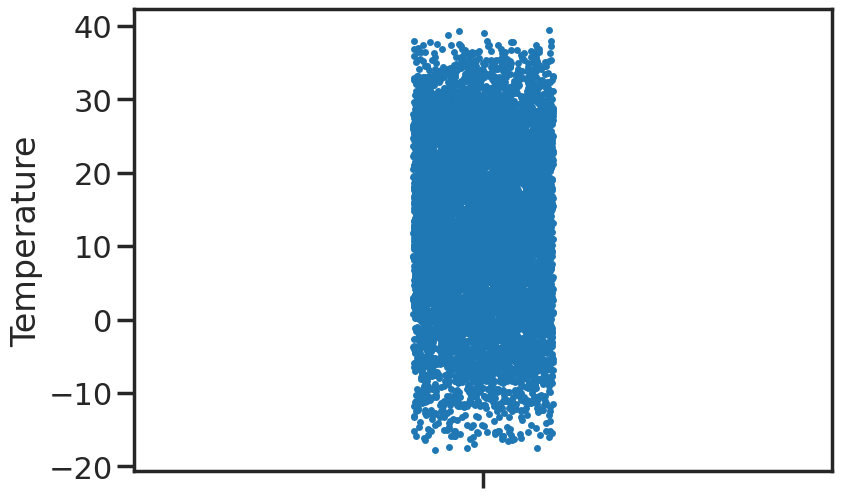

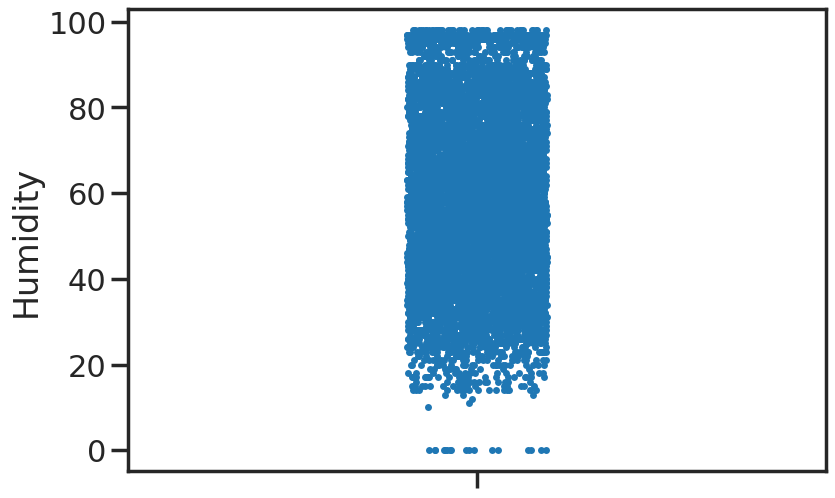

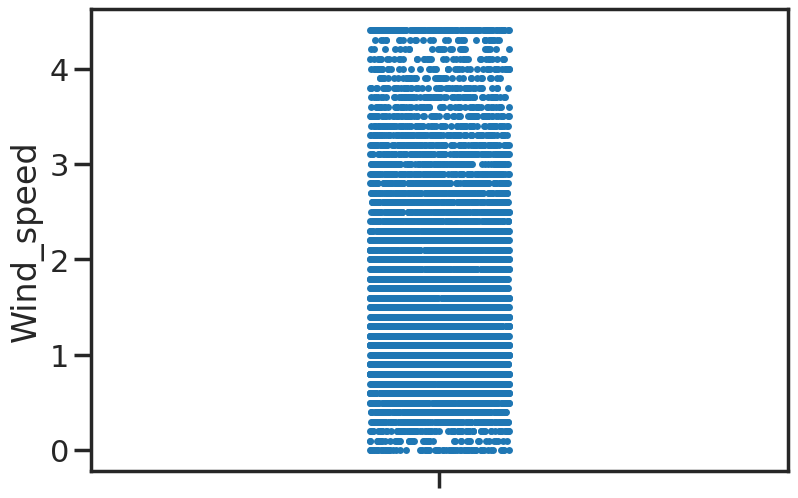

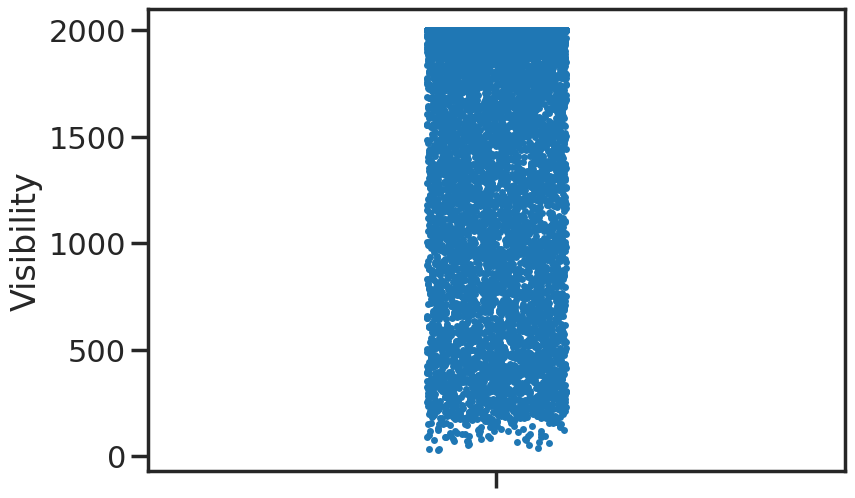

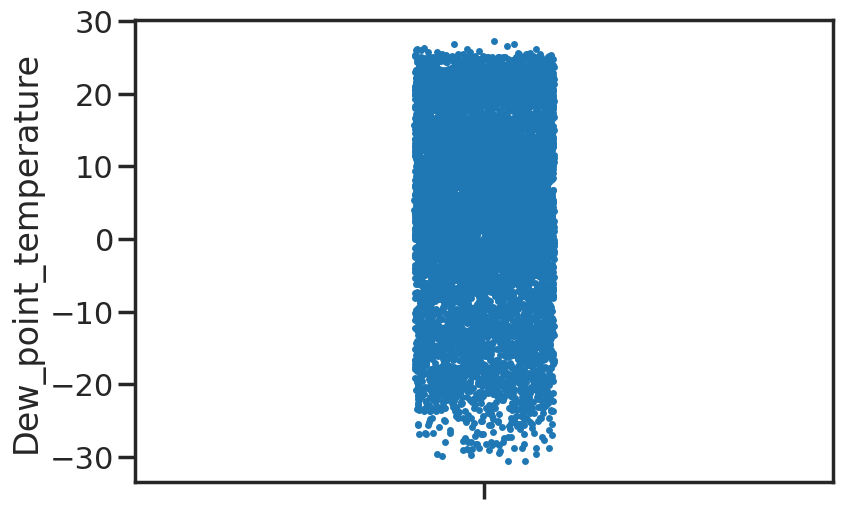

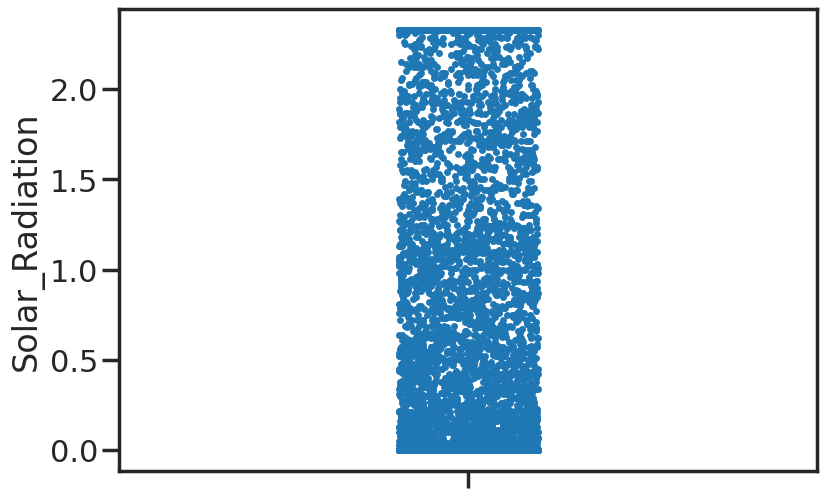

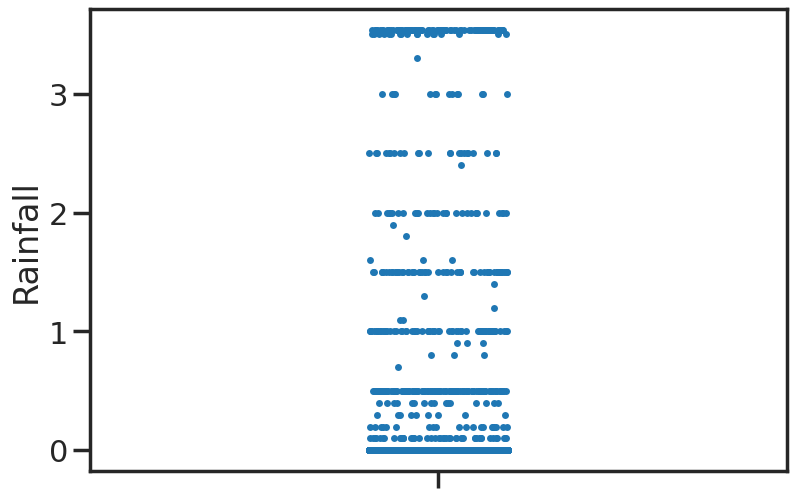

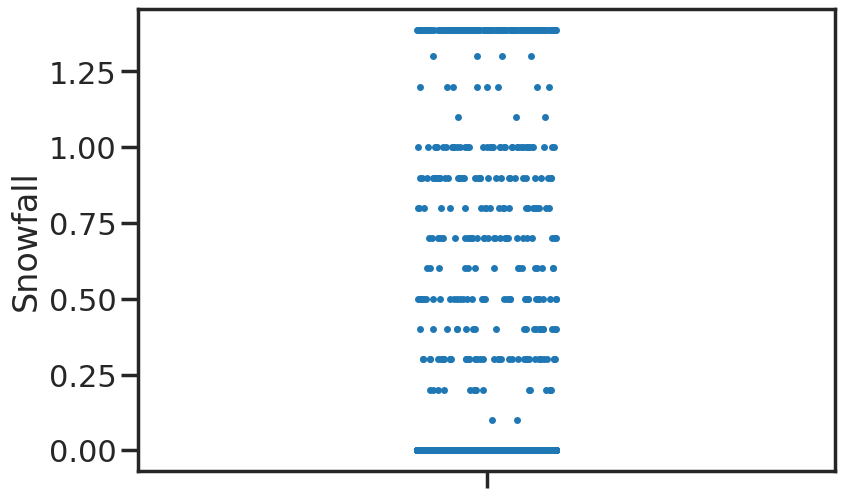

In [53]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns 
for col in df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

First I changed the Year column to sring as it shouldn't be treated as numerical column as there are only two type of values and should be treated as categorical column. Then I separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below. Then, I used capping method to change outliers into upper and lower limit instead of trimming where i could have just removed the entire data.

Another way to do it is dropping extreme values.

In a Gaussian distribution while it’s the symmetric curve and outlier are present. Then, we can set the boundary by taking standard deviation into action.

Identifying which columns in a dataset have a symmetric distribution can be useful because it can give you insight into the overall shape of the distribution of values in each column. For example, if a column has a symmetric distribution, it may be more likely to have a bell-shaped curve when plotted on a histogram. This can be useful to know because certain statistical techniques and machine learning algorithms assume that the data is normally distributed, and having a symmetric distribution is one indication that the data may be approximately normally distributed. On the other hand, if a column has a non-symmetric distribution, it may be more likely to be skewed in one direction or the other, which could affect the validity of certain statistical tests or the performance of certain machine learning models.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

* lower inner fence: Q1–1.5*IQ
* upper inner fence: Q3 + 1.5*IQ
* lower outer fence: Q1–3*IQ
* upper outer fence: Q3 + 3*IQ

### 3. Categorical Encoding

In [54]:
# Encode your categorical columns
cat_category = df.select_dtypes(include = 'object')
print(f'Categorial Features: {cat_category.columns.to_list()}')

Categorial Features: ['Seasons', 'Holiday', 'Functioning_Day', 'Day', 'Month', 'Year', 'Week', 'Time_Period']


In [55]:
for col in cat_category:
    print(df[col].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
['Dec' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov']
['2017' '2018']
['Working Day' 'Weekend']
['Morning' 'Afternoon' 'Night']


In [56]:
dff = df.copy()

In [57]:
dd = df.copy()

⚡ Deleting some extra features like 'Day','Time_period','Year' and 'Month' because day has been converted into working and weekends, timeperiod as keeping hour since it show good correlation, month because it is already shorten to seasons and year because it does not have much variation and there is less to learn from that.

In [58]:
#deleting extra feature 
dff.drop(columns = ['Day','Time_Period','Year','Month'], axis =1, inplace = True)

In [59]:
#applying encoding to categorial features

# dd = dd.apply(LabelEncoder().fit_transform)
dff = pd.get_dummies(dff, drop_first = True)
dff.head(1)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
2 2017-12-01             173.00  2.00        -6.00        39        1.00   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
2     2000.00                 -17.70             0.00      0.00      0.00   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
2           False           False            True                True   

   Functioning_Day_Yes  Week_Working Day  
2                 True              True

In [60]:
dff.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
2 2017-12-01             173.00  2.00        -6.00        39        1.00   
3 2017-12-01             107.00  3.00        -6.20        40        0.90   
4 2017-12-01              78.00  4.00        -6.00        36        2.30   
5 2017-12-01             100.00  5.00        -6.40        37        1.50   
6 2017-12-01             181.00  6.00        -6.60        35        1.30   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
2     2000.00                 -17.70             0.00      0.00      0.00   
3     2000.00                 -17.60             0.00      0.00      0.00   
4     2000.00                 -18.60             0.00      0.00      0.00   
5     2000.00                 -18.70             0.00      0.00      0.00   
6     2000.00                 -19.50             0.00      0.00      0.00   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
2           False           False            True                True   
3           False           False            True                True   
4           False           False            True                True   
5           False           False            True                True   
6           False           False            True                True   

   Functioning_Day_Yes  Week_Working Day  
2                 True              True  
3                 True              True  
4                 True              True  
5                 True              True  
6                 True              True

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since there were not much of different unique categories in each categorial feature, I used one hot encoding using labelencoder function which simply converts each feature into 0 and 1.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

* Absolute humidity is the mass of water vapor in a given volume of air, while relative humidity is the percentage of water vapor in the air compared to the maximum amount of water vapor that the air can hold at a particular temperature.

* Hence using the two column temperature and dewpoint calculating absolute humidity, as a new feature as both of them were showing high correlation.

In [61]:
#creating function to use dew point and temperature to calculate absolute humidity
import math

def absolute_humidity(df, temperature_column, dew_point_column):
  # constants
  a = 17.27
  b = 237.7
  
  # create a new column for absolute humidity
  df['Absolute_Humidity'] = None
  
  # iterate over the rows of the DataFrame
  for index, row in df.iterrows():
    temperature = row[temperature_column]
    dew_point = row[dew_point_column]
    
    # check for dew point equal to or higher than temperature
    if dew_point >= temperature:
      # set absolute humidity to zero to prevent division by zero
      df.at[index, 'Absolute_Humidity'] = 0.0
    else:
      # calculate saturation vapor pressure
      svp = (a * dew_point) / (b + dew_point)
      
      # check for temperature equal to zero
      if temperature == 0:
        # set absolute humidity to zero to prevent division by zero
        df.at[index, 'Absolute_Humidity'] = 0.0
      else:
        # calculate absolute humidity
        ah = 6.112 * svp * math.exp((a * temperature) / (b + temperature)) / temperature
        
        # store the absolute humidity in the new column
        df.at[index, 'Absolute_Humidity'] = ah
    
  return df


In [62]:
#calling function
dff = absolute_humidity(dff, 'Temperature', 'Dew_point_temperature')
# dd = absolute_humidity(dd, 'Temperature', 'Dew_point_temperature')

⚡ When dummies are used for creating new feature they get data type of uint8 which means it is an unsigned integer which is a non-negative integer that can hold only positive values and zero. The range of values that an uint8 type can represent is from 0 to 255.

In [63]:
# u8 = dff.select_dtypes(include = 'uint8')

In [64]:
#changing data type as there was an error while using isinf
dff['Absolute_Humidity'] = dff.Absolute_Humidity.astype('int')
# dd['Absolute_Humidity'] = dd.Absolute_Humidity.astype('int')

In [65]:
dff.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
2 2017-12-01             173.00  2.00        -6.00        39        1.00   
3 2017-12-01             107.00  3.00        -6.20        40        0.90   
4 2017-12-01              78.00  4.00        -6.00        36        2.30   
5 2017-12-01             100.00  5.00        -6.40        37        1.50   
6 2017-12-01             181.00  6.00        -6.60        35        1.30   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
2     2000.00                 -17.70             0.00      0.00      0.00   
3     2000.00                 -17.60             0.00      0.00      0.00   
4     2000.00                 -18.60             0.00      0.00      0.00   
5     2000.00                 -18.70             0.00      0.00      0.00   
6     2000.00                 -19.50             0.00      0.00      0.00   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
2           False           False            True                True   
3           False           False            True                True   
4           False           False            True                True   
5           False           False            True                True   
6           False           False            True                True   

   Functioning_Day_Yes  Week_Working Day  Absolute_Humidity  
2                 True              True                  0  
3                 True              True                  0  
4                 True              True                  0  
5                 True              True                  0  
6                 True              True                  0

In [66]:
dff.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'Week_Working Day', 'Absolute_Humidity'],
      dtype='object')

⚡ Dropping values when there is no functioning day, because there are no bike rented. Secondly because it can cause overfitting as it will act as extra feature but due to less variation will not help model to learn. Thirdly when checked in later, this column was removed leaving rented bike count as zero so there will be no relation why there will be zero rented bike.

In [68]:
dff = dff.drop(dff[dff['Functioning_Day_Yes'] == 0].index)
# dd = dd.drop(dd[dd['Functioning_Day'] == 0].index)

In [69]:
#deleting extra feature 
dff.drop(columns = ['Functioning_Day_Yes'], axis =1, inplace = True)

#### 2. Feature Selection

#####Feature selection by removing columns from a dataset that have a low variance

In [70]:
# Select your features wisely to avoid overfitting
# Checking the shape of dataset
# dff.shape
dd.shape

(8758, 19)

In [71]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
    from sklearn.feature_selection import VarianceThreshold
    import pandas as pd

    # Exclude columns with datetime64 dtype
    data_non_datetime = data.select_dtypes(exclude=['datetime64','object'])

    # Apply VarianceThreshold
    var_thres = VarianceThreshold(threshold=0.05)
    var_thres.fit(data_non_datetime)
    
    # Identify columns to drop
    concol = [column for column in data_non_datetime.columns 
              if column not in data_non_datetime.columns[var_thres.get_support()]] #var_thres.get_support() return boolean values on checking condition
    
    print(f'Columns dropped: {concol}')
    
    # Drop the identified columns
    df_removed_var = data.drop(concol, axis=1)
    
    return df_removed_var 

In [72]:
# Calling the function
df_removed_var=dropping_constant(dff)
# df_removed_var=dropping_constant(dd)

Columns dropped: ['Holiday_No Holiday']


In [73]:
# Checking the shape after feature dropped
df_removed_var.shape

(8463, 16)

In [74]:

# Assuming df_removed_var is your DataFrame after dropping constant features
corr = df_removed_var.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

styled_corr = corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magnify")\
    .format(precision=2)\
    .set_table_styles(magnify())

styled_corr


#####Multicolinearity

**VIF**

---
* Calculating vif identify the strength of correlation between independent variable and the strength of that correlation.

* Vif starts at 1 and has no upper limit.

* 1-5 : Moderate, No corrective measure

* Greater than 5: Severe, Coefficient and p-value are questionable


---
* Since we already saw in correlation matrix that there are high correlation between temperature and dew point temperature, either deleting or adding up column to make new feature will work to deal with this multicolinearity.

Therefore first calculating variance inflation factor(VIF).


In [75]:
# Manipulate Features to minimize feature correlation
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
# calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

In [76]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Assuming dff is your DataFrame

# Drop any rows with NaN values
dff = dff.dropna()

# Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()
for column in dff.columns:
    if dff[column].dtype == 'object':
        dff[column] = le.fit_transform(dff[column])

# Ensure all columns are numeric
numeric_dff = dff.select_dtypes(include=[np.number])

# Check for any non-finite values (inf or -inf) and handle them
numeric_dff = numeric_dff.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate VIF for each feature
X = numeric_dff
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

print(vif_data)


                  feature   VIF
0       Rented_Bike_Count  5.01
1                    Hour  5.24
2             Temperature 36.48
3                Humidity  5.69
4              Wind_speed  5.04
5              Visibility  9.17
6   Dew_point_temperature 17.55
7         Solar_Radiation  2.98
8                Rainfall  1.25
9                Snowfall  1.18
10      Absolute_Humidity  1.02


In [77]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

In [78]:
correlation(df_removed_var,0.6)

['Dew_point_temperature', 'Seasons_Summer', 'Seasons_Winter']

In [79]:
# Getting multicolinear columns and dropping them 
highly_correlated_columns=correlation(df_removed_var,0.6)

  
df_removed=df_removed_var.drop(highly_correlated_columns,axis=1)
df_removed.shape

(8463, 13)

In [80]:
import pandas as pd
import seaborn as sns

# Assuming df_removed_var is your DataFrame after dropping constant features
corr = df_removed_var.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

styled_corr = corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magnify")\
    .format(precision=2)\
    .set_table_styles(magnify())

styled_corr


In [81]:
#dropped humidity as created new feature
# df_removed = df_removed.drop(columns = ['Humidity'], axis =1)
# df_removed = df_removed.drop(columns = ['Humidity','Year'], axis =1)

In [82]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Assuming dff is your DataFrame
dff = dff.dropna()

# Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()
for column in dff.columns:
    if dff[column].dtype == 'object':
        dff[column] = le.fit_transform(dff[column])

# Ensure all columns are numeric
numeric_dff = dff.select_dtypes(include=[np.number])

# Check for any non-finite values (inf or -inf) and handle them
numeric_dff = numeric_dff.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate VIF for each feature
X = numeric_dff
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Print features with VIF >= 8
print(vif_data[vif_data["VIF"] >= 8]["feature"])


2              Temperature
5               Visibility
6    Dew_point_temperature
Name: feature, dtype: object


In [83]:


def calc_vif(df):
    # Ensure all columns are numeric
    numeric_df = df.select_dtypes(include=[np.number])

    # Handle infinite values by replacing them with NaN and then dropping those rows
    numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan).dropna()

    # Initialize the DataFrame to store VIF values
    vif = pd.DataFrame()
    vif["variables"] = numeric_df.columns

    # Calculate VIF for each feature
    vif["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

    return vif

# Assuming df_removed is your DataFrame after removing low variance features
vif_df = calc_vif(df_removed_var[[i for i in df_removed_var.describe().columns if i not in ['Rented_Bike_Count']]])
print(vif_df)


               variables   VIF
0                   Hour  4.42
1            Temperature 33.25
2               Humidity  5.59
3             Wind_speed  5.03
4             Visibility  9.14
5  Dew_point_temperature 17.36
6        Solar_Radiation  2.95
7               Rainfall  1.18
8               Snowfall  1.18
9      Absolute_Humidity  1.02


In [84]:
# After Feature Selection checking the shape left with
df_removed.shape

(8463, 13)

##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF. 

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8. 

##### Which all features you found important and why?

In [85]:
df_removed.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons_Spring', 'Week_Working Day', 'Absolute_Humidity'],
      dtype='object')

In [86]:
df_removed.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
2 2017-12-01             173.00  2.00        -6.00        39        1.00   
3 2017-12-01             107.00  3.00        -6.20        40        0.90   
4 2017-12-01              78.00  4.00        -6.00        36        2.30   
5 2017-12-01             100.00  5.00        -6.40        37        1.50   
6 2017-12-01             181.00  6.00        -6.60        35        1.30   

   Visibility  Solar_Radiation  Rainfall  Snowfall  Seasons_Spring  \
2     2000.00             0.00      0.00      0.00           False   
3     2000.00             0.00      0.00      0.00           False   
4     2000.00             0.00      0.00      0.00           False   
5     2000.00             0.00      0.00      0.00           False   
6     2000.00             0.00      0.00      0.00           False   

   Week_Working Day  Absolute_Humidity  
2              True                  0  
3              True                  0  
4              True                  0  
5              True                  0  
6              True                  0

In [87]:
df_removed.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons_Spring', 'Week_Working Day', 'Absolute_Humidity'],
      dtype='object')

In [88]:
# df_removed['Date']

In [89]:
import pandas as pd
from xgboost import XGBRegressor

def preprocess_datetime_columns(data):
    # Convert datetime columns to numerical representations
    for column in data.select_dtypes(include=['datetime64']).columns:
        data[column + '_year'] = data[column].dt.year
        data[column + '_month'] = data[column].dt.month
        data[column + '_day'] = data[column].dt.day
        # data[column + '_hour'] = data[column].dt.hour
        # data[column + '_minute'] = data[column].dt.minute
        # data[column + '_second'] = data[column].dt.second
        data = data.drop(column, axis=1)
    return data

def randomforest_embedded(x, y):
    # Preprocess datetime columns in the feature set
    x = preprocess_datetime_columns(x)
    
    # Create the XGBRegressor
    model = XGBRegressor(objective='reg:squarederror')
    
    # Fit the model
    model.fit(x, y)
    
    # Get the importance of the resulting features
    importances = model.feature_importances_
    
    # Create a DataFrame for visualization
    final_df = pd.DataFrame({"Features": x.columns, "Importances": importances})
    final_df.set_index('Importances', inplace=True)
    
    # Sort in ascending order for better visualization
    final_df = final_df.sort_values('Importances')
    
    return final_df


In [90]:
pd.options.display.float_format = "{:.5f}".format
randomforest_embedded(x=df_removed.drop(["Rented_Bike_Count"],axis=1),y=df_removed["Rented_Bike_Count"])
     

Features
Importances                   
0.00479             Wind_speed
0.00484             Visibility
0.00764               Date_day
0.01037               Snowfall
0.01714      Absolute_Humidity
0.03453         Seasons_Spring
0.04067             Date_month
0.05651               Humidity
0.07629        Solar_Radiation
0.10578       Week_Working Day
0.13126              Date_year
0.15150                   Hour
0.16351            Temperature
0.19517               Rainfall

In [91]:
pd.options.display.float_format = "{:.2f}".format

I found 10 feature to be important as they were having low VIF and does not show multicollinearity. However, when checking using embedded method using XGBRegressor found none of them had exact 0 importance value which means each feature had atleast some importance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [92]:
symmetric_feature = []
non_symmetric_feature = []

# Select only numerical columns for evaluation
numerical_columns = df_removed.select_dtypes(include=['number']).columns

for i in numerical_columns:
    if abs(df_removed[i].mean() - df_removed[i].median()) < 0.1:
        symmetric_feature.append(i)
    else:
        non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -", symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -", non_symmetric_feature)


Symmetric Distributed Features : - ['Rainfall', 'Snowfall']
Skew Symmetric Distributed Features : - ['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Absolute_Humidity']


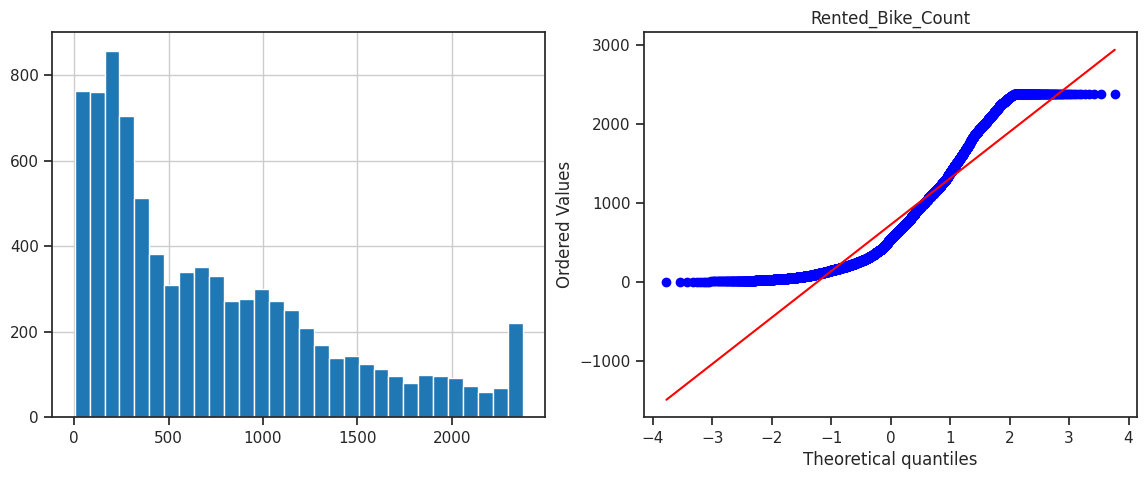

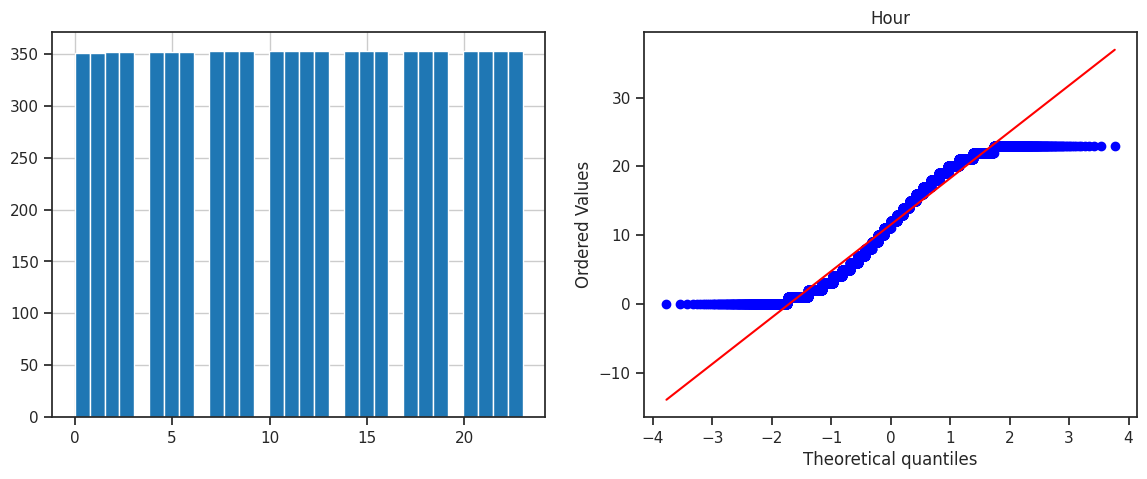

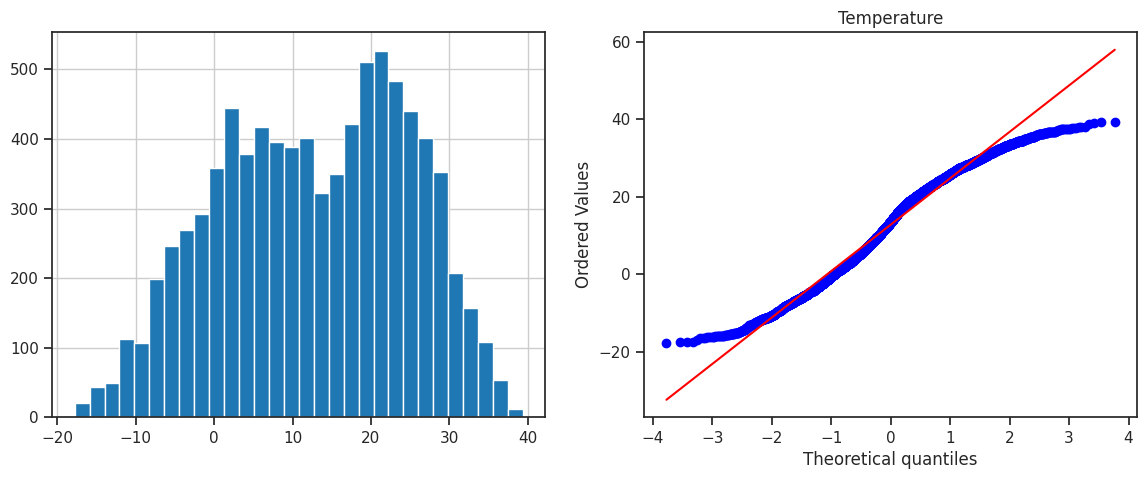

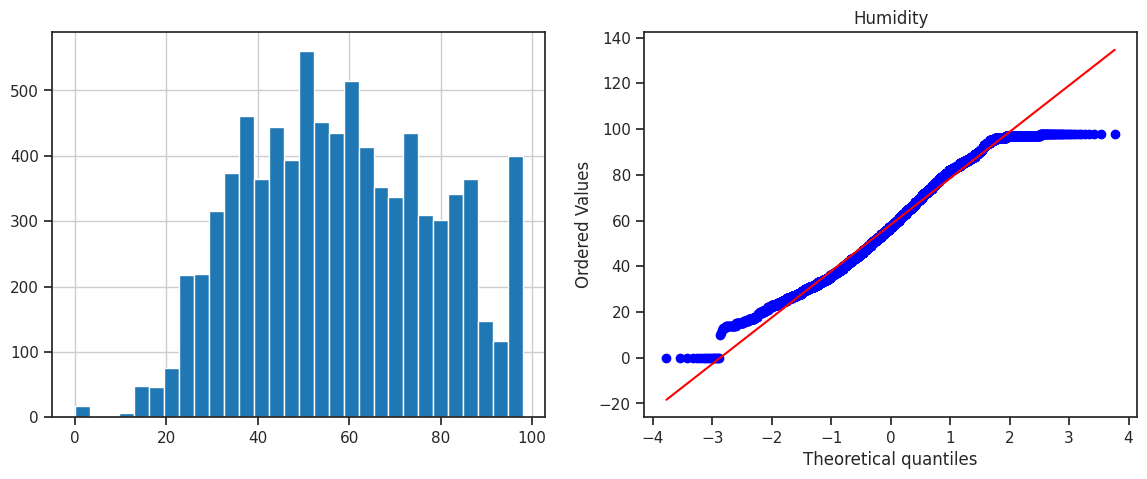

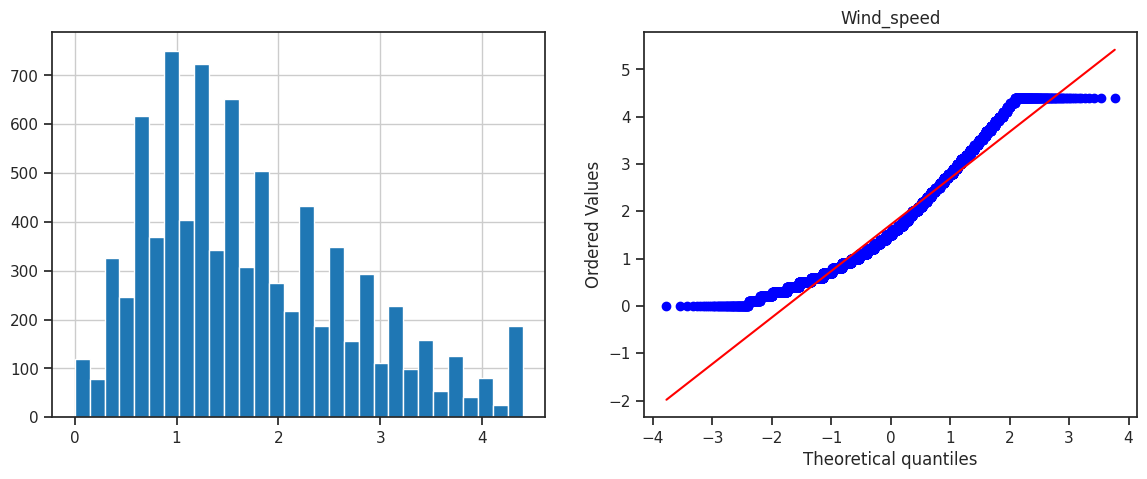

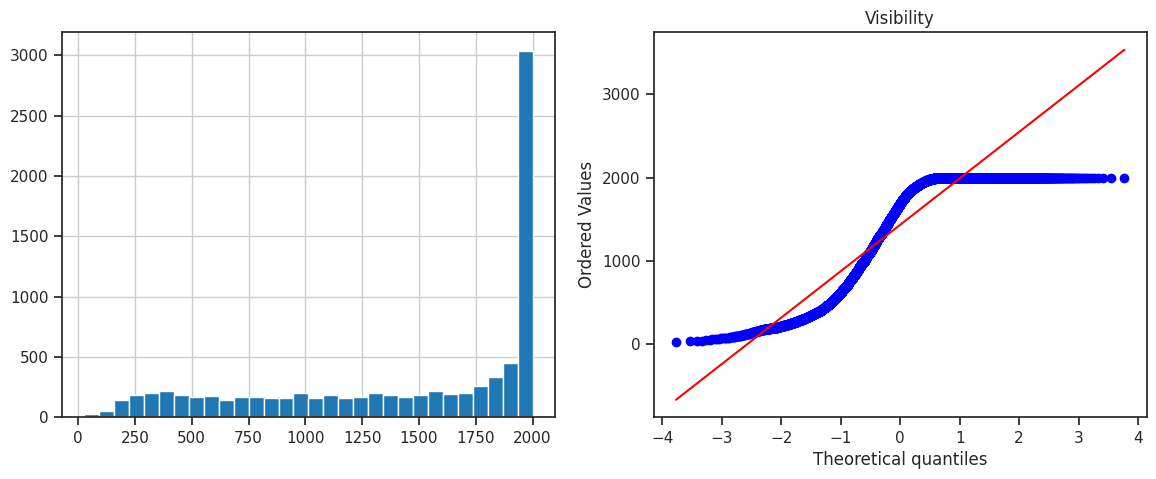

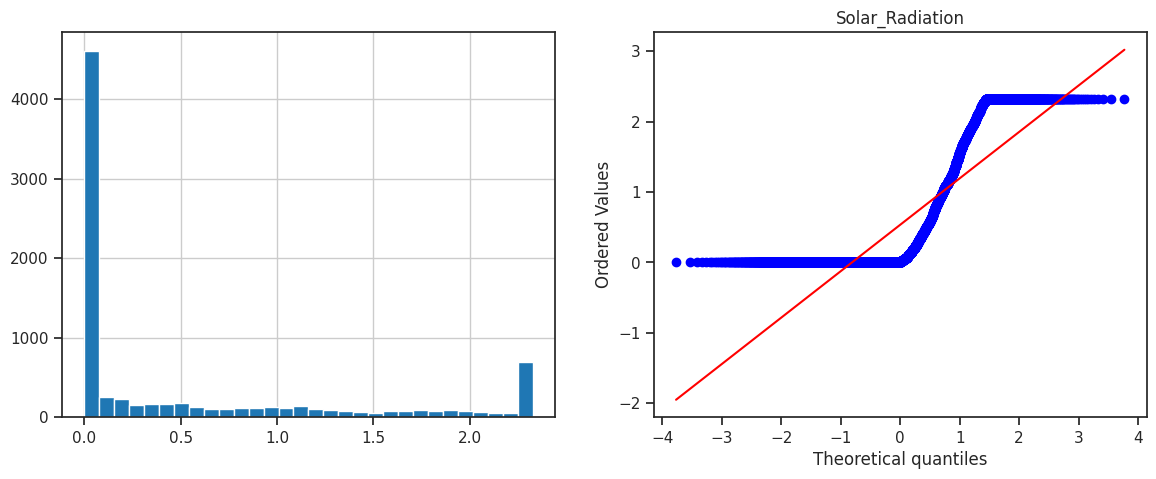

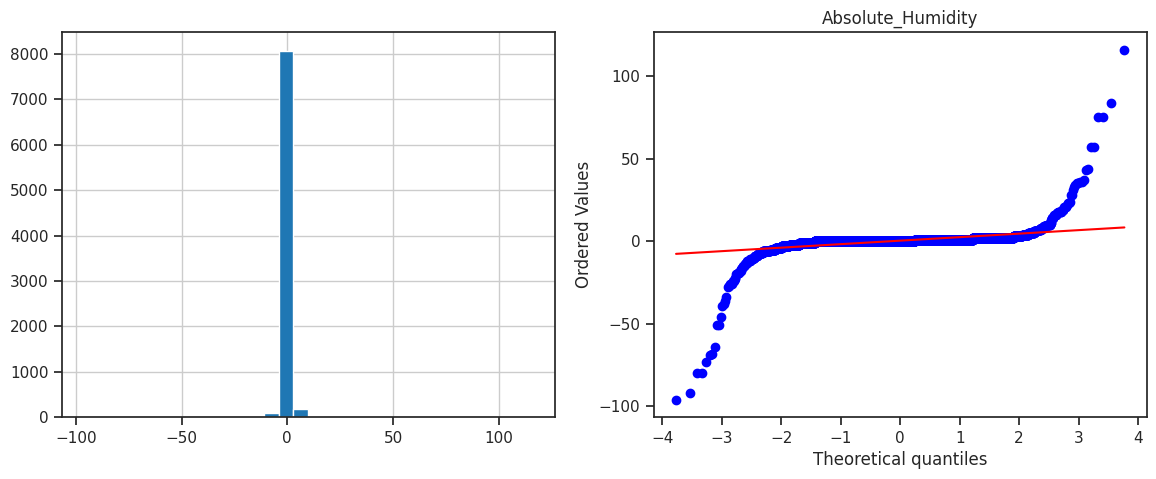

In [93]:
#vizualization 
for variable in non_symmetric_feature:
  sns.set_context('notebook')
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df_removed[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df_removed[variable], dist='norm',plot=plt)
  plt.title(variable)
  plt.show()
  print('='*120)

⚡ Since applying transformation on dependent variable rented bike count, it may affect the interpretability of the model. For example, if applied a log transformation to the dependent variable, the coefficients of the model will be interpreted in terms of the log scale, rather than the original scale. 

In [94]:
# Transform Your data
df_removed['Wind_speed']=np.cbrt(df_removed['Wind_speed'])
df_removed['Rented_Bike_Count']=np.sqrt(df_removed['Rented_Bike_Count'])

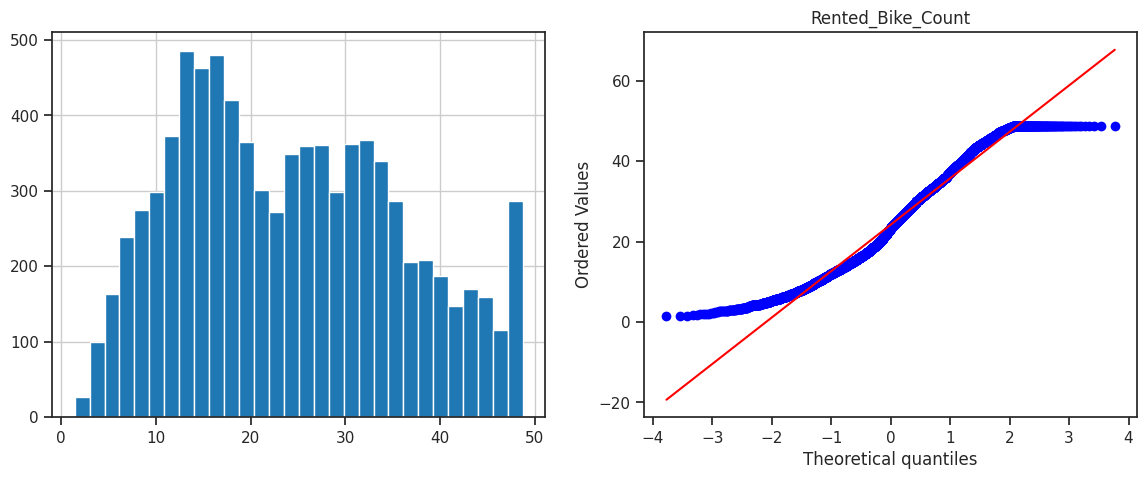

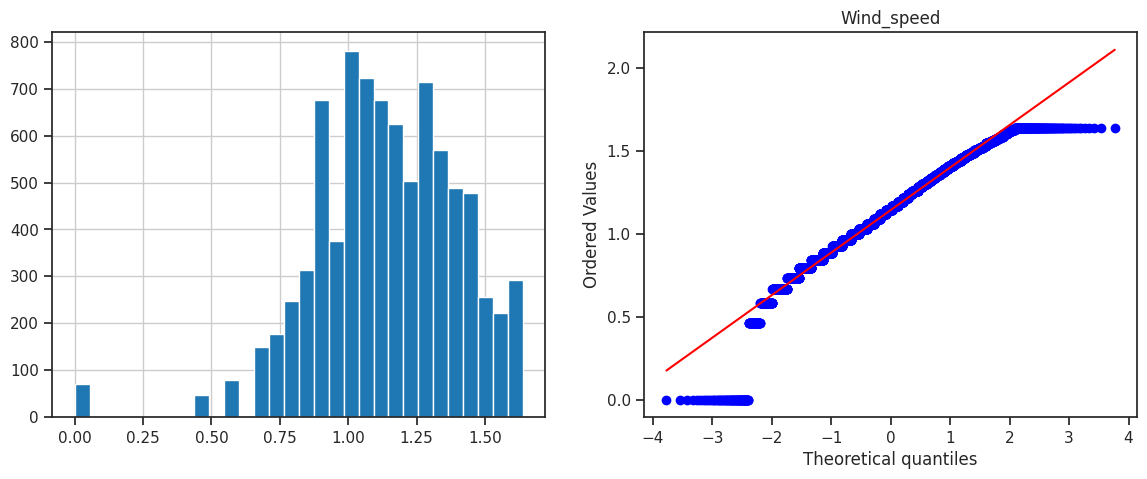

In [95]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in non_symmetric_feature:
  # if (col == 'Wind_speed'):
  if (col == 'Wind_speed') | (col == 'Rented_Bike_Count'):
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
    df_removed[col].hist(bins=30)

    ##QQ plot
    plt.subplot(1,2,2)
    stats.probplot(df_removed[col], dist='norm',plot=plt)
    plt.title(col)
    plt.show()

Transformed windspeed using cube root and rented bike count with square root and no other transformation required, as for some non symmetric methods when transformation was applied some changed from right to left skewed, hence ignoring transformation.

The purpose of transformation is to convert the values of the dataset's numeric columns to a standard scale without distorting the distinctions between different value ranges or omitting crucial details. Transformation can be achieved using different techniques i.e., either taking log, square root or cuberoot for the value.

* square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

* log for greater skew: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

* inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

* Linearity and heteroscedasticity: First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

### 6. Data Scaling

In [96]:
df_removed.Hour = df_removed.Hour.astype('int')

In [97]:
# Scaling your data
# Checking the data
df_removed.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
2 2017-12-01              13.15     2        -6.00        39        1.00   
3 2017-12-01              10.34     3        -6.20        40        0.97   
4 2017-12-01               8.83     4        -6.00        36        1.32   
5 2017-12-01              10.00     5        -6.40        37        1.14   
6 2017-12-01              13.45     6        -6.60        35        1.09   

   Visibility  Solar_Radiation  Rainfall  Snowfall  Seasons_Spring  \
2     2000.00             0.00      0.00      0.00           False   
3     2000.00             0.00      0.00      0.00           False   
4     2000.00             0.00      0.00      0.00           False   
5     2000.00             0.00      0.00      0.00           False   
6     2000.00             0.00      0.00      0.00           False   

   Week_Working Day  Absolute_Humidity  
2              True                  0  
3              True                  0  
4              True                  0  
5              True                  0  
6              True                  0

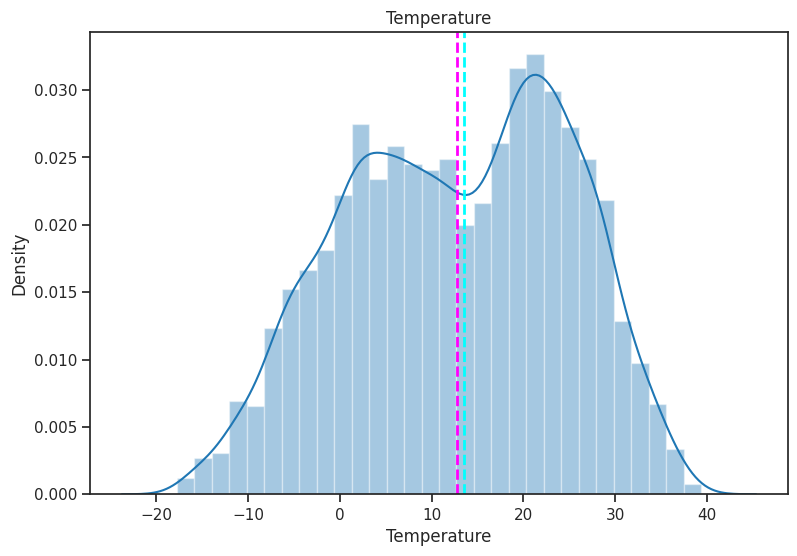

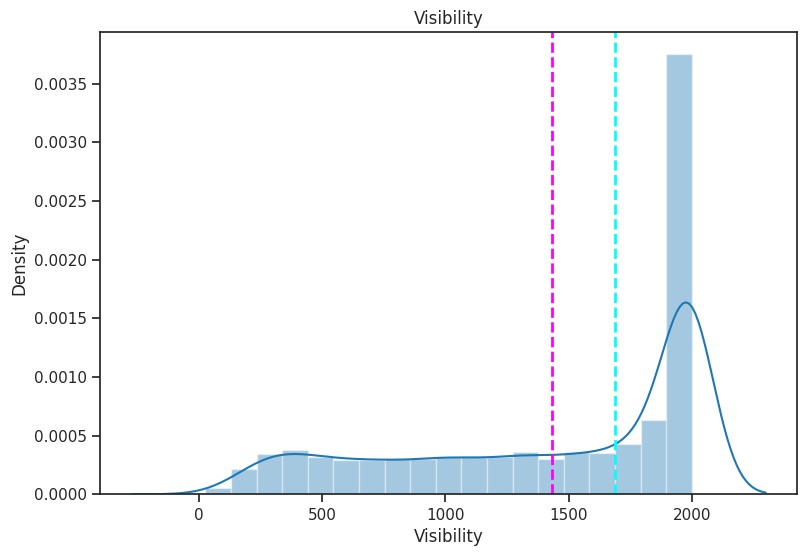

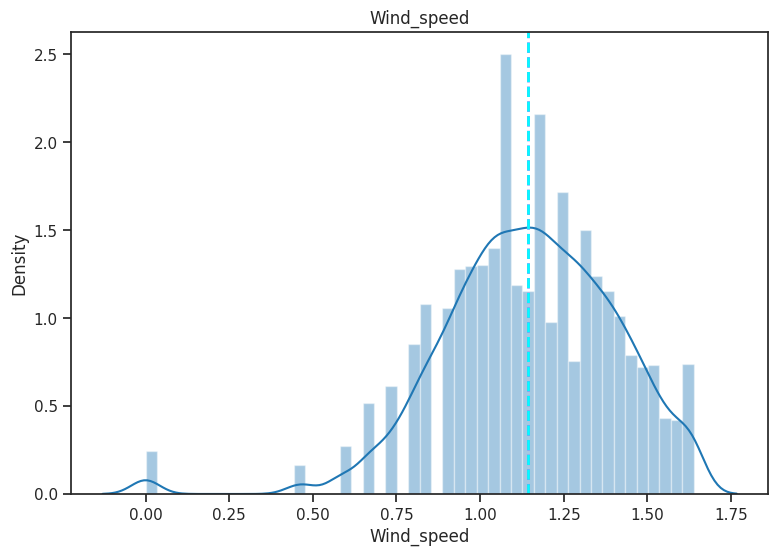

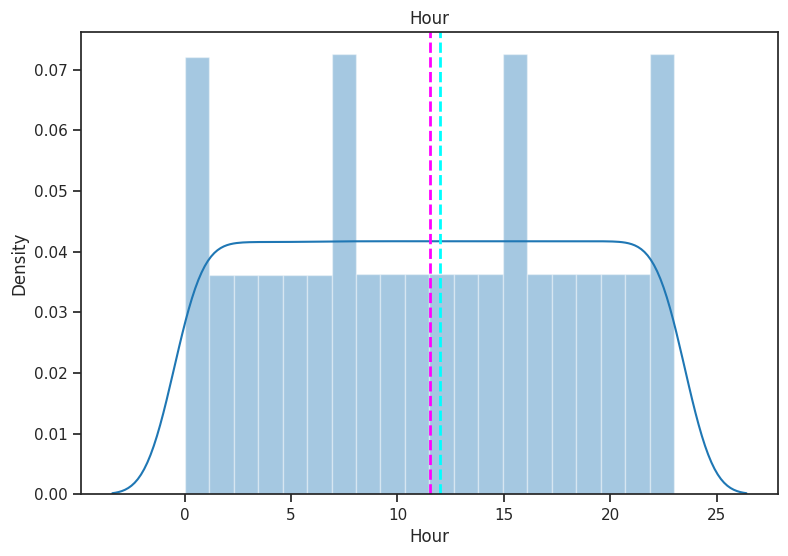

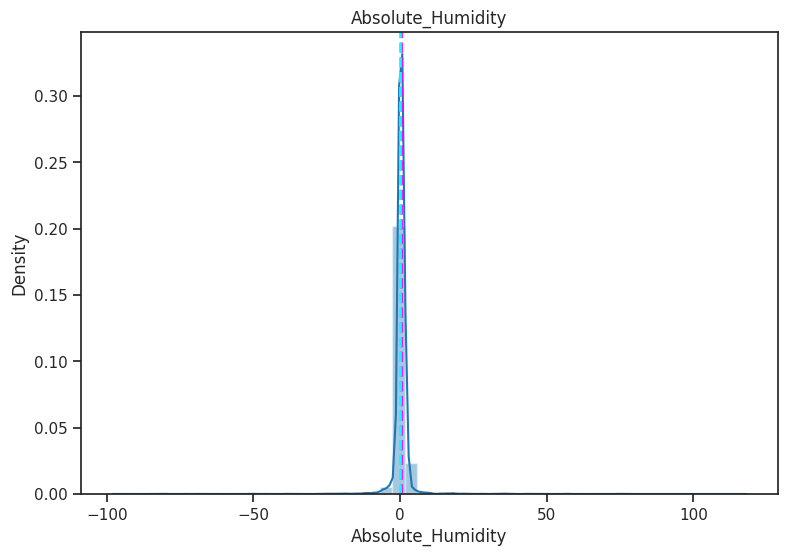

In [98]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in ['Temperature','Visibility','Wind_speed','Hour','Absolute_Humidity']:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()

##### Which method have you used to scale you data and why?

In [99]:
df_r = df_removed.copy()

In [100]:
#Transformation
for col in non_symmetric_feature:
  if col == 'Rented_Bike_Count':
    pass
  elif col == 'Wind_speed':
    df_r[col] = StandardScaler().fit_transform(df_r[col].values.reshape(-1, 1))
  else:
    df_r[col] = MinMaxScaler().fit_transform(df_r[col].values.reshape(-1, 1))

In [101]:
df_r.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
2 2017-12-01              13.15  0.09         0.21      0.40       -0.55   
3 2017-12-01              10.34  0.13         0.20      0.41       -0.68   
4 2017-12-01               8.83  0.17         0.21      0.37        0.68   
5 2017-12-01              10.00  0.22         0.20      0.38        0.00   
6 2017-12-01              13.45  0.26         0.20      0.36       -0.20   

   Visibility  Solar_Radiation  Rainfall  Snowfall  Seasons_Spring  \
2        1.00             0.00      0.00      0.00           False   
3        1.00             0.00      0.00      0.00           False   
4        1.00             0.00      0.00      0.00           False   
5        1.00             0.00      0.00      0.00           False   
6        1.00             0.00      0.00      0.00           False   

   Week_Working Day  Absolute_Humidity  
2              True               0.45  
3              True               0.45  
4              True               0.45  
5              True               0.45  
6              True               0.45

When we are using an algorithm that assumes your features have a similar range, we should use feature scaling.

If the ranges of features differ much then we should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then we can leave them as it's. However, we should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution.
Use Normalization when your data does not follow Gaussian distribution.

So, in my data few of the features were having large difference in distribution, that's why, I have used standardization using standardscaler on windspeed as it showed normal distribution and normalization using minmaxscaler on others.


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

This dataset doesnot need any dimensionality reduction.

Dimensionality reduction is a technique that is used to reduce the number of features in a dataset. It is often used when the number of features is very large, as this can lead to problems such as overfitting and slow computation. There are a variety of techniques that can be used for dimensionality reduction, such as principal component analysis (PCA) and singular value decomposition (SVD).

There are several reasons why dimensionality reduction might be useful. One reason is that it can help to reduce the size of a dataset, which can be particularly useful when the dataset is very large. It can also help to improve the performance of machine learning models by reducing the number of features that the model has to consider, which can lead to faster computation and better generalization to new data.

Another reason to use dimensionality reduction is to reduce the curse of dimensionality, which refers to the fact that as the number of dimensions increases, the volume of the space increases exponentially. This can lead to problems such as the nearest neighbor search becoming less effective, as the distances between points become much larger. Dimensionality reduction can help to reduce the curse of dimensionality by reducing the number of dimensions in the data.

Finally, dimensionality reduction can also be useful for visualizing high-dimensional data. It can be difficult to visualize data in more than three dimensions, so reducing the number of dimensions can make it easier to understand the patterns in the data.

In [102]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not applicable

### 8. Data Splitting

In [132]:
df_removed.shape,df.shape

((8463, 18), (8758, 19))

In [133]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
col = ['Seasons', 'Holiday', 'Functioning_Day']
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df[col])

# Convert the encoded data to a DataFrame with the appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(df[col].columns))

encoded_df.head()


Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0            0.00            0.00            0.00            1.00   
1            0.00            0.00            0.00            1.00   
2            0.00            0.00            0.00            1.00   
3            0.00            0.00            0.00            1.00   
4            0.00            0.00            0.00            1.00   

   Holiday_Holiday  Holiday_No Holiday  Functioning_Day_No  \
0             0.00                1.00                0.00   
1             0.00                1.00                0.00   
2             0.00                1.00                0.00   
3             0.00                1.00                0.00   
4             0.00                1.00                0.00   

   Functioning_Day_Yes  
0                 1.00  
1                 1.00  
2                 1.00  
3                 1.00  
4                 1.00

In [134]:
encoded_df = encoded_df.head(8463)
encoded_df.shape,df_removed.shape

((8463, 8), (8463, 18))

In [141]:
df_removed = pd.concat([df_removed.reset_index(drop=True),encoded_df.head(8463).reset_index(drop=True)],axis=1)
df_removed

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                 13.15     2        -6.00        39        1.00     2000.00   
1                 10.34     3        -6.20        40        0.97     2000.00   
2                  8.83     4        -6.00        36        1.32     2000.00   
3                 10.00     5        -6.40        37        1.14     2000.00   
4                 13.45     6        -6.60        35        1.09     2000.00   
...                 ...   ...          ...       ...         ...         ...   
8458              31.67    19         4.20        34        1.38     1894.00   
8459              27.64    20         3.40        37        1.32     2000.00   
8460              26.34    21         2.60        39        0.67     1968.00   
8461              26.68    22         2.10        41        1.00     1859.00   
8462              24.17    23         1.90        43        1.09     1909.00   

      Solar_Radiation  Rainfall  Snowfall  Seasons_Spring  ...  Date_minute  \
0                0.00      0.00      0.00           False  ...            0   
1                0.00      0.00      0.00           False  ...            0   
2                0.00      0.00      0.00           False  ...            0   
3                0.00      0.00      0.00           False  ...            0   
4                0.00      0.00      0.00           False  ...            0   
...               ...       ...       ...             ...  ...          ...   
8458             0.00      0.00      0.00           False  ...            0   
8459             0.00      0.00      0.00           False  ...            0   
8460             0.00      0.00      0.00           False  ...            0   
8461             0.00      0.00      0.00           False  ...            0   
8462             0.00      0.00      0.00           False  ...            0   

      Date_second  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0               0            0.00            0.00            0.00   
1               0            0.00            0.00            0.00   
2               0            0.00            0.00            0.00   
3               0            0.00            0.00            0.00   
4               0            0.00            0.00            0.00   
...           ...             ...             ...             ...   
8458            0            1.00            0.00            0.00   
8459            0            1.00            0.00            0.00   
8460            0            1.00            0.00            0.00   
8461            0            1.00            0.00            0.00   
8462            0            1.00            0.00            0.00   

      Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  Functioning_Day_No  \
0               1.00             0.00                1.00                0.00   
1               1.00             0.00                1.00                0.00   
2               1.00             0.00                1.00                0.00   
3               1.00             0.00                1.00                0.00   
4               1.00             0.00                1.00                0.00   
...              ...              ...                 ...                 ...   
8458            0.00             0.00                1.00                0.00   
8459            0.00             0.00                1.00                0.00   
8460            0.00             0.00                1.00                0.00   
8461            0.00             0.00                1.00                0.00   
8462            0.00             0.00                1.00                0.00   

      Functioning_Day_Yes  
0                    1.00  
1                    1.00  
2                    1.00  
3                    1.00  
4                    1.00  
...                   ...  
8458                 1.00  
8459                 1.00  
8460                 1.00  
8461          

In [142]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Function to preprocess datetime columns
def preprocess_datetime_columns(data):
    # Convert datetime columns to numerical representations
    print(data.select_dtypes(include=['datetime64']).columns)
    for column in data.select_dtypes(include=['datetime64']).columns:
        data[column + '_year'] = data[column].dt.year
        data[column + '_month'] = data[column].dt.month
        data[column + '_day'] = data[column].dt.day
        # data[column + '_hour'] = data[column].dt.hour
        # data[column + '_minute'] = data[column].dt.minute
        # data[column + '_second'] = data[column].dt.second
        data = data.drop(column, axis=1)
    return data

# Assuming df_removed is your DataFrame after dropping constant columns
df_removed = preprocess_datetime_columns(df_removed)

# Select only numerical columns for training
X = df_removed.drop(["Rented_Bike_Count"], axis=1).select_dtypes(include=['number'])
y = df_removed["Rented_Bike_Count"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Index([], dtype='object')
Number transactions X_train dataset:  (6770, 23)
Number transactions y_train dataset:  (6770,)
Number transactions X_test dataset:  (1693, 23)
Number transactions y_test dataset:  (1693,)


In [143]:
X_train.head()

Hour  Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  \
6642    20        24.50        64        1.26     2000.00             0.00   
3689    19        15.50        46        1.38     1782.00             0.34   
3978    20        21.30        97        1.41      388.00             0.00   
1583     1       -11.20        54        1.00     2000.00             0.00   
1412    22        -7.90        40        1.36     1997.00             0.00   

      Rainfall  Snowfall  Absolute_Humidity  Date_year  ...  Date_minute  \
6642      0.00      0.00                  1       2018  ...            0   
3689      0.00      0.00                  0       2018  ...            0   
3978      3.53      0.00                  1       2018  ...            0   
1583      0.00      0.00                  0       2018  ...            0   
1412      0.00      0.00                  0       2018  ...            0   

      Date_second  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
6642            0            1.00            0.00            0.00   
3689            0            0.00            1.00            0.00   
3978            0            0.00            1.00            0.00   
1583            0            0.00            0.00            0.00   
1412            0            0.00            0.00            0.00   

      Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  Functioning_Day_No  \
6642            0.00             0.00                1.00                0.00   
3689            0.00             0.00                1.00                0.00   
3978            0.00             0.00                1.00                0.00   
1583            1.00             0.00                1.00                0.00   
1412            1.00             0.00                1.00                0.00   

      Functioning_Day_Yes  
6642                 1.00  
3689                 1.00  
3978                 1.00  
1583                 1.00  
1412                 1.00  

[5 rows x 23 columns]

In [144]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6770 entries, 6642 to 7270
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hour                 6770 non-null   int64  
 1   Temperature          6770 non-null   float64
 2   Humidity             6770 non-null   int64  
 3   Wind_speed           6770 non-null   float64
 4   Visibility           6770 non-null   float64
 5   Solar_Radiation      6770 non-null   float64
 6   Rainfall             6770 non-null   float64
 7   Snowfall             6770 non-null   float64
 8   Absolute_Humidity    6770 non-null   int64  
 9   Date_year            6770 non-null   int32  
 10  Date_month           6770 non-null   int32  
 11  Date_day             6770 non-null   int32  
 12  Date_hour            6770 non-null   int32  
 13  Date_minute          6770 non-null   int32  
 14  Date_second          6770 non-null   int32  
 15  Seasons_Autumn       6770 non-null   flo

In [145]:
X_train['Absolute_Humidity'].unique()

array([  1,   0,   2,  16,  -1,   4,  -4,  -6,  -5,   3,  18, -19,  -2,
         5,  35,  -3, -16,  21,   7, -80,  28,  14,  -9,  10, -26,   6,
       -18, -11,  -7,  13, -92, -10, -12, -38, -13,   8, -14,  -8,  31,
       -51,  22,   9, -68,  44, -27,  19,  84,  43,  75, -28, -15,  11,
       -20,  36, 116,  23, -24,  15, -46,  37,  17,  34,  57,  33, -69,
       -73, -39, -96])

In [146]:
X_train.columns

Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Absolute_Humidity',
       'Date_year', 'Date_month', 'Date_day', 'Date_hour', 'Date_minute',
       'Date_second', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning_Day_No', 'Functioning_Day_Yes'],
      dtype='object')

In [147]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Day',
       'Month', 'Year', 'Week', 'Time_Period'],
      dtype='object')

In [148]:
df['Date']

2      2017-12-01
3      2017-12-01
4      2017-12-01
5      2017-12-01
6      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8758, dtype: datetime64[ns]

##### What data splitting ratio have you used and why? 

In this case I have used 70:30 split as splitting in any ratio 80/20 or 70/30 deos not affect unless there is less values in dataset. However, there are two competing concerns: with less training data, parameter estimates have greater variance. With less testing data, performance statistic will have greater variance. it is best to divide data such that neither the variance in the training set nor the variance in the test set is too high.

Example : If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different:
If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case it is **not required** and imbalanced class like functioning day and holiday are already removed. Secondly, class imbalance applies to classification problems, where the goal is to predict a class label. In a regression problem, where the goal is to predict a continuous numerical target value, class imbalance is generally not a concern.

In [110]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [149]:
# ML Model - 1 Implementation
rmodel = LinearRegression()
# Fit the Algorithm
rmodel.fit(X_train, y_train)

LinearRegression()

In [150]:
#score
rmodel.score(X_train, y_train)

0.6411787079837625

In [151]:
# Checking the coefficients
rmodel.coef_

array([ 5.20716024e-01,  4.77396707e-01, -1.42460486e-01,  8.54746796e-01,
       -7.90290060e-05, -7.77879933e-01, -5.69737549e+00,  4.37147729e-01,
       -3.20588336e-03, -6.95074147e+00, -4.61611693e-01, -2.34366888e-02,
       -4.44089210e-15,  2.22044605e-15, -2.77555756e-15,  5.81503940e+00,
        6.06197983e-02,  1.25041348e+00, -7.12607268e+00, -4.36701288e-01,
        4.36701288e-01, -1.83911122e-02,  1.83911122e-02])

In [152]:
# Checking the intercept value
rmodel.intercept_

14049.594612842806

In [153]:
# Predict on the model
y_pred_train = rmodel.predict(X_train)
y_pred = rmodel.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [154]:
# Metric Score chart for train
r2_train = r2(y_train, y_pred_train)
adj_r2_train = 1-(1-r2(np.square(y_train), np.square(y_pred_train)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train = mse(y_train, y_pred_train)
RMSE_train = np.sqrt(MSE_train)
MAE_train = mae(y_train, y_pred_train)

In [155]:
# Metric Score chart for test
r2_test = r2(y_test, y_pred)
adj_r2_test = 1-(1-r2(np.square(y_test), np.square(y_pred)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test = mse(y_test, y_pred)
RMSE_test = np.sqrt(MSE_test)
MAE_test = mae(y_test, y_pred)

In [156]:
data = [
    {
        'Model': 'Linear_Regression',
        'R2_train': r2_train,
        'R2_test': r2_test, 
        'Adjusted_R2_train': adj_r2_train,
        'Adjusted_R2_test': adj_r2_test,
        'MAE_train': MAE_train,
        'MAE_test': MAE_test,
        'RMSE_train': RMSE_train,
        'RMSE_test': RMSE_test
    }
]
result = pd.DataFrame(data)
result

Model  R2_train  R2_test  Adjusted_R2_train  Adjusted_R2_test  \
0  Linear_Regression      0.64     0.65               0.59              0.61   

   MAE_train  MAE_test  RMSE_train  RMSE_test  
0       5.47      5.22        7.07       6.71

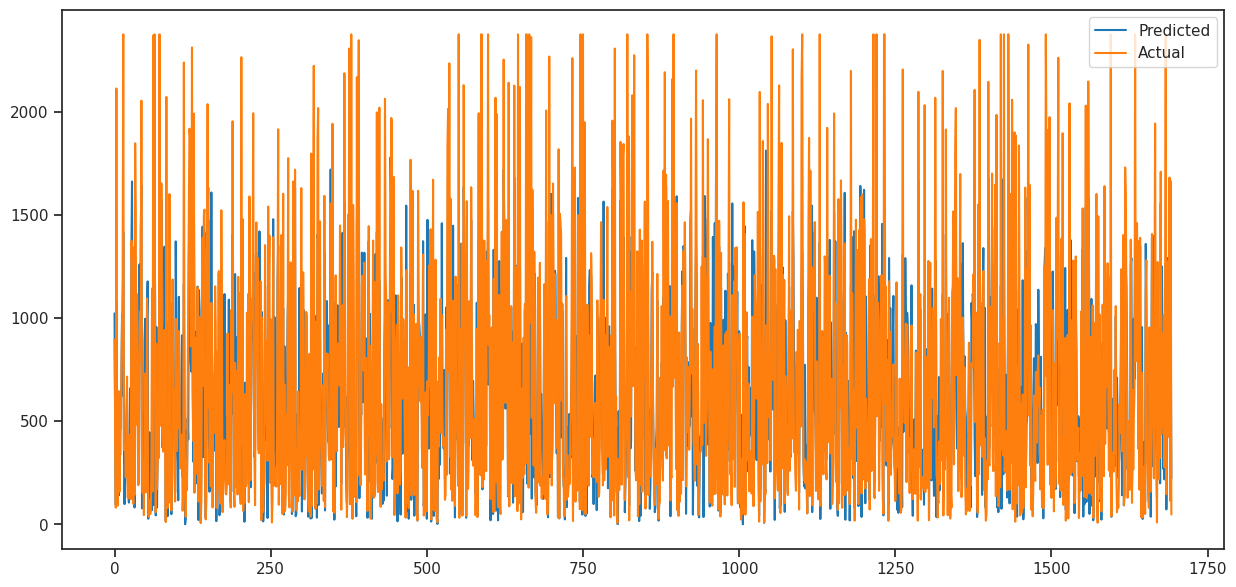

In [157]:
#Visualization 
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

The R2 values on both the training and test sets are relatively high, which indicates that the model is doing a good job of explaining the variance in the target variable. The MAE and RMSE values on both the training and test sets are also relatively low, which means that the model is making relatively small and accurate predictions.

#### 2. Cross- Validation & Hyperparameter Tuning

In [158]:
# Define the hyperparameter grid
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create the grid search object
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='r2')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


In [159]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Create the LinearRegression model
model = LinearRegression()

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [160]:
# Fit the Algorithm
best_model = LinearRegression()

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Predict on the model
y_pred_train2 = best_model.predict(X_train)
y_pred2 = best_model.predict(X_test)


In [161]:
best_model.score(X_train, y_train)

0.6411787079837625

In [162]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae

# Assuming y_pred_train2 and y_pred2 are your predictions for train and test sets, respectively
# Calculate predictions
y_pred_train2 = rmodel.predict(X_train)
y_pred2 = rmodel.predict(X_test)

# Metric Score chart for train
r2_train2 = r2(y_train, y_pred_train2)
adj_r2_train2 = 1 - (1 - r2(y_train, y_pred_train2)) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
MSE_train2 = mse(y_train, y_pred_train2)
RMSE_train2 = np.sqrt(MSE_train2)
MAE_train2 = mae(y_train, y_pred_train2)

# Metric Score chart for test
r2_test2 = r2(y_test, y_pred2)
adj_r2_test2 = 1 - (1 - r2(y_test, y_pred2)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
MSE_test2 = mse(y_test, y_pred2)
RMSE_test2 = np.sqrt(MSE_test2)
MAE_test2 = mae(y_test, y_pred2)

# Create a new row with the metrics
new_row = pd.DataFrame({
    'Model': ['Linear_Regression_GridCV'],
    'R2_train': [r2_train2],
    'R2_test': [r2_test2],
    'Adjusted_R2_train': [adj_r2_train2],
    'Adjusted_R2_test': [adj_r2_test2],
    'MAE_train': [MAE_train2],
    'MAE_test': [MAE_test2],
    'RMSE_train': [RMSE_train2],
    'RMSE_test': [RMSE_test2]
})

# Assuming 'result' is your existing DataFrame to which you want to append the new row
result = pd.concat([result, new_row], ignore_index=True)

# Display the result DataFrame
result


Model  R2_train  R2_test  Adjusted_R2_train  \
0         Linear_Regression      0.64     0.65               0.59   
1  Linear_Regression_GridCV      0.64     0.65               0.64   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.61       5.47      5.22        7.07       6.71  
1              0.65       5.47      5.22        7.07       6.71

##### Which hyperparameter optimization technique have you used and why?

Here i chose GridSearchCv for optimization because GridSearchCV is a popular choice for performing hyperparameter tuning and cross-validation in Python because it is easy to use and provides a number of useful features.

Here are a few reasons why I choose to use GridSearchCV for hyperparameter tuning and cross-validation:

* Ease of use: GridSearchCV is designed to be easy to use, and it provides a convenient interface for defining the hyperparameter grid, choosing a cross-validation strategy, and fitting the model.

* Automated hyperparameter tuning: GridSearchCV automates the process of performing hyperparameter tuning, which can save a lot of time and effort compared to manually tuning the hyperparameters of a model.

* Cross-validation: GridSearchCV includes support for cross-validation, which is a key technique for evaluating the generalization performance of a machine learning model. Cross-validation helps to ensure that the model is not overfitting to the training data and is able to generalize to new data.

* Performance evaluation: GridSearchCV provides a number of different evaluation metrics (e.g., accuracy, precision, recall, etc.) that can be used to evaluate the performance of the model, and it allows you to specify which metric you want to use to select the best model.

Overall, GridSearchCV is a powerful and convenient tool for performing hyperparameter tuning and cross-validation in Python. It is widely used in the field of machine learning and is a good choice for many applications.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Since some of the features was left as it was, since on transformation it changed from left to right skew or right to left skew, therefore in gridsearch I used normalise as parameter to check its affect. The result showed best parameter to be normalise as true, therefore no further improvement was observed in the result.

In [163]:
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0         Linear_Regression      0.64     0.65               0.59   
1  Linear_Regression_GridCV      0.64     0.65               0.64   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.61       5.47      5.22        7.07       6.71  
1              0.65       5.47      5.22        7.07       6.71

### ML Model - 2 Random Forest Regressor

In [164]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
y_pred_train3 = rf_model.predict(X_train)
y_pred3 = rf_model.predict(X_test)

In [165]:
# Metric Score chart for train
r2_train3 = r2(y_train, y_pred_train3)
adj_r2_train3 = 1-(1-r2(np.square(y_train), np.square(y_pred_train3)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train3 = mse(y_train, y_pred_train3)
RMSE_train3 = np.sqrt(MSE_train3)
MAE_train3 = mae(y_train, y_pred_train3)

# Metric Score chart for test
r2_test3 = r2(y_test, y_pred3)
adj_r2_test3 = 1-(1-r2(np.square(y_test), np.square(y_pred3)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test3 = mse(y_test, y_pred3)
RMSE_test3 = np.sqrt(MSE_test3)
MAE_test3 = mae(y_test, y_pred3)

new_row = {
        'Model': ['RandomForestRegressor'],
        'R2_train': [r2_train3],
        'R2_test': [r2_test3], 
        'Adjusted_R2_train': [adj_r2_train3],
        'Adjusted_R2_test': [adj_r2_test3],
        'MAE_train': [MAE_train3],
        'MAE_test': [MAE_test3],
        'RMSE_train': [RMSE_train3],
        'RMSE_test': [RMSE_test3]
    }

# Assuming 'result' is your existing DataFrame to which you want to append the new row
result = pd.concat([result, pd.DataFrame(new_row)], ignore_index=True)
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0         Linear_Regression      0.64     0.65               0.59   
1  Linear_Regression_GridCV      0.64     0.65               0.64   
2     RandomForestRegressor      0.99     0.90               0.98   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.61       5.47      5.22        7.07       6.71  
1              0.65       5.47      5.22        7.07       6.71  
2              0.89       0.95      2.39        1.42       3.54

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [166]:
# metric score chart
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0         Linear_Regression      0.64     0.65               0.59   
1  Linear_Regression_GridCV      0.64     0.65               0.64   
2     RandomForestRegressor      0.99     0.90               0.98   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.61       5.47      5.22        7.07       6.71  
1              0.65       5.47      5.22        7.07       6.71  
2              0.89       0.95      2.39        1.42       3.54

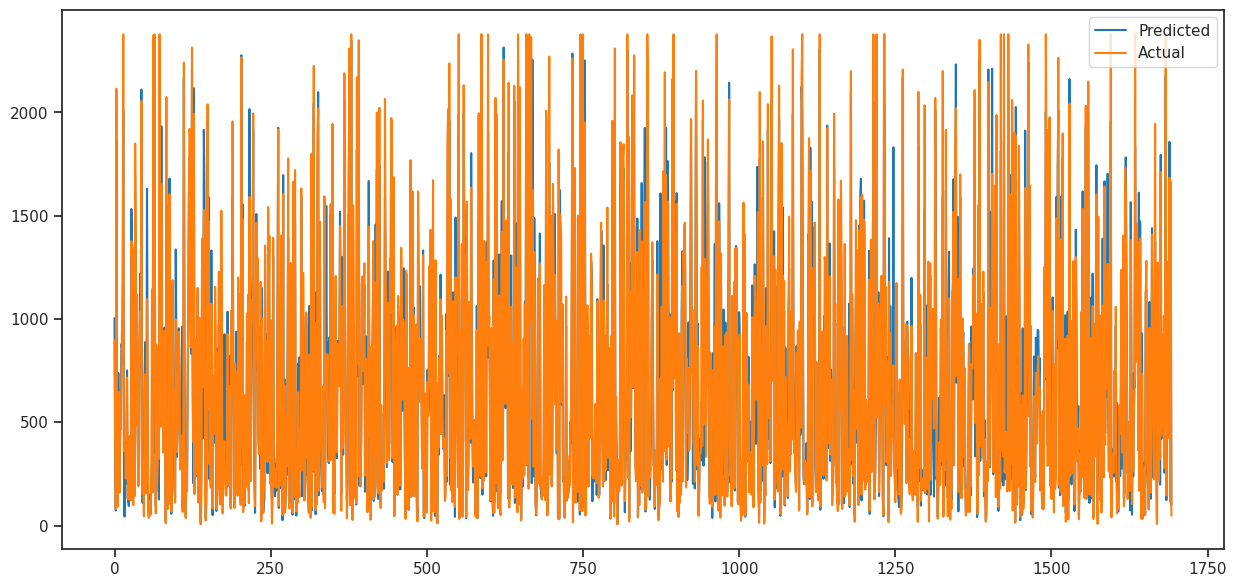

In [167]:
# Visualizing evaluation Metric Score chart
#Visualization 
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred3))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Here I used random forest regressor as seocnd model, i found it to be overfitting since test score was less as compared to train result i.e., r2 score was changed from 0.98 in training to 0.87 in test and relatively higher mean absolute error from 1.01 to 2.82 and root mean squared error changed from 1.50 to 4.13.

Next trying to overcome this error using hyperparameter tunning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [168]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='r2')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='r2', verbose=2)

In [169]:
#best parameter
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.833792 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [170]:
# Predict on the model
# Making predictions on train and test data
y_pred_train4 = rf_grid.predict(X_train)
y_pred4 = rf_grid.predict(X_test)

In [171]:
# Metric Score chart for train
r2_train4 = r2(y_train, y_pred_train4)
adj_r2_train4 = 1-(1-r2(np.square(y_train), np.square(y_pred_train4)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train4 = mse(y_train, y_pred_train4)
RMSE_train4 = np.sqrt(MSE_train4)
MAE_train4 = mae(y_train, y_pred_train4)

# Metric Score chart for test
r2_test4 = r2(y_test, y_pred4)
adj_r2_test4 = 1-(1-r2(np.square(y_test), np.square(y_pred4)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test4 = mse(y_test, y_pred4)
RMSE_test4 = np.sqrt(MSE_test4)
MAE_test4 = mae(y_test, y_pred4)

new_row = {
        'Model': ['RandomForestRegressor_Grid_CV'],
        'R2_train': [r2_train4],
        'R2_test': [r2_test4], 
        'Adjusted_R2_train': [adj_r2_train4],
        'Adjusted_R2_test': [adj_r2_test4],
        'MAE_train': [MAE_train4],
        'MAE_test': [MAE_test4],
        'RMSE_train': [RMSE_train4],
        'RMSE_test': [RMSE_test4]
    }
result = pd.concat([result, pd.DataFrame(new_row)], ignore_index=True)
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.64     0.65               0.59   
1       Linear_Regression_GridCV      0.64     0.65               0.64   
2          RandomForestRegressor      0.99     0.90               0.98   
3  RandomForestRegressor_Grid_CV      0.85     0.85               0.83   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.61       5.47      5.22        7.07       6.71  
1              0.65       5.47      5.22        7.07       6.71  
2              0.89       0.95      2.39        1.42       3.54  
3              0.84       3.23      3.18        4.54       4.43

In [172]:
#printing thi result
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.64     0.65               0.59   
1       Linear_Regression_GridCV      0.64     0.65               0.64   
2          RandomForestRegressor      0.99     0.90               0.98   
3  RandomForestRegressor_Grid_CV      0.85     0.85               0.83   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.61       5.47      5.22        7.07       6.71  
1              0.65       5.47      5.22        7.07       6.71  
2              0.89       0.95      2.39        1.42       3.54  
3              0.84       3.23      3.18        4.54       4.43

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before hyperparameter tuning model was overfitting as model has a very large difference in training and test score, which was reduced from 0.98 in training to 0.84 and test result from 0.87 to 0.81 which is also has slight difference but overall model is efficient now compared to earlier.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

In the context of a linear regression model,I used the following evaluation metrics to assess the performance of the model and the business impact of the model:

* R2 score: The R2 score, also known as the coefficient of determination, is a measure of how well the model fits the data. It ranges from 0 to 1, with a higher value indicating a better fit. A high R2 score suggests that the model is able to explain a large portion of the variance in the data. In a business context, a high R2 score can indicate that the model is able to make accurate predictions, which could have a positive impact on decision-making and resource allocation.

* Adjusted R2 score: The adjusted R2 score is similar to the R2 score, but it adjusts for the number of variables in the model. A higher adjusted R2 score suggests that the model is able to explain a large portion of the variance in the data while also taking into account the complexity of the model. In a business context, a high adjusted R2 score can indicate that the model is able to make accurate predictions with a reasonable level of complexity, which could be more practical for deployment in a business setting.

* Mean absolute error (MAE): The MAE is a measure of the average absolute error of the model's predictions. It is calculated as the sum of the absolute differences between the predicted values and the actual values, divided by the number of predictions. In a business context, a low MAE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions or allocate resources.

* Root mean squared error (RMSE): The RMSE is a measure of the average squared error of the model's predictions. It is calculated as the square root of the mean squared error (MSE). In a business context, a low RMSE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions or allocate resources.

### ML Model - 3 XgBoost Regressor

In [173]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

y_pred_train5 = xg_models.predict(X_train)
y_pred5 = xg_models.predict(X_test)

In [174]:
# # Metric Score chart for train
r2_train5 = r2(y_train, y_pred_train5)
adj_r2_train5 = 1-(1-r2(np.square(y_train), np.square(y_pred_train5)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train5 = mse(y_train, y_pred_train5)
RMSE_train5 = np.sqrt(MSE_train5)
MAE_train5 = mae(y_train, y_pred_train5)

# Metric Score chart for test
r2_test5 = r2(y_test, y_pred5)
adj_r2_test5 = 1-(1-r2(np.square(y_test), np.square(y_pred5)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test5 = mse(y_test, y_pred5)
RMSE_test5 = np.sqrt(MSE_test5)
MAE_test5 = mae(y_test, y_pred5)

new_row = {
        'Model': ['XGBRegressor'],
        'R2_train': [r2_train5],
        'R2_test': [r2_test5], 
        'Adjusted_R2_train': [adj_r2_train5],
        'Adjusted_R2_test': [adj_r2_test5],
        'MAE_train': [MAE_train5],
        'MAE_test': [MAE_test5],
        'RMSE_train': [RMSE_train5],
        'RMSE_test': [RMSE_test5]
    }
result = pd.concat([result, pd.DataFrame(new_row)], ignore_index=True)
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.64     0.65               0.59   
1       Linear_Regression_GridCV      0.64     0.65               0.64   
2          RandomForestRegressor      0.99     0.90               0.98   
3  RandomForestRegressor_Grid_CV      0.85     0.85               0.83   
4                   XGBRegressor      0.98     0.91               0.98   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.61       5.47      5.22        7.07       6.71  
1              0.65       5.47      5.22        7.07       6.71  
2              0.89       0.95      2.39        1.42       3.54  
3              0.84       3.23      3.18        4.54       4.43  
4              0.90       1.17      2.30        1.69       3.38

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [175]:
# Visualizing evaluation Metric Score chart
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.64     0.65               0.59   
1       Linear_Regression_GridCV      0.64     0.65               0.64   
2          RandomForestRegressor      0.99     0.90               0.98   
3  RandomForestRegressor_Grid_CV      0.85     0.85               0.83   
4                   XGBRegressor      0.98     0.91               0.98   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.61       5.47      5.22        7.07       6.71  
1              0.65       5.47      5.22        7.07       6.71  
2              0.89       0.95      2.39        1.42       3.54  
3              0.84       3.23      3.18        4.54       4.43  
4              0.90       1.17      2.30        1.69       3.38

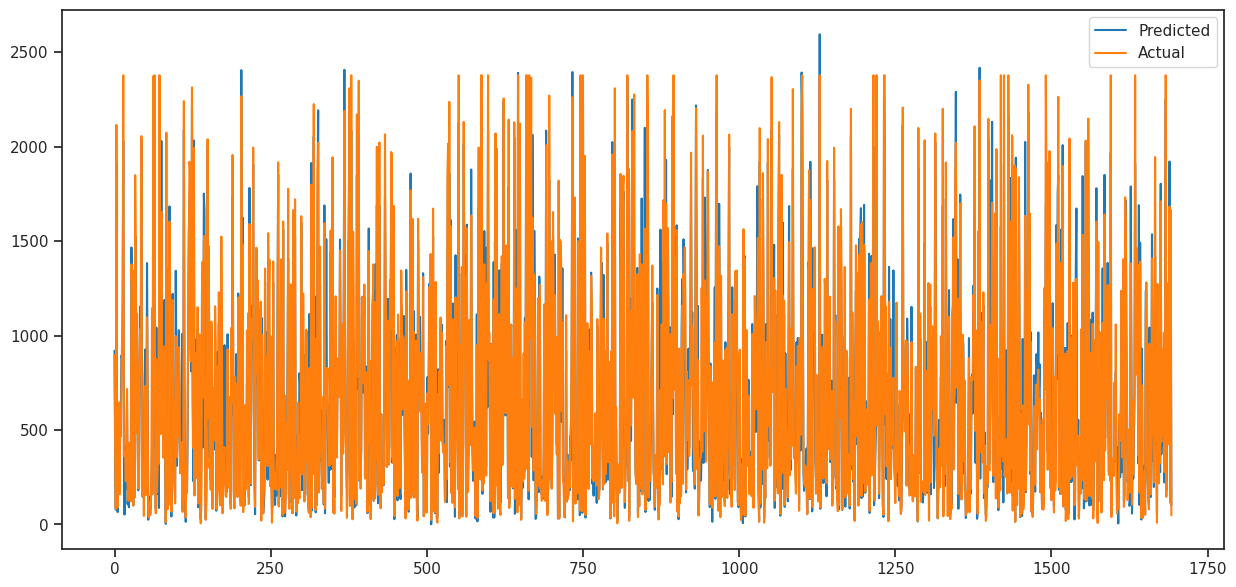

In [176]:
#Visualization 
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred5))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Here I used XGBRegressor as the model, it show high r2 and low MAE and RMSE score that r2 as 0.85, mae as 3.27 and rmse as 4.11. However there is difference in test and training score which i will try to recover using hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [177]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBRegressor(objective = 'reg:squarederror')

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='r2')

xg_grid1=xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

In [178]:
# Predict on the model
# Making predictions on train and test data

y_pred_train6= xg_grid1.predict(X_train)
y_pred6 = xg_grid1.predict(X_test)

In [179]:
# # Metric Score chart for train
r2_train6 = r2(y_train, y_pred_train6)
adj_r2_train6 = 1-(1-r2(np.square(y_train), np.square(y_pred_train6)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train6 = mse(y_train, y_pred_train6)
RMSE_train6 = np.sqrt(MSE_train6)
MAE_train6 = mae(y_train, y_pred_train6)

# Metric Score chart for test
r2_test6 = r2(y_test, y_pred6)
adj_r2_test6 = 1-(1-r2(np.square(y_test), np.square(y_pred6)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test6 = mse(y_test, y_pred6)
RMSE_test6 = np.sqrt(MSE_test6)
MAE_test6 = mae(y_test, y_pred6)

new_row = {
        'Model': ['XGBRegressor_GridCV'],
        'R2_train': [r2_train6],
        'R2_test': [r2_test6], 
        'Adjusted_R2_train': [adj_r2_train6],
        'Adjusted_R2_test': [adj_r2_test6],
        'MAE_train': [MAE_train6],
        'MAE_test': [MAE_test6],
        'RMSE_train': [RMSE_train6],
        'RMSE_test': [RMSE_test6]
    }
result = pd.concat([result, pd.DataFrame(new_row)], ignore_index=True)
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.64     0.65               0.59   
1       Linear_Regression_GridCV      0.64     0.65               0.64   
2          RandomForestRegressor      0.99     0.90               0.98   
3  RandomForestRegressor_Grid_CV      0.85     0.85               0.83   
4                   XGBRegressor      0.98     0.91               0.98   
5            XGBRegressor_GridCV      1.00     0.91               1.00   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.61       5.47      5.22        7.07       6.71  
1              0.65       5.47      5.22        7.07       6.71  
2              0.89       0.95      2.39        1.42       3.54  
3              0.84       3.23      3.18        4.54       4.43  
4              0.90       1.17      2.30        1.69       3.38  
5              0.90       0.42      2.20        0.61       3.39

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [180]:
#final result
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.64     0.65               0.59   
1       Linear_Regression_GridCV      0.64     0.65               0.64   
2          RandomForestRegressor      0.99     0.90               0.98   
3  RandomForestRegressor_Grid_CV      0.85     0.85               0.83   
4                   XGBRegressor      0.98     0.91               0.98   
5            XGBRegressor_GridCV      1.00     0.91               1.00   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.61       5.47      5.22        7.07       6.71  
1              0.65       5.47      5.22        7.07       6.71  
2              0.89       0.95      2.39        1.42       3.54  
3              0.84       3.23      3.18        4.54       4.43  
4              0.90       1.17      2.30        1.69       3.38  
5              0.90       0.42      2.20        0.61       3.39

Hyperparameter tunning certainly showed a better result, r2 was increased from 0.85 to 0.88 on test and mae and rmse was lowered. Mae reduced from 3.27 to 2.73 and rmse from 4.11 to 2.66. Overall model show good result.

In [186]:
X_test.columns

Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Absolute_Humidity',
       'Date_year', 'Date_month', 'Date_day', 'Date_hour', 'Date_minute',
       'Date_second', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning_Day_No', 'Functioning_Day_Yes'],
      dtype='object')

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For the model and business point of view, I chose R2 abd RMSE as evaluation metrics.

* R2 score, also known as the coefficient of determination, is a measure of how well the model fits the data. It ranges from 0 to 1, with a higher value indicating a better fit. A high R2 score suggests that the model is able to explain a large portion of the variance in the data. In a business context, a high R2 score can indicate that the model is able to make accurate predictions, which could have a positive impact on decision-making and resource allocation.
* RMSE is a measure of the average squared error of the model's predictions. It is calculated as the square root of the mean squared error (MSE). In a business context, a low RMSE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions or allocate resources.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the results, I want to consider using the XGBRegressor_GridCV i.e., XGBRegressor with hyperparameter tunned model as final model. This model has the highest R2 values on both the training and test sets, which indicates that it is doing a good job of explaining the variance in the target variable. It also has the lowest MAE and RMSE values on the test set, which means that it is making relatively small and accurate predictions.

In [181]:
#final best result
result.sort_values('R2_test',ascending = False)

Model  R2_train  R2_test  Adjusted_R2_train  \
4                   XGBRegressor      0.98     0.91               0.98   
5            XGBRegressor_GridCV      1.00     0.91               1.00   
2          RandomForestRegressor      0.99     0.90               0.98   
3  RandomForestRegressor_Grid_CV      0.85     0.85               0.83   
0              Linear_Regression      0.64     0.65               0.59   
1       Linear_Regression_GridCV      0.64     0.65               0.64   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
4              0.90       1.17      2.30        1.69       3.38  
5              0.90       0.42      2.20        0.61       3.39  
2              0.89       0.95      2.39        1.42       3.54  
3              0.84       3.23      3.18        4.54       4.43  
0              0.61       5.47      5.22        7.07       6.71  
1              0.65       5.47      5.22        7.07       6.71

### saving the best model

In [183]:
xg_grid

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='r2', verbose=2)

In [184]:
encoder

OneHotEncoder(sparse_output=False)

In [185]:
import joblib
joblib.dump(xg_grid, 'model.joblib')
joblib.dump(encoder, 'encoder.joblib')

['encoder.joblib']

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [133]:
#Get shap values
explainer = shap.Explainer(xg_models)
shap_values = explainer(X_test) 

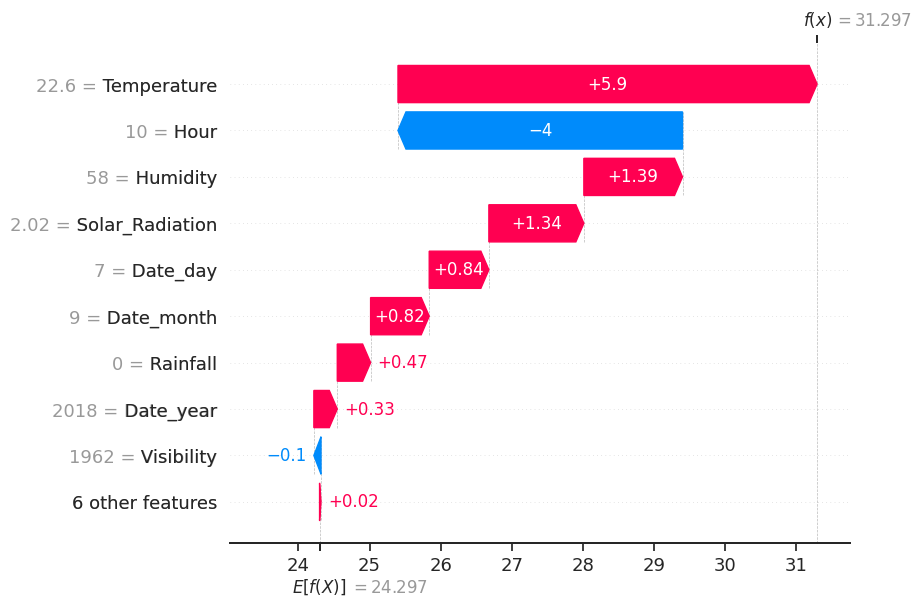

In [134]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

Above we have the code to create a waterfall plot for the first abalone in our dataset. This plot helps us visualise the SHAP values for each of the features. These tell us how much each of the features have increased or decreased the predicted number of rings for this specific abalone.

Looking at the x-axis, we can see the base value is E[f(x)] = 24.214. This is the average predicted number of rings across all abalones. The ending value is f(x) = 7.511. The SHAP values are all the values in between. 

There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

In [135]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases res will compress. 

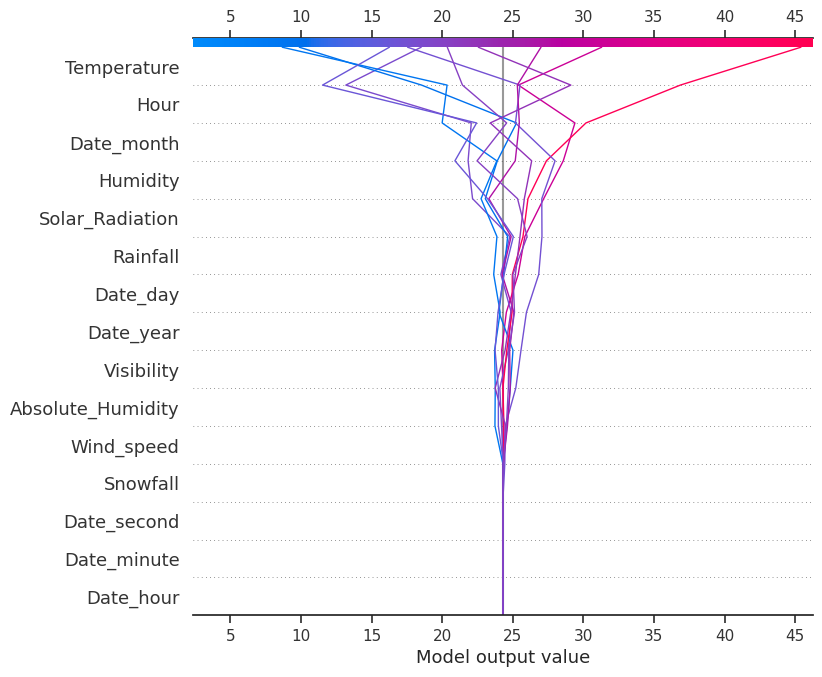

In [136]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

Waterfall and force plots are great for interpreting individual predictions. To understand how our model makes predictions in general we need to aggregate the SHAP values. One way to do this is using a decision plot. Above we have the code used to output the decision plot for the first 10 abalones.

we can see there are 10 lines in the plot —one for each abalone. They all start at the same base value of 24.21 and end at their final predicted number of rings. As you move up from each feature on the y-axis, the movement on the x-axis is given by the SHAP value for that feature. Ultimately, this gives you similar information to a waterfall plot except we can now see it for multiple observations.

With only 10 observations, we can already see some trends. For example, some of the lines seem to zig-zag at the top of the chart. For these observations, the shucked weight increases the prediction (i.e. positive SHAP) and the shell weight and whole weight decrease the prediction (i.e. negative SHAP). In other words, these features have opposite effects on the prediction. When we look at plot 5 — beeswarm, we will see that this is the case for the model in general.

An issue with this chart is that we can’t use it to visualise all the SHAP values at once. As you increase the number of observations it will become too cluttered and it will be difficult to gain any understanding of how the model works. We are limited to interpreting the SHAP values for a handful of observations.

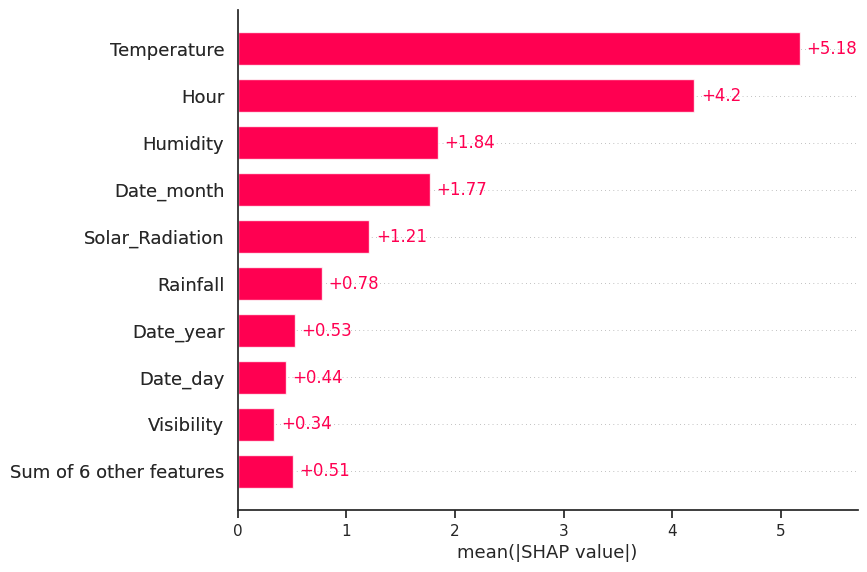

In [137]:
#Mean SHAP
shap.plots.bar(shap_values)

Another way to aggregate the values is using a mean SHAP plot. For each feature, we calculate the mean of the absolute SHAP values across all observations. We take the absolute values as we do not want positive and negative values to offset each other. In the end, we have the bar plot above. There is one bar for each feature and we can see that shell weight had the largest mean SHAP out of all the features.

Features that have large mean SHAP values will tend to have large positive/negative SHAP values. In other words, these are the features that have a significant impact on the model’s predictions. In this sense, this plot can be used in the same way as a feature importance plot. That is to highlight features that are important to a model’s predictions. An issue is that it does not tell us anything about the nature of the relationship between features and the target variable.

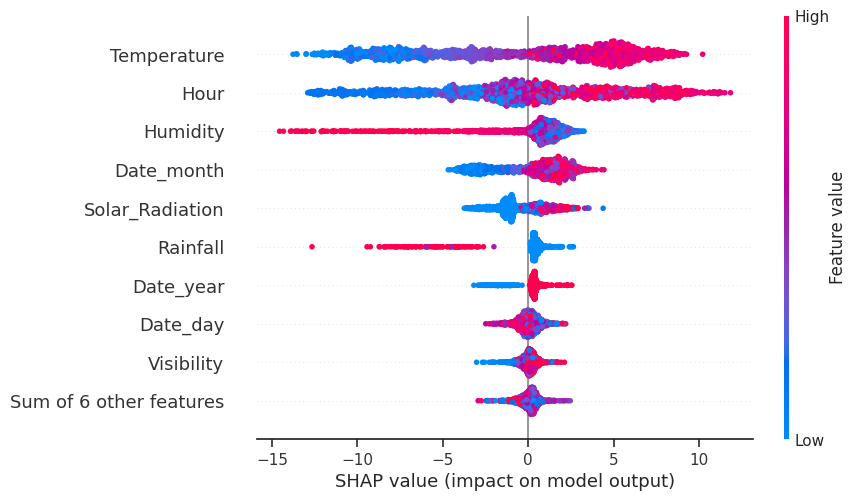

In [138]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

Our final aggregation is the beeswarm plot. As seen in Figure, this is a plot of all the SHAP values. The values are grouped by the features on the y-axis. For each group, the colour of the points is determined by the value of the same feature (i.e. higher feature values are redder). The features are ordered by the mean SHAP values.

This plot addresses some of the issues in the previous plots. Unlike the decision plot, we can plot all the observations and still have clear interpretations. Like mean SHAP, it can be used to highlight important relationships. We can also start to understand the nature of these relationships. 

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [139]:
# Save the File
# import joblib

# Save the model to a file
# joblib.dump(xg_grid1, 'model.joblib')


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [140]:
# Load the File and predict unseen data.
# Load the model from the file
# model = joblib.load('model.joblib')

# Use the model to make predictions
# predictions = model.predict(data)


# **Conclusion**

The main goal of the project was to stablize bike demand at every hour. Based on the objective, it was found that:

* XGBRegressor models shows promising result with R2 score of 0.88, therefore it can be used to solve this problem.

* Bike rental count is high during working days than on weekend.

* Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.

* People prefer to rent bike more in summer than in winter.

* Bike demand is more on clear days than on snowy or rainy days.

* Temperature range from 22 to 25(°C) has more demand for bike.

* 'Hour', 'Temperature(°C)', 'Humidity', 'Wind_speed','Visibility ', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'day of week ' regulates bike demand.

### ***Hurrah! I have successfully completed my Machine Learning Capstone Project !!!🎯🏆***